In [1]:
# importing required libraries
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import pyvista as pv
import vtk
import os
from vtk import vtkStructuredPoints
from skimage import io, transform
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors

In [2]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Patch13_3/Amateur/FinalAmateurPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

gameId  team       summoner region champion  timestamp  \
0       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   0.000000   
1       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   1.000200   
2       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   0.495733   
3       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   2.000517   
4       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   1.979017   
...                 ...   ...            ...    ...      ...        ...   
838676  EUW1_6283483863   Red   anonymous 56   euw1    Annie  17.139450   
838677  EUW1_6283483863   Red   anonymous 56   euw1    Annie  22.688683   
838678  EUW1_6283483863   Red   anonymous 56   euw1    Annie  22.826867   
838679  EUW1_6283483863   Red   anonymous 56   euw1    Annie  25.901700   
838680  EUW1_6283483863   Red   anonymous 56   euw1    Annie  27.683317   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
0              329.0         650.0    1.0            0.0  ...   
1             6569.0       11391.0    1.0            0.0  ...   
2                NaN           NaN    NaN            NaN  ...   
3             4320.0       12059.0    1.0            0.0  ...   
4             4245.0       13217.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
838676           NaN           NaN    NaN            NaN  ...   
838677           NaN           NaN    NaN            NaN  ...   
838678           NaN           NaN    NaN            NaN  ...   
838679           NaN           NaN    NaN            NaN  ...   
838680           NaN           NaN    NaN            NaN  ...   

        trueDamageTaken  victory       eventType  skillSlot  buildingType  \
0                   0.0    False             NaN        NaN           NaN   
1                   0.0    False             NaN        NaN           NaN   
2                   NaN    False    SkillLevelUp        1.0           NaN   
3                   0.0    False             NaN        NaN           NaN   
4                   NaN    False          Assist        NaN           NaN   
...                 ...      ...             ...        ...           ...   
838676              NaN    False  Item purchased        NaN           NaN   
838677              NaN    False  Item purchased        NaN           NaN   
838678              NaN    False  Item purchased        NaN           NaN   
838679              NaN    False  Item purchased        NaN           NaN   
838680              NaN    False  Item purchased        NaN           NaN   

        lane  monster            itemName     role      rank  
0        NaN      NaN                 NaN  UTILITY  Platinum  
1        NaN      NaN                 NaN  UTILITY  Platinum  
2        NaN      NaN                 NaN  UTILITY  Platinum  
3        NaN      NaN                 NaN  UTILITY  Platinum  
4        NaN      NaN                 NaN  UTILITY  Platinum  
...      ...      ...                 ...      ...       ...  
838676   NaN      NaN           Kindlegem  UTILITY      Gold  
838677   NaN      NaN        Knight's Vow  UTILITY      Gold  
838678   NaN      NaN     Glacial Buckler  UTILITY      Gold  
838679   NaN      NaN           Kindlegem  UTILITY      Gold  
838680   NaN      NaN  Zeke's Convergence  UTILITY      Gold  

[838681 rows x 56 columns]

In [3]:
utility_deaths_df = df[(df["role"] == "UTILITY") & (df["eventType"] == "Death")]
utility_deaths_df

gameId  team       summoner region champion  timestamp  \
19      EUW1_6274275803  Blue  anonymous 125   euw1   Twitch  10.351600   
32      EUW1_6274275803  Blue  anonymous 125   euw1   Twitch  17.466683   
45      EUW1_6274275803  Blue  anonymous 125   euw1   Twitch  21.543583   
47      EUW1_6274275803  Blue  anonymous 125   euw1   Twitch  22.763767   
52      EUW1_6274275803  Blue  anonymous 125   euw1   Twitch  25.819967   
...                 ...   ...            ...    ...      ...        ...   
642684  EUW1_6289523454   Red  anonymous 168   euw1    Swain  10.780100   
642688  EUW1_6289523454   Red  anonymous 168   euw1    Swain  12.531033   
642700  EUW1_6289523454   Red  anonymous 168   euw1    Swain  18.134383   
642777  EUW1_6289415945  Blue  anonymous 168   euw1    Swain  19.149783   
642780  EUW1_6289415945  Blue  anonymous 168   euw1    Swain  20.196250   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
19            3416.0       13918.0    NaN            NaN  ...   
32            6367.0        9103.0    NaN            NaN  ...   
45           11875.0        6906.0    NaN            NaN  ...   
47           10284.0        6681.0    NaN            NaN  ...   
52            2729.0        4686.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
642684       13527.0        3069.0    NaN            NaN  ...   
642688       13873.0        3772.0    NaN            NaN  ...   
642700       12170.0        8997.0    NaN            NaN  ...   
642777       11323.0        6994.0    NaN            NaN  ...   
642780        6974.0        7097.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
19                  NaN    False      Death        NaN           NaN   NaN   
32                  NaN    False      Death        NaN           NaN   NaN   
45                  NaN    False      Death        NaN           NaN   NaN   
47                  NaN    False      Death        NaN           NaN   NaN   
52                  NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
642684              NaN     True      Death        NaN           NaN   NaN   
642688              NaN     True      Death        NaN           NaN   NaN   
642700              NaN     True      Death        NaN           NaN   NaN   
642777              NaN     True      Death        NaN           NaN   NaN   
642780              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName     role      rank  
19          NaN       NaN  UTILITY  Platinum  
32          NaN       NaN  UTILITY  Platinum  
45          NaN       NaN  UTILITY  Platinum  
47          NaN       NaN  UTILITY  Platinum  
52          NaN       NaN  UTILITY  Platinum  
...         ...       ...      ...       ...  
642684      NaN       NaN  UTILITY    Silver  
642688      NaN       NaN  UTILITY    Silver  
642700      NaN       NaN  UTILITY    Silver  
642777      NaN       NaN  UTILITY    Silver  
642780      NaN       NaN  UTILITY    Silver  

[12463 rows x 56 columns]

In [451]:
print("This dataset contains {} matches in which the utility died at least once".format(len(np.unique(utility_deaths_df["gameId"]))))

This dataset contains 1979 matches in which the utility died at least once


In [452]:
print("{} players died a total of {} times".format(len(np.unique(utility_deaths_df["summoner"])), utility_deaths_df.shape[0]))

32 players died a total of 12463 times


In [453]:
print("This Dataset contains an average of {} deaths per game".format((utility_deaths_df.shape[0]/len(np.unique(utility_deaths_df["gameId"])))))

This Dataset contains an average of 6.297625063163213 deaths per game


In [4]:
blueSide_utility_deaths_df = utility_deaths_df[utility_deaths_df["team"] == "Blue"]
blueSide_utility_deaths_df

gameId  team       summoner region champion  timestamp  \
19      EUW1_6274275803  Blue  anonymous 125   euw1   Twitch  10.351600   
32      EUW1_6274275803  Blue  anonymous 125   euw1   Twitch  17.466683   
45      EUW1_6274275803  Blue  anonymous 125   euw1   Twitch  21.543583   
47      EUW1_6274275803  Blue  anonymous 125   euw1   Twitch  22.763767   
52      EUW1_6274275803  Blue  anonymous 125   euw1   Twitch  25.819967   
...                 ...   ...            ...    ...      ...        ...   
642649  EUW1_6289593927  Blue  anonymous 168   euw1     Nami  21.174450   
642659  EUW1_6289593927  Blue  anonymous 168   euw1     Nami  25.335867   
642661  EUW1_6289593927  Blue  anonymous 168   euw1     Nami  26.272883   
642777  EUW1_6289415945  Blue  anonymous 168   euw1    Swain  19.149783   
642780  EUW1_6289415945  Blue  anonymous 168   euw1    Swain  20.196250   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
19            3416.0       13918.0    NaN            NaN  ...   
32            6367.0        9103.0    NaN            NaN  ...   
45           11875.0        6906.0    NaN            NaN  ...   
47           10284.0        6681.0    NaN            NaN  ...   
52            2729.0        4686.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
642649        5245.0        4886.0    NaN            NaN  ...   
642659        7790.0        5932.0    NaN            NaN  ...   
642661        1731.0        2762.0    NaN            NaN  ...   
642777       11323.0        6994.0    NaN            NaN  ...   
642780        6974.0        7097.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
19                  NaN    False      Death        NaN           NaN   NaN   
32                  NaN    False      Death        NaN           NaN   NaN   
45                  NaN    False      Death        NaN           NaN   NaN   
47                  NaN    False      Death        NaN           NaN   NaN   
52                  NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
642649              NaN    False      Death        NaN           NaN   NaN   
642659              NaN    False      Death        NaN           NaN   NaN   
642661              NaN    False      Death        NaN           NaN   NaN   
642777              NaN     True      Death        NaN           NaN   NaN   
642780              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName     role      rank  
19          NaN       NaN  UTILITY  Platinum  
32          NaN       NaN  UTILITY  Platinum  
45          NaN       NaN  UTILITY  Platinum  
47          NaN       NaN  UTILITY  Platinum  
52          NaN       NaN  UTILITY  Platinum  
...         ...       ...      ...       ...  
642649      NaN       NaN  UTILITY    Silver  
642659      NaN       NaN  UTILITY    Silver  
642661      NaN       NaN  UTILITY    Silver  
642777      NaN       NaN  UTILITY    Silver  
642780      NaN       NaN  UTILITY    Silver  

[6016 rows x 56 columns]

In [5]:
gamesBlueSide = len(np.unique(blueSide_utility_deaths_df["gameId"]))
gamesBlueSide

964

In [456]:
players_df = np.unique(blueSide_utility_deaths_df["summoner"])
for player in players_df:
    temp_df = blueSide_utility_deaths_df[blueSide_utility_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 108 played 18 matches
anonymous 109 played 63 matches
anonymous 110 played 23 matches
anonymous 125 played 36 matches
anonymous 137 played 9 matches
anonymous 139 played 28 matches
anonymous 140 played 6 matches
anonymous 145 played 9 matches
anonymous 146 played 37 matches
anonymous 158 played 25 matches
anonymous 168 played 43 matches
anonymous 17 played 14 matches
anonymous 18 played 34 matches
anonymous 19 played 36 matches
anonymous 30 played 33 matches
anonymous 35 played 50 matches
anonymous 40 played 12 matches
anonymous 43 played 21 matches
anonymous 45 played 63 matches
anonymous 49 played 11 matches
anonymous 50 played 33 matches
anonymous 51 played 56 matches
anonymous 53 played 41 matches
anonymous 56 played 18 matches
anonymous 59 played 33 matches
anonymous 67 played 23 matches
anonymous 76 played 43 matches
anonymous 85 played 40 matches
anonymous 9 played 29 matches
anonymous 91 played 40 matches
anonymous 92 played 16 matches
anonymous 99 played 21 matches


In [457]:
print("Blue side contains {} matches in which the utility died at least once".format(len(np.unique(blueSide_utility_deaths_df["gameId"]))))

Blue side contains 964 matches in which the utility died at least once


In [458]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_utility_deaths_df["summoner"])), blueSide_utility_deaths_df.shape[0]))

32 players died a total of 6016 times on the blue side


In [6]:
redSide_utility_deaths_df = utility_deaths_df[utility_deaths_df["team"] == "Red"]
redSide_utility_deaths_df

gameId team       summoner region champion  timestamp  \
177     EUW1_6274101916  Red  anonymous 125   euw1    Senna   8.010450   
181     EUW1_6274101916  Red  anonymous 125   euw1    Senna  10.873950   
187     EUW1_6274101916  Red  anonymous 125   euw1    Senna  13.954383   
215     EUW1_6274101916  Red  anonymous 125   euw1    Senna  26.208250   
225     EUW1_6274101916  Red  anonymous 125   euw1    Senna  29.780600   
...                 ...  ...            ...    ...      ...        ...   
642593  EUW1_6289658287  Red  anonymous 168   euw1  Morgana  39.141233   
642676  EUW1_6289523454  Red  anonymous 168   euw1    Swain   6.939200   
642684  EUW1_6289523454  Red  anonymous 168   euw1    Swain  10.780100   
642688  EUW1_6289523454  Red  anonymous 168   euw1    Swain  12.531033   
642700  EUW1_6289523454  Red  anonymous 168   euw1    Swain  18.134383   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
177          11679.0        6669.0    NaN            NaN  ...   
181          13229.0        4605.0    NaN            NaN  ...   
187          13639.0        2654.0    NaN            NaN  ...   
215           8949.0       13614.0    NaN            NaN  ...   
225           5400.0        9111.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
642593       10056.0        6250.0    NaN            NaN  ...   
642676       14059.0        4209.0    NaN            NaN  ...   
642684       13527.0        3069.0    NaN            NaN  ...   
642688       13873.0        3772.0    NaN            NaN  ...   
642700       12170.0        8997.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
177                 NaN     True      Death        NaN           NaN   NaN   
181                 NaN     True      Death        NaN           NaN   NaN   
187                 NaN     True      Death        NaN           NaN   NaN   
215                 NaN     True      Death        NaN           NaN   NaN   
225                 NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
642593              NaN     True      Death        NaN           NaN   NaN   
642676              NaN     True      Death        NaN           NaN   NaN   
642684              NaN     True      Death        NaN           NaN   NaN   
642688              NaN     True      Death        NaN           NaN   NaN   
642700              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName     role      rank  
177         NaN       NaN  UTILITY  Platinum  
181         NaN       NaN  UTILITY  Platinum  
187         NaN       NaN  UTILITY  Platinum  
215         NaN       NaN  UTILITY  Platinum  
225         NaN       NaN  UTILITY  Platinum  
...         ...       ...      ...       ...  
642593      NaN       NaN  UTILITY    Silver  
642676      NaN       NaN  UTILITY    Silver  
642684      NaN       NaN  UTILITY    Silver  
642688      NaN       NaN  UTILITY    Silver  
642700      NaN       NaN  UTILITY    Silver  

[6447 rows x 56 columns]

In [7]:
gamesRedSide = len(np.unique(redSide_utility_deaths_df["gameId"]))
gamesRedSide

1015

In [8]:
redSideVictory_utility_deaths_df = redSide_utility_deaths_df[redSide_utility_deaths_df["victory"] == True]
blueSideVictory_utility_deaths_df = blueSide_utility_deaths_df[blueSide_utility_deaths_df["victory"] == True]

winsRedSide = len(np.unique(redSideVictory_utility_deaths_df["gameId"]))
winsBlueSide = len(np.unique(blueSideVictory_utility_deaths_df["gameId"]))

print("Red Team Victories: {}".format(winsRedSide))
print("Blue Team Victories: {}".format(winsBlueSide))

Red Team Victories: 501
Blue Team Victories: 504


In [462]:
players_df = np.unique(redSide_utility_deaths_df["summoner"])
for player in players_df:
    temp_df = redSide_utility_deaths_df[redSide_utility_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 108 played 17 matches
anonymous 109 played 69 matches
anonymous 110 played 27 matches
anonymous 125 played 48 matches
anonymous 137 played 13 matches
anonymous 139 played 17 matches
anonymous 140 played 12 matches
anonymous 145 played 11 matches
anonymous 146 played 34 matches
anonymous 158 played 20 matches
anonymous 168 played 48 matches
anonymous 17 played 18 matches
anonymous 18 played 24 matches
anonymous 19 played 23 matches
anonymous 30 played 43 matches
anonymous 35 played 44 matches
anonymous 40 played 17 matches
anonymous 43 played 24 matches
anonymous 45 played 65 matches
anonymous 49 played 17 matches
anonymous 50 played 47 matches
anonymous 51 played 60 matches
anonymous 53 played 54 matches
anonymous 56 played 19 matches
anonymous 59 played 33 matches
anonymous 67 played 15 matches
anonymous 76 played 50 matches
anonymous 85 played 39 matches
anonymous 9 played 17 matches
anonymous 91 played 49 matches
anonymous 92 played 17 matches
anonymous 99 played 24 matche

In [463]:
print("Red side contains {} matches in which the utility died at least once".format(len(np.unique(redSide_utility_deaths_df["gameId"]))))

Red side contains 1015 matches in which the utility died at least once


In [464]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_utility_deaths_df["summoner"])), redSide_utility_deaths_df.shape[0]))

32 players died a total of 6447 times on the red side


function to visualize the results

In [465]:
def visualizeResults(df, data_scaled, model, team, kmeans, cluster_colors,details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Clustering Analyses/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    #scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    #colors = np.array(["blueviolet", "yellow", "lime", "crimson"])
    
    for c in np.unique(df["cluster"]):
        temp_df = df[df["cluster"] == c]
        scatter = ax.scatter(temp_df['coordinate_x'], temp_df['coordinate_y'], color = cluster_colors[c])
    plt.xlabel('X')
    plt.ylabel('Y')


    if(details == "None"):
        title = "Support Players' Deaths in the " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"]) 
    else:
        title = "Support Players' Deaths in the " + team + " " + details + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(["0", "1", "2", "3"], frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(kmeans, data_scaled, colors=cluster_colors, title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    colors = []
    for color in cluster_colors:
        colors.append(matplotlib.colors.cnames[color])


    return colors

function to view the average values in each cluster

In [466]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the standard deviation in each cluster

In [467]:
def clusterStandardDeviation(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Standard deviation for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.std(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.std(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.std(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the max and min values in each cluster

In [468]:
def clusterMinMaxValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "max coordinate_x": [],
    "min coordinate_x": [],
    "max coordinate_y": [],
    "min coordinate_y": [],
    "max timestamp": [],
    "min timestamp": []}

    print("Max and Min values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["max coordinate_x"].append(np.amax(temporary_df["coordinate_x"]))
        D["min coordinate_x"].append(np.amin(temporary_df["coordinate_x"]))
        D["max coordinate_y"].append(np.amax(temporary_df["coordinate_y"]))
        D["min coordinate_y"].append(np.amin(temporary_df["coordinate_y"]))
        D["max timestamp"].append(np.amax(temporary_df["timestamp"]))
        D["min timestamp"].append(np.amin(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

Function to view the number of deaths in each stage of the game (early, mid, and late game) for each cluster:

In [469]:
def stagesPerClusterV2(df, colors):
    c = 0

    #for cluster in np.unique(df["cluster"]):
        #temporary_df = df[df["cluster"] == cluster].copy()
    temporary_df = df.sort_values(by=["timestamp"])
    stage = []
    for time in temporary_df["timestamp"]:
        if(time == -1):
            stage.append("early game")
        elif(time == 0):
            stage.append("mid game")
        else:
            stage.append("late game")
    
    stage = np.array(stage)
    temporary_df["stages"] = stage
    plt.figure(figsize=(14, 6))
    g = sns.histplot(x='stages', data=temporary_df, hue="cluster", palette=colors, multiple="dodge", shrink=.9);
    plt.ylabel('Deaths')
    plt.title('Game stages in the clusters')
    ax=g.axes
    c += 1

Function that returns a kernel density estimate (KDE) plot of the timestamps in each cluster:

In [470]:

def kdeTimestamp(profiling_df, cluster_colors):
    c = {"color": cluster_colors}

    sns.set_style("whitegrid")
    clusters = profiling_df.cluster.value_counts().index
    sea = sns.FacetGrid(profiling_df, row = "cluster",
                        row_order = clusters,
                        height = 1.7, aspect = 4, hue="cluster", hue_kws=c)
    
    sea.map(sns.kdeplot, "timestamp")
    sea.set(yticklabels=[])
    sea.set(ylabel=None)

    #add overall title
    sea.fig.suptitle("Timestamp KDE plot:", y = 1.05)
    
    plt.show()

---
### Iron Players

#### Clustering Red Team Victory

In [471]:
utility_deaths_df = df[(df["role"] == "UTILITY") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

redSideVictory_df = utility_deaths_df[(utility_deaths_df["team"] == "Red") & (utility_deaths_df["victory"] == True)]
redSideVictory_df

gameId team      summoner region  champion  timestamp  \
116373  EUW1_6280699133  Red   anonymous 9   euw1  Pantheon   3.894883   
116379  EUW1_6280699133  Red   anonymous 9   euw1  Pantheon   6.088583   
116386  EUW1_6280699133  Red   anonymous 9   euw1  Pantheon   9.261150   
116390  EUW1_6280699133  Red   anonymous 9   euw1  Pantheon  11.485367   
116412  EUW1_6280699133  Red   anonymous 9   euw1  Pantheon  21.121650   
...                 ...  ...           ...    ...       ...        ...   
575706  EUW1_6288341539  Red  anonymous 18   euw1       Lux  12.495467   
575712  EUW1_6288341539  Red  anonymous 18   euw1       Lux  15.508917   
575786  EUW1_6288331172  Red  anonymous 19   euw1     Shaco  11.020500   
575815  EUW1_6288331172  Red  anonymous 19   euw1     Shaco  26.545033   
575831  EUW1_6288331172  Red  anonymous 19   euw1     Shaco  33.575133   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
116373       13390.0        2347.0    NaN            NaN  ...   
116379       13478.0        3177.0    NaN            NaN  ...   
116386       13486.0        3948.0    NaN            NaN  ...   
116390       12721.0        2797.0    NaN            NaN  ...   
116412        7096.0        7030.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
575706       13366.0        2488.0    NaN            NaN  ...   
575712       11751.0        1206.0    NaN            NaN  ...   
575786       12843.0        2035.0    NaN            NaN  ...   
575815        1850.0       12044.0    NaN            NaN  ...   
575831        6973.0        7193.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
116373              NaN     True      Death        NaN           NaN   NaN   
116379              NaN     True      Death        NaN           NaN   NaN   
116386              NaN     True      Death        NaN           NaN   NaN   
116390              NaN     True      Death        NaN           NaN   NaN   
116412              NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
575706              NaN     True      Death        NaN           NaN   NaN   
575712              NaN     True      Death        NaN           NaN   NaN   
575786              NaN     True      Death        NaN           NaN   NaN   
575815              NaN     True      Death        NaN           NaN   NaN   
575831              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName     role  rank  
116373      NaN       NaN  UTILITY  Iron  
116379      NaN       NaN  UTILITY  Iron  
116386      NaN       NaN  UTILITY  Iron  
116390      NaN       NaN  UTILITY  Iron  
116412      NaN       NaN  UTILITY  Iron  
...         ...       ...      ...   ...  
575706      NaN       NaN  UTILITY  Iron  
575712      NaN       NaN  UTILITY  Iron  
575786      NaN       NaN  UTILITY  Iron  
575815      NaN       NaN  UTILITY  Iron  
575831      NaN       NaN  UTILITY  Iron  

[281 rows x 56 columns]

In [472]:
profiling_df = utility_deaths_df[(utility_deaths_df["team"] == "Red") & (utility_deaths_df["victory"] == True)].copy()

In [473]:
redSideGames_df = utility_deaths_df[utility_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [474]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

44

In [475]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

53.65853658536586

In [476]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_utility_deaths_df.shape[0]) * 100
winRateRedSide

4.358616410733675

In [477]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 17 won 10 matches on the red side
anonymous 17 has an average of 9.1 deaths per game when winning on the red side

anonymous 18 won 16 matches on the red side
anonymous 18 has an average of 5.3125 deaths per game when winning on the red side

anonymous 19 won 9 matches on the red side
anonymous 19 has an average of 5.666666666666667 deaths per game when winning on the red side

anonymous 9 won 9 matches on the red side
anonymous 9 has an average of 6.0 deaths per game when winning on the red side



In [478]:
print("Victory games on red side contains {} matches in which the utility died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 44 matches in which the utility died at least once
4 players died a total of 281 times on the red side
Victory games on red side contains an average of 6.386363636363637 deaths per game


In [479]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
116373       13390.0        2347.0   3.894883
116379       13478.0        3177.0   6.088583
116386       13486.0        3948.0   9.261150
116390       12721.0        2797.0  11.485367
116412        7096.0        7030.0  21.121650
...              ...           ...        ...
575706       13366.0        2488.0  12.495467
575712       11751.0        1206.0  15.508917
575786       12843.0        2035.0  11.020500
575815        1850.0       12044.0  26.545033
575831        6973.0        7193.0  33.575133

[281 rows x 3 columns]

Time discretization

In [480]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [481]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [482]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [483]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [484]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
116373      1.059676     -0.802806         -1
116379      1.084151     -0.529873         -1
116386      1.086376     -0.276342         -1
116390      0.873615     -0.654831         -1
116412     -0.690800      0.737127          0
...              ...           ...        ...
575706      1.053001     -0.756441         -1
575712      0.603840     -1.178007          0
575786      0.907546     -0.905403         -1
575815     -2.149809      2.385905          1
575831     -0.725009      0.790727          1

[281 rows x 3 columns]

In [485]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4606826028424072
Silhouette score for k=3: 0.45067298882973283
Silhouette score for k=4: 0.3814190156129348
Silhouette score for k=5: 0.3937675934267873
Silhouette score for k=6: 0.3875602287761673
Silhouette score for k=7: 0.4027989460761907
Silhouette score for k=8: 0.4096154354169719
Silhouette score for k=9: 0.38635844483393633
Silhouette score for k=10: 0.3952002388695856
Silhouette score for k=11: 0.39954610669006146
Silhouette score for k=12: 0.4078630343080813
Silhouette score for k=13: 0.4147772474692735
Silhouette score for k=14: 0.41033207653928483
Silhouette score for k=15: 0.4270331784374092


K-Means with k = 4

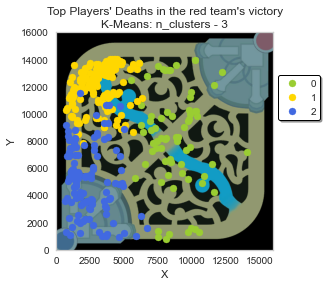

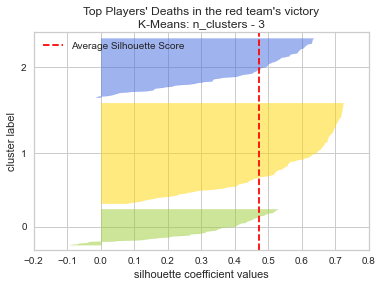

Silhouette score: 0.4720163027243763
1    195
2    115
0     70
Name: cluster, dtype: int64

Inertia: 352.87227458544737

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   8700.242857   8108.885714   0.214286
1        1   3179.984615  12241.374359  -0.656410
2        2   2458.304348   5193.086957   0.556522

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

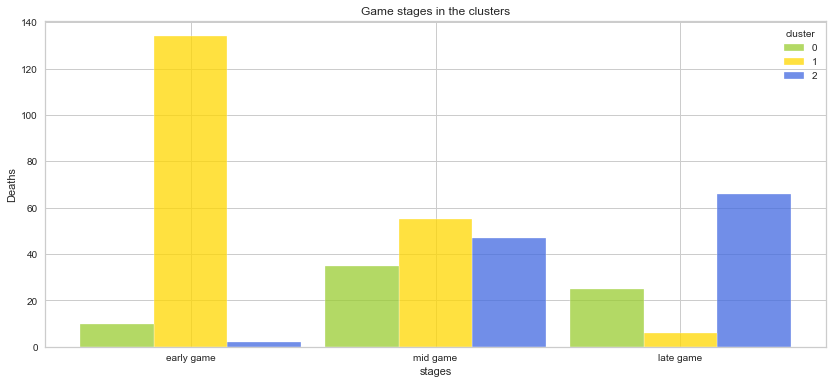

In [ ]:
stagesPerClusterV2(redSideVictory_df, colors)

K-Means with k = 3

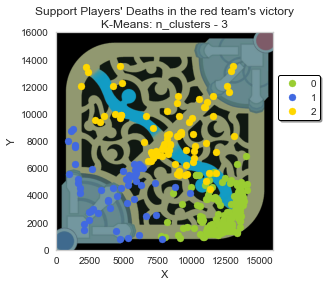

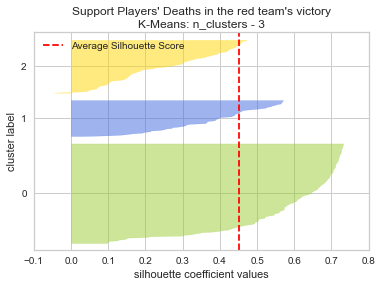

Silhouette score: 0.45067298882973283
0    148
2     79
1     54
Name: cluster, dtype: int64

Inertia: 264.18424441304165

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  12129.236486   2855.945946  -0.614865
1        1   4349.685185   4496.814815   0.666667
2        2   8378.784810   8607.886076   0.443038

In [486]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "royalblue", "gold"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [487]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1358.878773   1405.162099   0.539314
1        1   2168.917334   1964.870904   0.471405
2        2   2644.584793   2216.729350   0.611014

In [488]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14084.0            7736.0            6866.0   
1        1            9888.0             889.0            8917.0   
2        2           13128.0            1850.0           13551.0   

   min coordinate_y  max timestamp  min timestamp  
0             857.0              1             -1  
1             768.0              1              0  
2            4464.0              1             -1

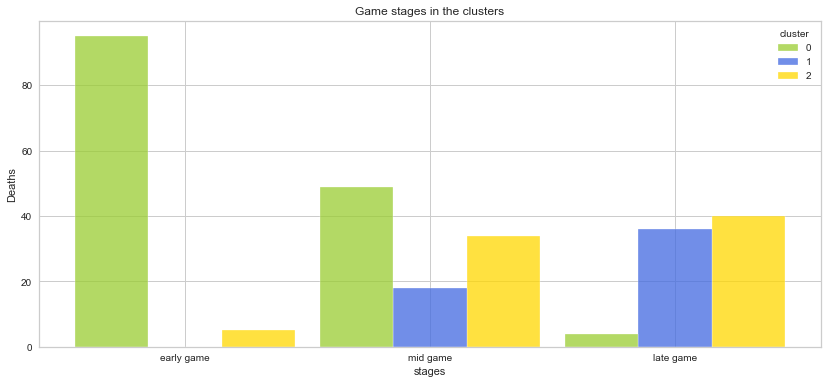

In [489]:
stagesPerClusterV2(redSideVictory_df, colors)

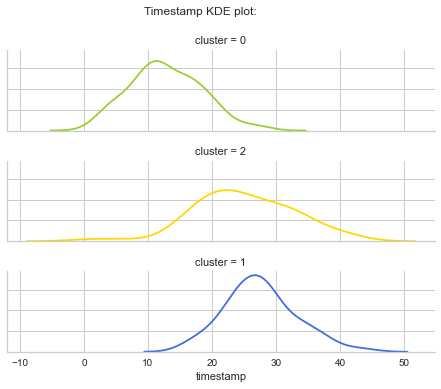

In [490]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [491]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Lux                14
Morgana            10
Shaco               8
Brand               3
Zyra                2
Thresh              1
Rakan               1
Heimerdinger        1
Karma               1
Seraphine           1
Pantheon            1
Nami                1

Deaths with each champion:

In [492]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Lux             79
Morgana         69
Shaco           47
Brand           18
Zyra            18
Rakan           12
Nami            12
Seraphine       10
Pantheon         6
Thresh           5
Karma            3
Heimerdinger     2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [493]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 12 champions when they won on the red side

Cluster 0 - died with 12 champions:
 ['Brand' 'Heimerdinger' 'Karma' 'Lux' 'Morgana' 'Nami' 'Pantheon' 'Rakan'
 'Seraphine' 'Shaco' 'Thresh' 'Zyra']
Lux             39
Morgana         38
Shaco           24
Brand           12
Zyra            10
Rakan            7
Seraphine        6
Pantheon         4
Thresh           3
Heimerdinger     2
Nami             2
Karma            1
Name: champion, dtype: int64

Cluster 1 - died with 9 champions:
 ['Brand' 'Karma' 'Lux' 'Morgana' 'Nami' 'Pantheon' 'Seraphine' 'Shaco'
 'Zyra']
Morgana      18
Lux          14
Shaco        10
Brand         3
Nami          3
Zyra          3
Pantheon      1
Seraphine     1
Karma         1
Name: champion, dtype: int64

Cluster 2 - died with 11 champions:
 ['Brand' 'Karma' 'Lux' 'Morgana' 'Nami' 'Pantheon' 'Rakan' 'Seraphine'
 'Shaco' 'Thresh' 'Zyra']
Lux          26
Morgana      13
Shaco        13
Nami          7
Rakan         5
Zyra          5
S

---
#### Clustering Red Team Defeat

In [494]:
utility_deaths_df = df[(df["role"] == "UTILITY") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

redSideDefeat_df = utility_deaths_df[(utility_deaths_df["team"] == "Red") & (utility_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team      summoner region      champion  timestamp  \
116730  EUW1_6280343904  Red   anonymous 9   euw1  Heimerdinger   7.424383   
116737  EUW1_6280343904  Red   anonymous 9   euw1  Heimerdinger  11.384383   
116745  EUW1_6280343904  Red   anonymous 9   euw1  Heimerdinger  15.407917   
116756  EUW1_6280343904  Red   anonymous 9   euw1  Heimerdinger  20.612400   
116759  EUW1_6280343904  Red   anonymous 9   euw1  Heimerdinger  22.176283   
...                 ...  ...           ...    ...           ...        ...   
575894  EUW1_6288271508  Red  anonymous 19   euw1         Shaco  25.456783   
575897  EUW1_6288271508  Red  anonymous 19   euw1         Shaco  27.844117   
622832  EUW1_6289333947  Red  anonymous 19   euw1         Shaco   9.633150   
622835  EUW1_6289333947  Red  anonymous 19   euw1         Shaco  11.191017   
622839  EUW1_6289333947  Red  anonymous 19   euw1         Shaco  12.815467   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
116730       10222.0        5142.0    NaN            NaN  ...   
116737       13614.0        3700.0    NaN            NaN  ...   
116745       12542.0        1378.0    NaN            NaN  ...   
116756        8943.0         854.0    NaN            NaN  ...   
116759        7200.0        7879.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
575894        7036.0        7946.0    NaN            NaN  ...   
575897       12890.0       11353.0    NaN            NaN  ...   
622832       13394.0        4915.0    NaN            NaN  ...   
622835        8445.0        7901.0    NaN            NaN  ...   
622839        8585.0        7502.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
116730              NaN    False      Death        NaN           NaN   NaN   
116737              NaN    False      Death        NaN           NaN   NaN   
116745              NaN    False      Death        NaN           NaN   NaN   
116756              NaN    False      Death        NaN           NaN   NaN   
116759              NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
575894              NaN    False      Death        NaN           NaN   NaN   
575897              NaN    False      Death        NaN           NaN   NaN   
622832              NaN    False      Death        NaN           NaN   NaN   
622835              NaN    False      Death        NaN           NaN   NaN   
622839              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName     role  rank  
116730      NaN       NaN  UTILITY  Iron  
116737      NaN       NaN  UTILITY  Iron  
116745      NaN       NaN  UTILITY  Iron  
116756      NaN       NaN  UTILITY  Iron  
116759      NaN       NaN  UTILITY  Iron  
...         ...       ...      ...   ...  
575894      NaN       NaN  UTILITY  Iron  
575897      NaN       NaN  UTILITY  Iron  
622832      NaN       NaN  UTILITY  Iron  
622835      NaN       NaN  UTILITY  Iron  
622839      NaN       NaN  UTILITY  Iron  

[329 rows x 56 columns]

In [495]:
profiling_df = utility_deaths_df[(utility_deaths_df["team"] == "Red") & (utility_deaths_df["victory"] == False)].copy()

In [496]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 17 lost 8 matches on the red side
anonymous 17 has an average of 10.625 deaths per game when losing on the red side

anonymous 18 lost 8 matches on the red side
anonymous 18 has an average of 8.25 deaths per game when losing on the red side

anonymous 19 lost 14 matches on the red side
anonymous 19 has an average of 7.214285714285714 deaths per game when losing on the red side

anonymous 9 lost 8 matches on the red side
anonymous 9 has an average of 9.625 deaths per game when losing on the red side



In [497]:
print("Defeat games on red side contains {} matches in which the utility died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 38 matches in which the utility died at least once
4 players died a total of 329 times on the red side
Defeat games on red side contains an average of 8.657894736842104 deaths per game


In [498]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
116730       10222.0        5142.0   7.424383
116737       13614.0        3700.0  11.384383
116745       12542.0        1378.0  15.407917
116756        8943.0         854.0  20.612400
116759        7200.0        7879.0  22.176283
...              ...           ...        ...
575894        7036.0        7946.0  25.456783
575897       12890.0       11353.0  27.844117
622832       13394.0        4915.0   9.633150
622835        8445.0        7901.0  11.191017
622839        8585.0        7502.0  12.815467

[329 rows x 3 columns]

Time discretization

In [499]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [500]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [501]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [502]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [503]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
116730     -0.129323     -0.285629         -1
116737      1.027010     -0.714414         -1
116745      0.661565     -1.404871          0
116756     -0.565335     -1.560685          0
116759     -1.159523      0.528230          0
...              ...           ...        ...
575894     -1.215431      0.548153          1
575897      0.780198      1.561239          1
622832      0.952012     -0.353129         -1
622835     -0.735103      0.534772         -1
622839     -0.687377      0.416127         -1

[329 rows x 3 columns]

In [504]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4256569349359737
Silhouette score for k=3: 0.39942817482679954
Silhouette score for k=4: 0.37686428693099394
Silhouette score for k=5: 0.37276221178221136
Silhouette score for k=6: 0.37236503167725915
Silhouette score for k=7: 0.38696838559273994
Silhouette score for k=8: 0.38684378061724606
Silhouette score for k=9: 0.3863795465562442
Silhouette score for k=10: 0.358810078650613
Silhouette score for k=11: 0.36666717461442094
Silhouette score for k=12: 0.37015964203429697
Silhouette score for k=13: 0.3561335566161729
Silhouette score for k=14: 0.37845316869271833
Silhouette score for k=15: 0.38061291644535483
Silhouette score for k=16: 0.36352275853025817
Silhouette score for k=17: 0.3917892884926174
Silhouette score for k=18: 0.40302895592018273
Silhouette score for k=19: 0.3982237562710453
Silhouette score for k=20: 0.41117005353559694
Silhouette score for k=25: 0.4360080341411194


K-Means with k = 3

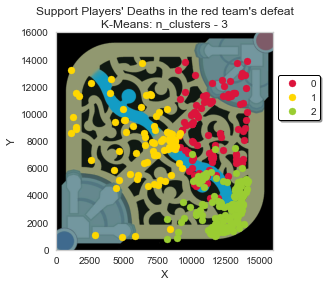

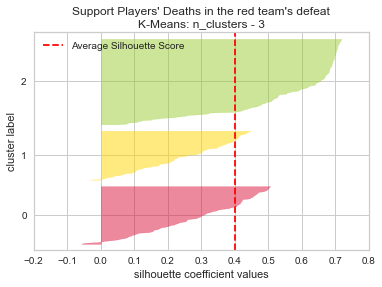

Silhouette score: 0.39942817482679954
2    146
0     99
1     84
Name: cluster, dtype: int64

Inertia: 327.3764569324323

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  11466.939394   8859.232323   0.575758
1        1   6516.440476   7877.095238   0.357143
2        2  12364.650685   3212.363014  -0.712329

In [505]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "gold", "yellowgreen"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [506]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1518.058494   2576.283334   0.514259
1        1   2218.517723   2488.057741   0.610286
2        2   1333.565545   1451.021463   0.481989

In [507]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14083.0            8997.0           13895.0   
1        1            9266.0            1119.0           13749.0   
2        2           14101.0            8190.0            7476.0   

   min coordinate_y  max timestamp  min timestamp  
0            3312.0              1             -1  
1             938.0              1             -1  
2             822.0              1             -1

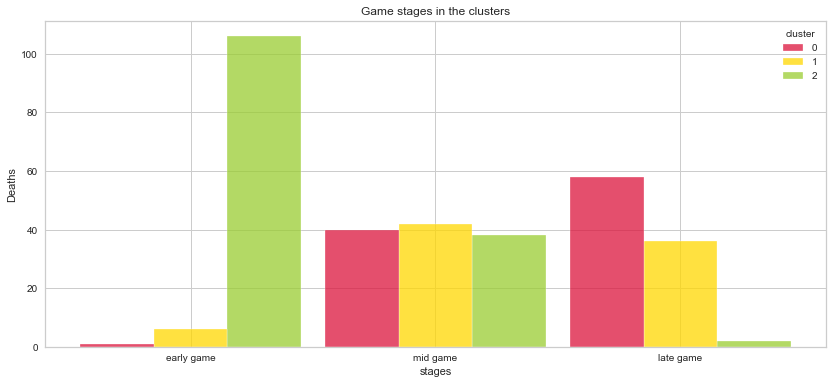

In [508]:
stagesPerClusterV2(redSideDefeat_df, colors)

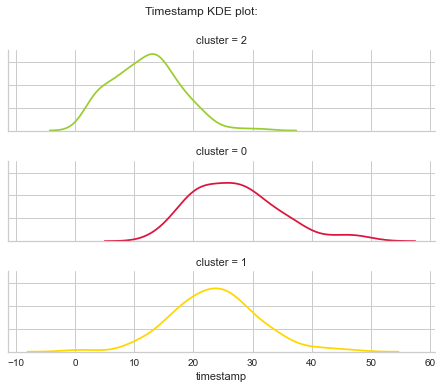

In [509]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [510]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Lux                 9
Shaco               8
Morgana             7
Brand               2
Senna               2
Karma               2
Pyke                1
Twitch              1
Seraphine           1
Ashe                1
Heimerdinger        1
Soraka              1
Blitzcrank          1
Zyra                1

Deaths with each champion:

In [511]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Lux             81
Morgana         71
Shaco           49
Brand           21
Karma           21
Senna           13
Pyke            11
Heimerdinger    10
Twitch          10
Ashe             9
Seraphine        9
Blitzcrank       9
Zyra             8
Soraka           7
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [512]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 14 champions when they won on the red side

Cluster 0 - died with 13 champions:
 ['Ashe' 'Blitzcrank' 'Brand' 'Heimerdinger' 'Karma' 'Lux' 'Morgana' 'Pyke'
 'Senna' 'Seraphine' 'Shaco' 'Soraka' 'Twitch']
Lux             30
Morgana         20
Shaco           13
Brand            8
Ashe             5
Pyke             5
Karma            4
Senna            4
Blitzcrank       3
Heimerdinger     2
Twitch           2
Soraka           2
Seraphine        1
Name: champion, dtype: int64

Cluster 1 - died with 13 champions:
 ['Blitzcrank' 'Brand' 'Heimerdinger' 'Karma' 'Lux' 'Morgana' 'Pyke'
 'Senna' 'Seraphine' 'Shaco' 'Soraka' 'Twitch' 'Zyra']
Morgana         20
Lux             18
Shaco           17
Heimerdinger     4
Brand            4
Seraphine        4
Karma            4
Pyke             3
Senna            3
Soraka           3
Zyra             2
Twitch           1
Blitzcrank       1
Name: champion, dtype: int64

Cluster 2 - died with 14 champions:
 ['Ashe' 'Blitzcra

---
#### Clustering Blue Team Victory

In [513]:
utility_deaths_df = df[(df["role"] == "UTILITY") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

blueSideVictory_df = utility_deaths_df[(utility_deaths_df["team"] == "Blue") & (utility_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team      summoner region champion  timestamp  \
116073  EUW1_6281582078  Blue   anonymous 9   euw1      Lux   3.765833   
116083  EUW1_6281582078  Blue   anonymous 9   euw1      Lux   8.032367   
116087  EUW1_6281582078  Blue   anonymous 9   euw1      Lux   9.862367   
116096  EUW1_6281582078  Blue   anonymous 9   euw1      Lux  14.477600   
116113  EUW1_6281582078  Blue   anonymous 9   euw1      Lux  18.387383   
...                 ...   ...           ...    ...      ...        ...   
622758  EUW1_6289382617  Blue  anonymous 19   euw1    Shaco   7.106200   
622767  EUW1_6289382617  Blue  anonymous 19   euw1    Shaco  11.104067   
622772  EUW1_6289382617  Blue  anonymous 19   euw1    Shaco  13.729250   
622794  EUW1_6289382617  Blue  anonymous 19   euw1    Shaco  22.997917   
622798  EUW1_6289382617  Blue  anonymous 19   euw1    Shaco  24.671117   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
116073       12007.0        1339.0    NaN            NaN  ...   
116083       11529.0        6457.0    NaN            NaN  ...   
116087       11267.0        5523.0    NaN            NaN  ...   
116096       10979.0        3732.0    NaN            NaN  ...   
116113       13787.0        9420.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
622758       11504.0        1631.0    NaN            NaN  ...   
622767       11339.0        1247.0    NaN            NaN  ...   
622772       12630.0        1560.0    NaN            NaN  ...   
622794        8574.0        5303.0    NaN            NaN  ...   
622798        8490.0        5370.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
116073              NaN     True      Death        NaN           NaN   NaN   
116083              NaN     True      Death        NaN           NaN   NaN   
116087              NaN     True      Death        NaN           NaN   NaN   
116096              NaN     True      Death        NaN           NaN   NaN   
116113              NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
622758              NaN     True      Death        NaN           NaN   NaN   
622767              NaN     True      Death        NaN           NaN   NaN   
622772              NaN     True      Death        NaN           NaN   NaN   
622794              NaN     True      Death        NaN           NaN   NaN   
622798              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName     role  rank  
116073      NaN       NaN  UTILITY  Iron  
116083      NaN       NaN  UTILITY  Iron  
116087      NaN       NaN  UTILITY  Iron  
116096      NaN       NaN  UTILITY  Iron  
116113      NaN       NaN  UTILITY  Iron  
...         ...       ...      ...   ...  
622758      NaN       NaN  UTILITY  Iron  
622767      NaN       NaN  UTILITY  Iron  
622772      NaN       NaN  UTILITY  Iron  
622794      NaN       NaN  UTILITY  Iron  
622798      NaN       NaN  UTILITY  Iron  

[346 rows x 56 columns]

In [514]:
profiling_df = utility_deaths_df[(utility_deaths_df["team"] == "Blue") & (utility_deaths_df["victory"] == True)].copy()

In [515]:
blueSideGames_df = utility_deaths_df[utility_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [516]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

61

In [517]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

53.98230088495575

In [518]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_utility_deaths_df.shape[0]) * 100
winRateBlueSide

5.7513297872340425

In [519]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 17 won 7 matches on the blue side
anonymous 17 has an average of 8.571428571428571 deaths per game when winning on the blue side

anonymous 18 won 18 matches on the blue side
anonymous 18 has an average of 4.444444444444445 deaths per game when winning on the blue side

anonymous 19 won 20 matches on the blue side
anonymous 19 has an average of 6.65 deaths per game when winning on the blue side

anonymous 9 won 16 matches on the blue side
anonymous 9 has an average of 4.5625 deaths per game when winning on the blue side



In [520]:
print("Victory games on blue side contains {} matches in which the utility died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 61 matches in which the utility died at least once
4 players died a total of 346 times on the blue side
Victory games on blue side contains an average of 5.672131147540983 deaths per game


In [521]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
116073       12007.0        1339.0   3.765833
116083       11529.0        6457.0   8.032367
116087       11267.0        5523.0   9.862367
116096       10979.0        3732.0  14.477600
116113       13787.0        9420.0  18.387383
...              ...           ...        ...
622758       11504.0        1631.0   7.106200
622767       11339.0        1247.0  11.104067
622772       12630.0        1560.0  13.729250
622794        8574.0        5303.0  22.997917
622798        8490.0        5370.0  24.671117

[346 rows x 3 columns]

Time discretization

In [522]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [523]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [524]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [525]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [526]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
116073      0.619029     -1.292343         -1
116083      0.451222      0.260504         -1
116087      0.359245     -0.022880         -1
116096      0.258139     -0.566286         -1
116113      1.243915      1.159505          0
...              ...           ...        ...
622758      0.442446     -1.203748         -1
622767      0.384521     -1.320257         -1
622772      0.837739     -1.225290         -1
622794     -0.586159     -0.089630          0
622798     -0.615648     -0.069302          0

[346 rows x 3 columns]

In [527]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.43668622969006554
Silhouette score for k=3: 0.41353241851160266
Silhouette score for k=4: 0.3871355405205097
Silhouette score for k=5: 0.3814418136176501
Silhouette score for k=6: 0.3921717092292295
Silhouette score for k=7: 0.39446267964269616
Silhouette score for k=8: 0.38635797970986174
Silhouette score for k=9: 0.38462842909813233
Silhouette score for k=10: 0.37455182661893827
Silhouette score for k=11: 0.38251523515759667
Silhouette score for k=12: 0.38431275001955795
Silhouette score for k=13: 0.394061743221013
Silhouette score for k=14: 0.39563987326178335
Silhouette score for k=15: 0.40399723366998025
Silhouette score for k=16: 0.4079572669319765
Silhouette score for k=17: 0.41960897244515133
Silhouette score for k=18: 0.4143742721206112
Silhouette score for k=19: 0.4259457901841846
Silhouette score for k=20: 0.43713146338770603
Silhouette score for k=25: 0.4244894826180015


K-Means with k = 3

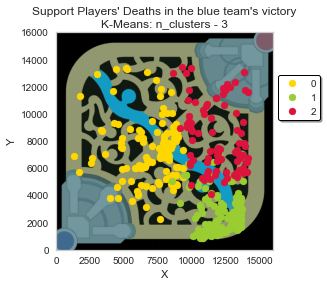

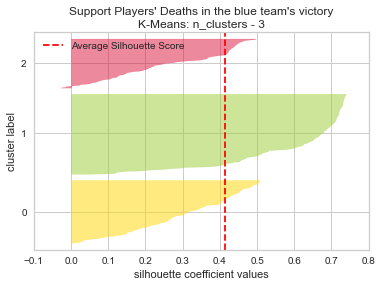

Silhouette score: 0.41353241851160266
1    143
0    115
2     88
Name: cluster, dtype: int64

Inertia: 327.7390452092723

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   6834.513043   7303.139130   0.330435
1        1  12028.867133   2529.083916  -0.783217
2        2  11797.931818   8358.295455   0.431818

In [528]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [529]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1868.306968   2335.375110   0.614629
1        1   1160.179816   1319.056696   0.460159
2        2   1539.932442   2456.118391   0.539264

In [530]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            9544.0            1349.0           13347.0   
1        1           13734.0            8572.0            7088.0   
2        2           14112.0            8641.0           13429.0   

   min coordinate_y  max timestamp  min timestamp  
0            2278.0              1             -1  
1             859.0              1             -1  
2            4103.0              1             -1

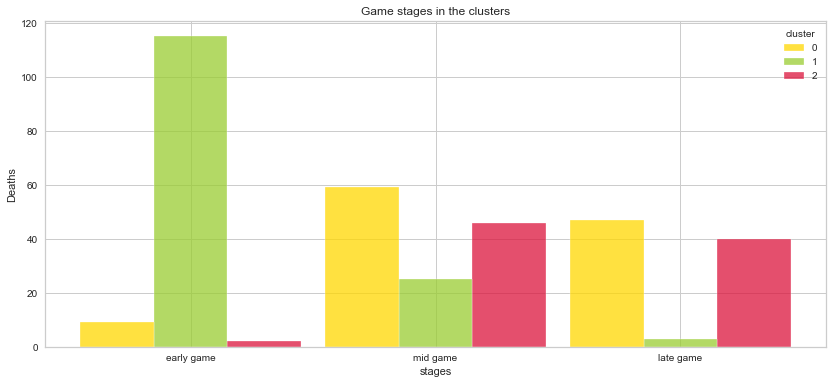

In [531]:
stagesPerClusterV2(blueSideVictory_df, colors)

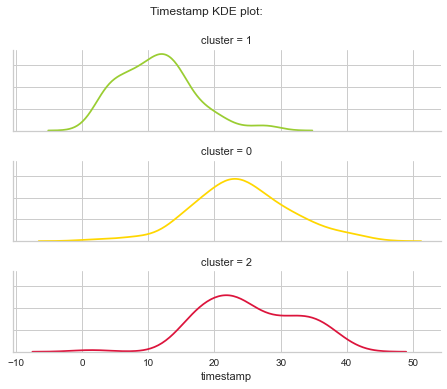

In [532]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [533]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Lux                18
Shaco              11
Morgana            11
Blitzcrank          4
Brand               3
Velkoz              2
Nautilus            2
Karma               2
Heimerdinger        1
Leona               1
Ashe                1
Senna               1
Swain               1
Malzahar            1
Soraka              1
Zyra                1

Deaths with each champion:

In [534]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Morgana         81
Shaco           80
Lux             78
Brand           18
Blitzcrank      16
Nautilus        11
Karma           10
Heimerdinger     9
Velkoz           8
Leona            8
Senna            8
Malzahar         6
Swain            5
Ashe             4
Soraka           2
Zyra             2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [535]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 16 champions when they won on the red side

Cluster 0 - died with 12 champions:
 ['Ashe' 'Blitzcrank' 'Brand' 'Heimerdinger' 'Karma' 'Leona' 'Lux'
 'Morgana' 'Nautilus' 'Senna' 'Shaco' 'Velkoz']
Morgana         36
Shaco           27
Lux             23
Brand            5
Blitzcrank       4
Ashe             4
Nautilus         4
Heimerdinger     4
Senna            4
Karma            2
Velkoz           1
Leona            1
Name: champion, dtype: int64

Cluster 1 - died with 15 champions:
 ['Blitzcrank' 'Brand' 'Heimerdinger' 'Karma' 'Leona' 'Lux' 'Malzahar'
 'Morgana' 'Nautilus' 'Senna' 'Shaco' 'Soraka' 'Swain' 'Velkoz' 'Zyra']
Shaco           33
Lux             32
Morgana         31
Brand            7
Velkoz           6
Nautilus         6
Blitzcrank       5
Leona            5
Heimerdinger     4
Swain            4
Senna            4
Malzahar         3
Soraka           1
Karma            1
Zyra             1
Name: champion, dtype: int64

Cluster 2 - died with 14 

---
#### Clustering Blue Team Defeat

In [536]:
utility_deaths_df = df[(df["role"] == "UTILITY") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

blueSideDefeat_df = utility_deaths_df[(utility_deaths_df["team"] == "Blue") & (utility_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team      summoner region champion  timestamp  \
116169  EUW1_6281436911  Blue   anonymous 9   euw1  Morgana   7.874683   
116173  EUW1_6281436911  Blue   anonymous 9   euw1  Morgana   9.868817   
116182  EUW1_6281436911  Blue   anonymous 9   euw1  Morgana  13.113817   
116187  EUW1_6281436911  Blue   anonymous 9   euw1  Morgana  16.570850   
116194  EUW1_6281436911  Blue   anonymous 9   euw1  Morgana  19.357633   
...                 ...   ...           ...    ...      ...        ...   
622640  EUW1_6289512859  Blue  anonymous 19   euw1    Shaco  13.184983   
622648  EUW1_6289512859  Blue  anonymous 19   euw1    Shaco  18.685417   
622650  EUW1_6289512859  Blue  anonymous 19   euw1    Shaco  19.923983   
622661  EUW1_6289512859  Blue  anonymous 19   euw1    Shaco  25.801283   
622665  EUW1_6289512859  Blue  anonymous 19   euw1    Shaco  28.519967   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
116169       12401.0        1798.0    NaN            NaN  ...   
116173       10414.0        1652.0    NaN            NaN  ...   
116182       10720.0        1987.0    NaN            NaN  ...   
116187       11345.0        3389.0    NaN            NaN  ...   
116194       12730.0        1370.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
622640       10958.0        5016.0    NaN            NaN  ...   
622648       11232.0        1638.0    NaN            NaN  ...   
622650        8083.0         969.0    NaN            NaN  ...   
622661        5469.0        1085.0    NaN            NaN  ...   
622665        7931.0        7297.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
116169              NaN    False      Death        NaN           NaN   NaN   
116173              NaN    False      Death        NaN           NaN   NaN   
116182              NaN    False      Death        NaN           NaN   NaN   
116187              NaN    False      Death        NaN           NaN   NaN   
116194              NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
622640              NaN    False      Death        NaN           NaN   NaN   
622648              NaN    False      Death        NaN           NaN   NaN   
622650              NaN    False      Death        NaN           NaN   NaN   
622661              NaN    False      Death        NaN           NaN   NaN   
622665              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName     role  rank  
116169      NaN       NaN  UTILITY  Iron  
116173      NaN       NaN  UTILITY  Iron  
116182      NaN       NaN  UTILITY  Iron  
116187      NaN       NaN  UTILITY  Iron  
116194      NaN       NaN  UTILITY  Iron  
...         ...       ...      ...   ...  
622640      NaN       NaN  UTILITY  Iron  
622648      NaN       NaN  UTILITY  Iron  
622650      NaN       NaN  UTILITY  Iron  
622661      NaN       NaN  UTILITY  Iron  
622665      NaN       NaN  UTILITY  Iron  

[472 rows x 56 columns]

In [537]:
profiling_df = utility_deaths_df[(utility_deaths_df["team"] == "Blue") & (utility_deaths_df["victory"] == False)].copy()

In [538]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 17 lost 7 matches on the blue side
anonymous 17 has an average of 14.0 deaths per game when losing on the blue side

anonymous 18 lost 16 matches on the blue side
anonymous 18 has an average of 8.6875 deaths per game when losing on the blue side

anonymous 19 lost 16 matches on the blue side
anonymous 19 has an average of 8.0 deaths per game when losing on the blue side

anonymous 9 lost 13 matches on the blue side
anonymous 9 has an average of 8.23076923076923 deaths per game when losing on the blue side



In [539]:
print("Defeat games on blue side contains {} matches in which the utility died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 52 matches in which the utility died at least once
4 players died a total of 472 times on the blue side
Defeat games on blue side contains an average of 9.076923076923077 deaths per game


In [540]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
116169       12401.0        1798.0   7.874683
116173       10414.0        1652.0   9.868817
116182       10720.0        1987.0  13.113817
116187       11345.0        3389.0  16.570850
116194       12730.0        1370.0  19.357633
...              ...           ...        ...
622640       10958.0        5016.0  13.184983
622648       11232.0        1638.0  18.685417
622650        8083.0         969.0  19.923983
622661        5469.0        1085.0  25.801283
622665        7931.0        7297.0  28.519967

[472 rows x 3 columns]

Time discretization

In [541]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [542]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [543]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [544]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [545]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
116169      1.144792     -0.894300         -1
116173      0.587606     -0.944417         -1
116182      0.673413     -0.829424         -1
116187      0.848673     -0.348169          0
116194      1.237049     -1.041217          0
...              ...           ...        ...
622640      0.740152      0.210320         -1
622648      0.816986     -0.949222          0
622650     -0.066043     -1.178865          0
622661     -0.799049     -1.139047          1
622665     -0.108666      0.993303          1

[472 rows x 3 columns]

In [546]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.42959118247677874
Silhouette score for k=3: 0.41513490196645425
Silhouette score for k=4: 0.4058240564409926
Silhouette score for k=5: 0.3727006093475753
Silhouette score for k=6: 0.38343988328459366
Silhouette score for k=7: 0.386647506348298
Silhouette score for k=8: 0.38301006827968764
Silhouette score for k=9: 0.37937822876176625
Silhouette score for k=10: 0.3908249850678323
Silhouette score for k=11: 0.4052712518162861
Silhouette score for k=12: 0.40398469916444185
Silhouette score for k=13: 0.4025653364140815
Silhouette score for k=14: 0.39757337965154105
Silhouette score for k=15: 0.41223159031072537
Silhouette score for k=16: 0.41352307882731654
Silhouette score for k=17: 0.4272965331991521
Silhouette score for k=18: 0.4108945895212207
Silhouette score for k=19: 0.4197075157711754
Silhouette score for k=20: 0.4360365470157993
Silhouette score for k=25: 0.42767887345579164


K-Means with k = 3

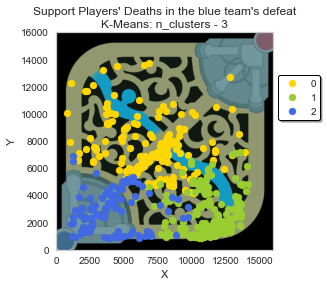

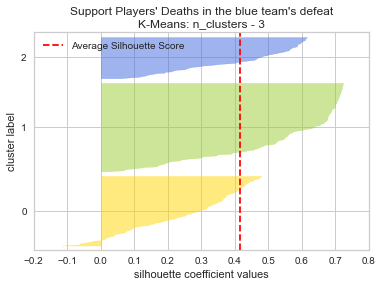

Silhouette score: 0.41513490196645425
1    209
0    165
2     98
Name: cluster, dtype: int64

Inertia: 460.03408746927437

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   6912.478788   7605.690909   0.418182
1        1  11355.583732   2556.559809  -0.669856
2        2   4208.816327   2949.938776   0.693878

In [547]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "royalblue"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [548]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2675.804295   2039.778959   0.583331
1        1   1523.341525   1540.357942   0.509339
2        2   2087.476610   1468.957945   0.460881

In [549]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           13899.0             825.0           13766.0   
1        1           14116.0            5656.0            7220.0   
2        2            9744.0            1141.0            6910.0   

   min coordinate_y  max timestamp  min timestamp  
0            4159.0              1             -1  
1             858.0              1             -1  
2             833.0              1              0

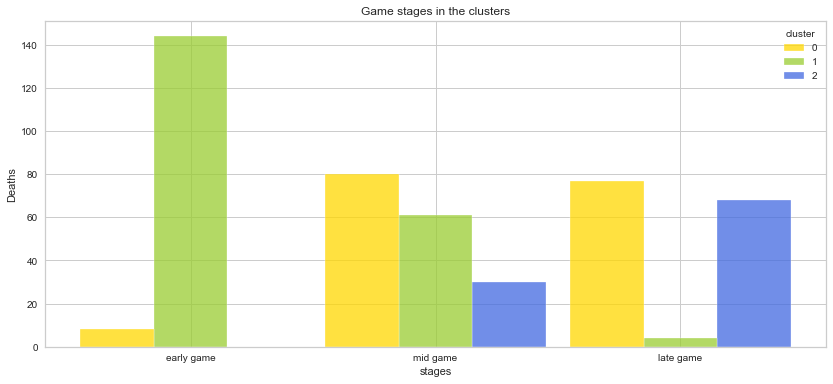

In [550]:
stagesPerClusterV2(blueSideDefeat_df, colors)

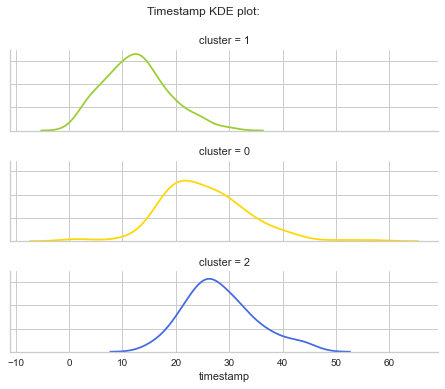

In [551]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [552]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Lux                16
Morgana             9
Shaco               6
Senna               3
Karma               2
Ashe                2
Velkoz              1
Zyra                1
Yuumi               1
Jhin                1
Pyke                1
Janna               1
Ahri                1
Brand               1
Pantheon            1
Nautilus            1
Bard                1
Blitzcrank          1
Heimerdinger        1
Swain               1

Deaths with each champion:

In [553]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Lux             142
Morgana          87
Shaco            39
Karma            24
Swain            16
Ashe             15
Zyra             14
Heimerdinger     14
Senna            14
Velkoz           13
Nautilus         13
Pantheon         11
Blitzcrank       11
Yuumi            11
Pyke             11
Ahri              9
Brand             8
Bard              7
Jhin              7
Janna             6
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [554]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 20 champions when they won on the red side

Cluster 0 - died with 20 champions:
 ['Ahri' 'Ashe' 'Bard' 'Blitzcrank' 'Brand' 'Heimerdinger' 'Janna' 'Jhin'
 'Karma' 'Lux' 'Morgana' 'Nautilus' 'Pantheon' 'Pyke' 'Senna' 'Shaco'
 'Swain' 'Velkoz' 'Yuumi' 'Zyra']
Lux             55
Morgana         27
Shaco           16
Karma           11
Nautilus         8
Swain            7
Heimerdinger     6
Velkoz           4
Yuumi            4
Jhin             4
Pyke             4
Blitzcrank       4
Zyra             4
Pantheon         3
Ashe             2
Senna            2
Janna            1
Ahri             1
Brand            1
Bard             1
Name: champion, dtype: int64

Cluster 1 - died with 20 champions:
 ['Ahri' 'Ashe' 'Bard' 'Blitzcrank' 'Brand' 'Heimerdinger' 'Janna' 'Jhin'
 'Karma' 'Lux' 'Morgana' 'Nautilus' 'Pantheon' 'Pyke' 'Senna' 'Shaco'
 'Swain' 'Velkoz' 'Yuumi' 'Zyra']
Lux             59
Morgana         40
Shaco           15
Senna            9
Swain         

---
### Bronze Players

#### Clustering Red Team Victory

In [555]:
utility_deaths_df = df[(df["role"] == "UTILITY") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

redSideVictory_df = utility_deaths_df[(utility_deaths_df["team"] == "Red") & (utility_deaths_df["victory"] == True)]
redSideVictory_df

gameId team       summoner region champion  timestamp  \
349856  EUW1_6284092857  Red   anonymous 85   euw1    Amumu   2.667617   
349861  EUW1_6284092857  Red   anonymous 85   euw1    Amumu   4.011533   
349866  EUW1_6284092857  Red   anonymous 85   euw1    Amumu   6.848350   
349873  EUW1_6284092857  Red   anonymous 85   euw1    Amumu   9.481333   
349878  EUW1_6284092857  Red   anonymous 85   euw1    Amumu  11.660317   
...                 ...  ...            ...    ...      ...        ...   
637254  EUW1_6289405581  Red  anonymous 109   euw1    Rakan  16.027083   
637273  EUW1_6289405581  Red  anonymous 109   euw1    Rakan  24.005467   
637280  EUW1_6289405581  Red  anonymous 109   euw1    Rakan  26.173917   
637290  EUW1_6289405581  Red  anonymous 109   euw1    Rakan  28.860100   
637296  EUW1_6289405581  Red  anonymous 109   euw1    Rakan  31.800650   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
349856       13118.0        2042.0    NaN            NaN  ...   
349861       12538.0        1657.0    NaN            NaN  ...   
349866       13995.0        4285.0    NaN            NaN  ...   
349873       12645.0        2533.0    NaN            NaN  ...   
349878       10915.0        1656.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
637254       11318.0        5278.0    NaN            NaN  ...   
637273        4247.0        3962.0    NaN            NaN  ...   
637280        5048.0        7558.0    NaN            NaN  ...   
637290        3143.0        2754.0    NaN            NaN  ...   
637296        3910.0        2527.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
349856              NaN     True      Death        NaN           NaN   NaN   
349861              NaN     True      Death        NaN           NaN   NaN   
349866              NaN     True      Death        NaN           NaN   NaN   
349873              NaN     True      Death        NaN           NaN   NaN   
349878              NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
637254              NaN     True      Death        NaN           NaN   NaN   
637273              NaN     True      Death        NaN           NaN   NaN   
637280              NaN     True      Death        NaN           NaN   NaN   
637290              NaN     True      Death        NaN           NaN   NaN   
637296              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName     role    rank  
349856      NaN       NaN  UTILITY  Bronze  
349861      NaN       NaN  UTILITY  Bronze  
349866      NaN       NaN  UTILITY  Bronze  
349873      NaN       NaN  UTILITY  Bronze  
349878      NaN       NaN  UTILITY  Bronze  
...         ...       ...      ...     ...  
637254      NaN       NaN  UTILITY  Bronze  
637273      NaN       NaN  UTILITY  Bronze  
637280      NaN       NaN  UTILITY  Bronze  
637290      NaN       NaN  UTILITY  Bronze  
637296      NaN       NaN  UTILITY  Bronze  

[694 rows x 56 columns]

In [556]:
profiling_df = utility_deaths_df[(utility_deaths_df["team"] == "Red") & (utility_deaths_df["victory"] == True)].copy()

In [557]:
redSideGames_df = utility_deaths_df[utility_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [558]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

115

In [559]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

47.5206611570248

In [560]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_utility_deaths_df.shape[0]) * 100
winRateRedSide

10.764696758182101

In [561]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 108 won 5 matches on the red side
anonymous 108 has an average of 3.0 deaths per game when winning on the red side

anonymous 109 won 36 matches on the red side
anonymous 109 has an average of 4.75 deaths per game when winning on the red side

anonymous 110 won 12 matches on the red side
anonymous 110 has an average of 4.583333333333333 deaths per game when winning on the red side

anonymous 85 won 20 matches on the red side
anonymous 85 has an average of 9.3 deaths per game when winning on the red side

anonymous 91 won 20 matches on the red side
anonymous 91 has an average of 6.95 deaths per game when winning on the red side

anonymous 92 won 8 matches on the red side
anonymous 92 has an average of 7.625 deaths per game when winning on the red side

anonymous 99 won 14 matches on the red side
anonymous 99 has an average of 4.785714285714286 deaths per game when winning on the red side



In [562]:
print("Victory games on red side contains {} matches in which the utility died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 115 matches in which the utility died at least once
7 players died a total of 694 times on the red side
Victory games on red side contains an average of 6.034782608695652 deaths per game


In [563]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
349856       13118.0        2042.0   2.667617
349861       12538.0        1657.0   4.011533
349866       13995.0        4285.0   6.848350
349873       12645.0        2533.0   9.481333
349878       10915.0        1656.0  11.660317
...              ...           ...        ...
637254       11318.0        5278.0  16.027083
637273        4247.0        3962.0  24.005467
637280        5048.0        7558.0  26.173917
637290        3143.0        2754.0  28.860100
637296        3910.0        2527.0  31.800650

[694 rows x 3 columns]

Time discretization

In [564]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [565]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [566]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [567]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [568]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
349856      1.037008     -1.066427         -1
349861      0.875267     -1.215038         -1
349866      1.281572     -0.200625         -1
349873      0.905106     -0.876901         -1
349878      0.422670     -1.215424         -1
...              ...           ...        ...
637254      0.535052      0.182675          0
637273     -1.436798     -0.325304          0
637280     -1.213427      1.062759          1
637290     -1.744664     -0.791594          1
637296     -1.530775     -0.879217          1

[694 rows x 3 columns]

In [569]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.44835729946002756
Silhouette score for k=3: 0.4276640118054765
Silhouette score for k=4: 0.41175003120888726
Silhouette score for k=5: 0.3651423619271111
Silhouette score for k=6: 0.3701677223032435
Silhouette score for k=7: 0.3533476200915035
Silhouette score for k=8: 0.34514314035050353
Silhouette score for k=9: 0.3575405441850698
Silhouette score for k=10: 0.366081675496407
Silhouette score for k=11: 0.37287806494347875
Silhouette score for k=12: 0.3814865094177678
Silhouette score for k=13: 0.382196894666516
Silhouette score for k=14: 0.39690039559405643
Silhouette score for k=15: 0.4027182176679356
Silhouette score for k=16: 0.400276052380069
Silhouette score for k=17: 0.41408277065865456
Silhouette score for k=18: 0.41854085168949606
Silhouette score for k=19: 0.41987861020646716
Silhouette score for k=20: 0.4174367779558695
Silhouette score for k=25: 0.4096941279730935


K-Means with k = 4

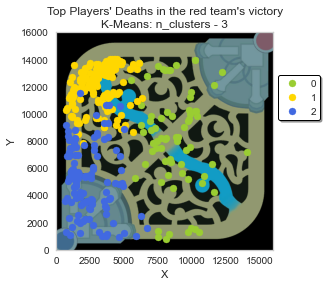

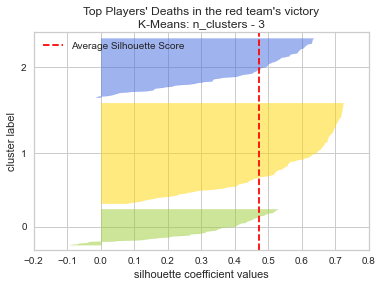

Silhouette score: 0.4720163027243763
1    195
2    115
0     70
Name: cluster, dtype: int64

Inertia: 352.87227458544737

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   8700.242857   8108.885714   0.214286
1        1   3179.984615  12241.374359  -0.656410
2        2   2458.304348   5193.086957   0.556522

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

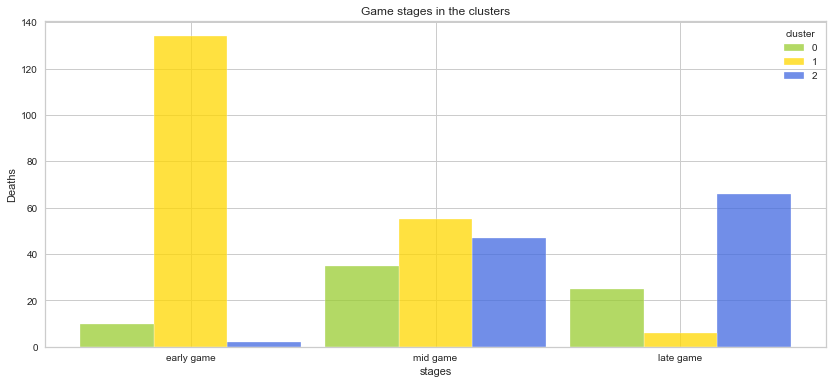

In [ ]:
stagesPerClusterV2(redSideVictory_df, colors)

K-Means with k = 3

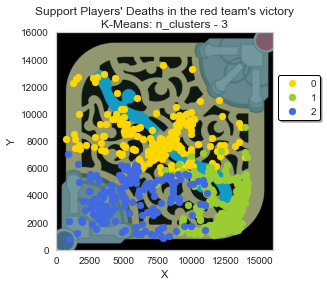

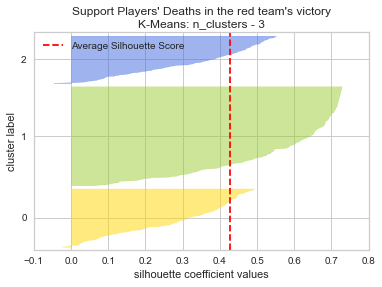

Silhouette score: 0.4276640118054765
1    335
0    198
2    161
Name: cluster, dtype: int64

Inertia: 653.1178478843013

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   7375.161616   8102.909091   0.363636
1        1  12328.841791   3348.158209  -0.722388
2        2   5793.055901   3779.434783   0.627329

In [570]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [571]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2794.195187   1742.572486   0.540380
1        1   1358.021597   1420.464491   0.460960
2        2   2467.801315   1467.660905   0.483516

In [572]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           13921.0             761.0           13624.0   
1        1           14096.0            7074.0            9017.0   
2        2           11103.0             907.0            7052.0   

   min coordinate_y  max timestamp  min timestamp  
0            5398.0              1             -1  
1            1094.0              1             -1  
2             784.0              1              0

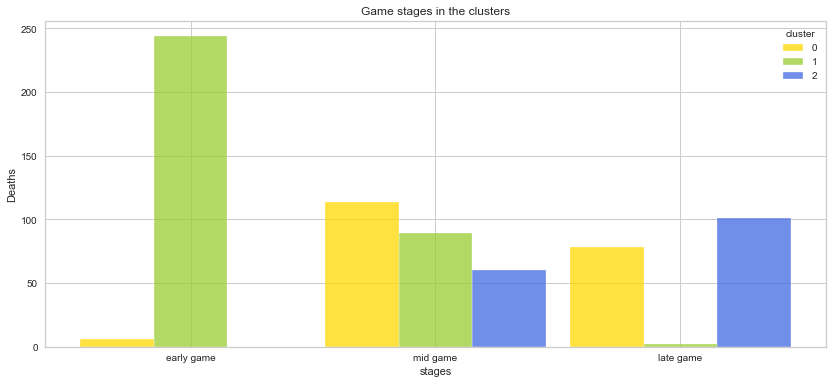

In [573]:
stagesPerClusterV2(redSideVictory_df, colors)

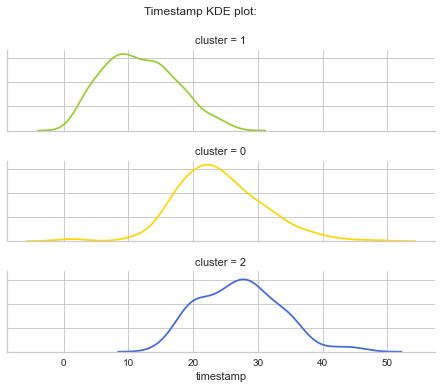

In [574]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [575]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Rakan              26
Blitzcrank         12
Amumu               9
Xerath              9
Yuumi               8
Sona                6
Swain               5
Heimerdinger        4
Teemo               4
Thresh              3
Lux                 3
Zoe                 3
Morgana             3
Soraka              2
Rell                2
Sett                2
Brand               1
KSante              1
Maokai              1
Lulu                1
Renata              1
Annie               1
Ashe                1
Leona               1
Lillia              1
Zyra                1
Zac                 1
Poppy               1
Senna               1
Taliyah             1

Deaths with each champion:

In [576]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Rakan           116
Amumu            66
Blitzcrank       53
Xerath           50
Teemo            42
Heimerdinger     42
Swain            38
Yuumi            37
Zoe              24
Morgana          21
Sona             19
Lux              18
Thresh           17
Soraka           17
Annie            15
Taliyah          13
Poppy            13
Rell             12
Senna            11
Lillia           11
Maokai            9
Brand             8
Renata            6
Sett              6
KSante            6
Zac               6
Leona             5
Lulu              5
Ashe              4
Zyra              4
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [577]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 30 champions when they won on the red side

Cluster 0 - died with 25 champions:
 ['Amumu' 'Annie' 'Blitzcrank' 'Brand' 'Heimerdinger' 'Leona' 'Lillia'
 'Lulu' 'Lux' 'Morgana' 'Poppy' 'Rakan' 'Rell' 'Renata' 'Senna' 'Sona'
 'Soraka' 'Swain' 'Taliyah' 'Teemo' 'Thresh' 'Xerath' 'Yuumi' 'Zoe' 'Zyra']
Rakan           39
Blitzcrank      16
Teemo           15
Heimerdinger    15
Amumu           14
Xerath          13
Morgana          9
Yuumi            8
Poppy            8
Annie            8
Swain            7
Taliyah          7
Sona             6
Soraka           5
Zoe              5
Senna            4
Thresh           4
Lillia           4
Lux              2
Lulu             2
Leona            2
Brand            2
Rell             1
Zyra             1
Renata           1
Name: champion, dtype: int64

Cluster 1 - died with 29 champions:
 ['Amumu' 'Annie' 'Ashe' 'Blitzcrank' 'Brand' 'Heimerdinger' 'KSante'
 'Leona' 'Lillia' 'Lulu' 'Lux' 'Maokai' 'Morgana' 'Poppy' 'Raka

---
#### Clustering Red Team Defeat

In [578]:
utility_deaths_df = df[(df["role"] == "UTILITY") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

redSideDefeat_df = utility_deaths_df[(utility_deaths_df["team"] == "Red") & (utility_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team      summoner region  champion  timestamp  \
350113  EUW1_6283689739  Red  anonymous 85   euw1     Amumu   6.144150   
350116  EUW1_6283689739  Red  anonymous 85   euw1     Amumu   7.881183   
350119  EUW1_6283689739  Red  anonymous 85   euw1     Amumu   9.069550   
350128  EUW1_6283689739  Red  anonymous 85   euw1     Amumu  13.055750   
350135  EUW1_6283689739  Red  anonymous 85   euw1     Amumu  16.100150   
...                 ...  ...           ...    ...       ...        ...   
633882  EUW1_6289401096  Red  anonymous 91   euw1  Pantheon  23.793033   
633888  EUW1_6289401096  Red  anonymous 91   euw1  Pantheon  25.506617   
633896  EUW1_6289401096  Red  anonymous 91   euw1  Pantheon  27.113250   
633907  EUW1_6289401096  Red  anonymous 91   euw1  Pantheon  33.910533   
633915  EUW1_6289401096  Red  anonymous 91   euw1  Pantheon  38.925000   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
350113       13994.0        4995.0    NaN            NaN  ...   
350116       11372.0        5094.0    NaN            NaN  ...   
350119       11769.0        1622.0    NaN            NaN  ...   
350128       11435.0        1204.0    NaN            NaN  ...   
350135        8022.0        8353.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
633882        5778.0        9008.0    NaN            NaN  ...   
633888       11771.0        3414.0    NaN            NaN  ...   
633896        3458.0        8184.0    NaN            NaN  ...   
633907        4234.0         904.0    NaN            NaN  ...   
633915       10742.0       11183.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
350113              NaN    False      Death        NaN           NaN   NaN   
350116              NaN    False      Death        NaN           NaN   NaN   
350119              NaN    False      Death        NaN           NaN   NaN   
350128              NaN    False      Death        NaN           NaN   NaN   
350135              NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
633882              NaN    False      Death        NaN           NaN   NaN   
633888              NaN    False      Death        NaN           NaN   NaN   
633896              NaN    False      Death        NaN           NaN   NaN   
633907              NaN    False      Death        NaN           NaN   NaN   
633915              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName     role    rank  
350113      NaN       NaN  UTILITY  Bronze  
350116      NaN       NaN  UTILITY  Bronze  
350119      NaN       NaN  UTILITY  Bronze  
350128      NaN       NaN  UTILITY  Bronze  
350135      NaN       NaN  UTILITY  Bronze  
...         ...       ...      ...     ...  
633882      NaN       NaN  UTILITY  Bronze  
633888      NaN       NaN  UTILITY  Bronze  
633896      NaN       NaN  UTILITY  Bronze  
633907      NaN       NaN  UTILITY  Bronze  
633915      NaN       NaN  UTILITY  Bronze  

[1023 rows x 56 columns]

In [579]:
profiling_df = utility_deaths_df[(utility_deaths_df["team"] == "Red") & (utility_deaths_df["victory"] == False)].copy()

In [580]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 108 lost 12 matches on the red side
anonymous 108 has an average of 5.75 deaths per game when losing on the red side

anonymous 109 lost 33 matches on the red side
anonymous 109 has an average of 5.848484848484849 deaths per game when losing on the red side

anonymous 110 lost 15 matches on the red side
anonymous 110 has an average of 6.133333333333334 deaths per game when losing on the red side

anonymous 85 lost 19 matches on the red side
anonymous 85 has an average of 11.263157894736842 deaths per game when losing on the red side

anonymous 91 lost 29 matches on the red side
anonymous 91 has an average of 9.620689655172415 deaths per game when losing on the red side

anonymous 92 lost 9 matches on the red side
anonymous 92 has an average of 10.333333333333334 deaths per game when losing on the red side

anonymous 99 lost 10 matches on the red side
anonymous 99 has an average of 8.3 deaths per game when losing on the red side



In [581]:
print("Defeat games on red side contains {} matches in which the utility died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 127 matches in which the utility died at least once
7 players died a total of 1023 times on the red side
Defeat games on red side contains an average of 8.05511811023622 deaths per game


In [582]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
350113       13994.0        4995.0   6.144150
350116       11372.0        5094.0   7.881183
350119       11769.0        1622.0   9.069550
350128       11435.0        1204.0  13.055750
350135        8022.0        8353.0  16.100150
...              ...           ...        ...
633882        5778.0        9008.0  23.793033
633888       11771.0        3414.0  25.506617
633896        3458.0        8184.0  27.113250
633907        4234.0         904.0  33.910533
633915       10742.0       11183.0  38.925000

[1023 rows x 3 columns]

Time discretization

In [583]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [584]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [585]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [586]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [587]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
350113      1.179637     -0.525497         -1
350116      0.300283     -0.496891         -1
350119      0.433427     -1.500129         -1
350128      0.321412     -1.620910         -1
350135     -0.823224      0.444800          0
...              ...           ...        ...
633882     -1.575806      0.634063          0
633888      0.434098     -0.982329          1
633896     -2.353877      0.395967          1
633907     -2.093626     -1.707596          1
633915      0.088997      1.262531          1

[1023 rows x 3 columns]

In [588]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.43822421941036604
Silhouette score for k=3: 0.4153345214943891
Silhouette score for k=4: 0.38105993978341773
Silhouette score for k=5: 0.36998899545640945
Silhouette score for k=6: 0.37506156874164454
Silhouette score for k=7: 0.3777166263962081
Silhouette score for k=8: 0.3398713286410433
Silhouette score for k=9: 0.386281694143895
Silhouette score for k=10: 0.34051096893764987
Silhouette score for k=11: 0.3594707675555111
Silhouette score for k=12: 0.3656976003761116
Silhouette score for k=13: 0.3686759329739447
Silhouette score for k=14: 0.3811318048931027
Silhouette score for k=15: 0.39517972322950445
Silhouette score for k=16: 0.3897445051360151
Silhouette score for k=17: 0.4019460031472917
Silhouette score for k=18: 0.4033118481052352
Silhouette score for k=19: 0.3926779547935043
Silhouette score for k=20: 0.40715017091315847
Silhouette score for k=25: 0.39813215900725824


K-Means with k = 3

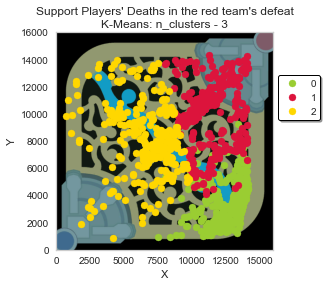

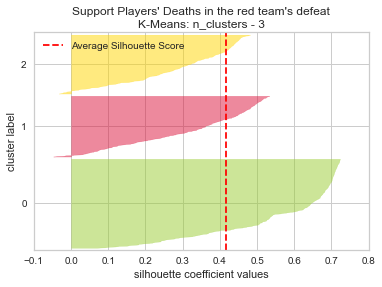

Silhouette score: 0.4153345214943891
0    436
1    298
2    289
Name: cluster, dtype: int64

Inertia: 956.3377125564003

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  12453.034404   3765.580275  -0.711009
1        1  11437.137584   9906.963087   0.540268
2        2   6504.525952   8222.435986   0.498270

In [589]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "crimson", "gold"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [590]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1341.826099   1536.938135   0.477924
1        1   1497.399746   2464.593430   0.505064
2        2   1954.751578   2588.755153   0.571071

In [591]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14120.0            7506.0            9225.0   
1        1           14151.0            8003.0           14357.0   
2        2            9781.0             774.0           13934.0   

   min coordinate_y  max timestamp  min timestamp  
0             937.0              1             -1  
1            4142.0              1             -1  
2             904.0              1             -1

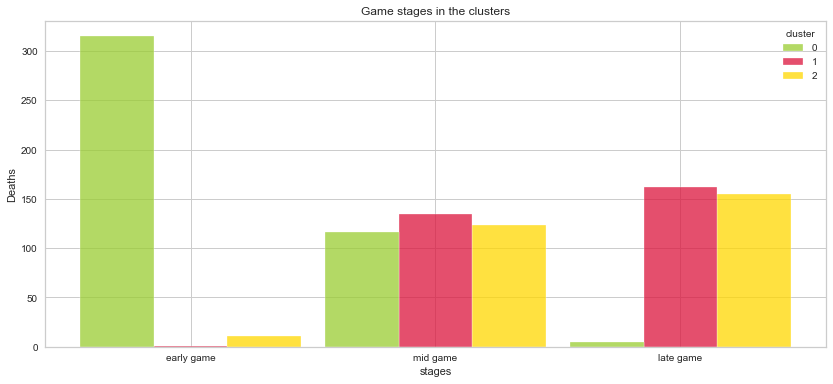

In [592]:
stagesPerClusterV2(redSideDefeat_df, colors)

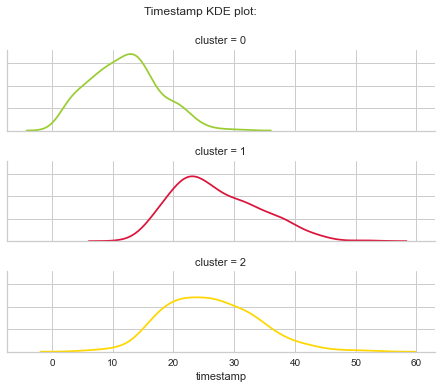

In [593]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [594]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Rakan              27
Sona                9
Morgana             8
Blitzcrank          8
Xerath              7
Lillia              6
Amumu               6
Lux                 4
Thresh              4
Ashe                3
Heimerdinger        3
Swain               3
Zoe                 3
Yuumi               3
Ornn                3
Renata              3
AurelionSol         2
Shaco               2
Brand               2
Neeko               2
Kled                2
Malphite            2
Teemo               2
Pyke                2
Karma               1
Veigar              1
Annie               1
Maokai              1
Seraphine           1
Nautilus            1
Taliyah             1
Senna               1
Soraka              1
Leona               1
Pantheon            1

Deaths with each champion:

In [595]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Rakan           159
Morgana          79
Lillia           72
Amumu            63
Sona             49
Xerath           49
Ornn             34
Pyke             34
Blitzcrank       33
Swain            32
Lux              32
Thresh           31
Renata           30
Zoe              29
Heimerdinger     26
Malphite         23
Brand            21
Yuumi            19
Teemo            19
Ashe             18
Kled             17
Shaco            17
AurelionSol      16
Annie            15
Taliyah          13
Neeko            12
Nautilus         12
Pantheon         12
Veigar           11
Senna             9
Soraka            9
Maokai            8
Karma             8
Leona             7
Seraphine         5
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [596]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 35 champions when they won on the red side

Cluster 0 - died with 35 champions:
 ['Amumu' 'Annie' 'Ashe' 'AurelionSol' 'Blitzcrank' 'Brand' 'Heimerdinger'
 'Karma' 'Kled' 'Leona' 'Lillia' 'Lux' 'Malphite' 'Maokai' 'Morgana'
 'Nautilus' 'Neeko' 'Ornn' 'Pantheon' 'Pyke' 'Rakan' 'Renata' 'Senna'
 'Seraphine' 'Shaco' 'Sona' 'Soraka' 'Swain' 'Taliyah' 'Teemo' 'Thresh'
 'Veigar' 'Xerath' 'Yuumi' 'Zoe']
Rakan           74
Morgana         34
Lillia          32
Amumu           25
Xerath          22
Sona            21
Blitzcrank      17
Swain           16
Ornn            14
Teemo           13
Heimerdinger    13
Malphite        12
Zoe             12
Pyke            11
Thresh          11
Brand           11
Yuumi           11
Lux             10
Ashe             8
Renata           7
Annie            6
Shaco            6
AurelionSol      6
Pantheon         6
Neeko            5
Karma            5
Taliyah          4
Soraka           4
Kled             4
Nautilus         4
Le

---
#### Clustering Blue Team Victory

In [597]:
utility_deaths_df = df[(df["role"] == "UTILITY") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

blueSideVictory_df = utility_deaths_df[(utility_deaths_df["team"] == "Blue") & (utility_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team       summoner region champion  timestamp  \
349775  EUW1_6284165413  Blue   anonymous 85   euw1     Ornn   4.932400   
349797  EUW1_6284165413  Blue   anonymous 85   euw1     Ornn  16.331567   
349801  EUW1_6284165413  Blue   anonymous 85   euw1     Ornn  18.407250   
349808  EUW1_6284165413  Blue   anonymous 85   euw1     Ornn  21.347267   
349813  EUW1_6284165413  Blue   anonymous 85   euw1     Ornn  24.699767   
...                 ...   ...            ...    ...      ...        ...   
633978  EUW1_6289280145  Blue   anonymous 91   euw1    Neeko  30.319900   
633991  EUW1_6289280145  Blue   anonymous 91   euw1    Neeko  34.923083   
633994  EUW1_6289280145  Blue   anonymous 91   euw1    Neeko  36.973400   
637067  EUW1_6289697063  Blue  anonymous 109   euw1    Rakan  17.074633   
637086  EUW1_6289697063  Blue  anonymous 109   euw1    Rakan  26.228517   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
349775       13612.0        1672.0    NaN            NaN  ...   
349797        8766.0        5062.0    NaN            NaN  ...   
349801        7201.0        4934.0    NaN            NaN  ...   
349808       11194.0        1257.0    NaN            NaN  ...   
349813        8462.0        2289.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
633978        5079.0        7569.0    NaN            NaN  ...   
633991       10941.0       11616.0    NaN            NaN  ...   
633994        8299.0        8536.0    NaN            NaN  ...   
637067       10641.0        1235.0    NaN            NaN  ...   
637086        1424.0        5823.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
349775              NaN     True      Death        NaN           NaN   NaN   
349797              NaN     True      Death        NaN           NaN   NaN   
349801              NaN     True      Death        NaN           NaN   NaN   
349808              NaN     True      Death        NaN           NaN   NaN   
349813              NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
633978              NaN     True      Death        NaN           NaN   NaN   
633991              NaN     True      Death        NaN           NaN   NaN   
633994              NaN     True      Death        NaN           NaN   NaN   
637067              NaN     True      Death        NaN           NaN   NaN   
637086              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName     role    rank  
349775      NaN       NaN  UTILITY  Bronze  
349797      NaN       NaN  UTILITY  Bronze  
349801      NaN       NaN  UTILITY  Bronze  
349808      NaN       NaN  UTILITY  Bronze  
349813      NaN       NaN  UTILITY  Bronze  
...         ...       ...      ...     ...  
633978      NaN       NaN  UTILITY  Bronze  
633991      NaN       NaN  UTILITY  Bronze  
633994      NaN       NaN  UTILITY  Bronze  
637067      NaN       NaN  UTILITY  Bronze  
637086      NaN       NaN  UTILITY  Bronze  

[641 rows x 56 columns]

In [598]:
profiling_df = utility_deaths_df[(utility_deaths_df["team"] == "Blue") & (utility_deaths_df["victory"] == True)].copy()

In [599]:
blueSideGames_df = utility_deaths_df[utility_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [600]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

112

In [601]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

50.678733031674206

In [602]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_utility_deaths_df.shape[0]) * 100
winRateBlueSide

10.654920212765957

In [603]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 108 won 11 matches on the blue side
anonymous 108 has an average of 3.090909090909091 deaths per game when winning on the blue side

anonymous 109 won 31 matches on the blue side
anonymous 109 has an average of 4.032258064516129 deaths per game when winning on the blue side

anonymous 110 won 11 matches on the blue side
anonymous 110 has an average of 3.272727272727273 deaths per game when winning on the blue side

anonymous 85 won 23 matches on the blue side
anonymous 85 has an average of 8.478260869565217 deaths per game when winning on the blue side

anonymous 91 won 24 matches on the blue side
anonymous 91 has an average of 6.75 deaths per game when winning on the blue side

anonymous 92 won 6 matches on the blue side
anonymous 92 has an average of 7.166666666666667 deaths per game when winning on the blue side

anonymous 99 won 6 matches on the blue side
anonymous 99 has an average of 7.666666666666667 deaths per game when winning on the blue side



In [604]:
print("Victory games on blue side contains {} matches in which the utility died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 112 matches in which the utility died at least once
7 players died a total of 641 times on the blue side
Victory games on blue side contains an average of 5.723214285714286 deaths per game


In [605]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
349775       13612.0        1672.0   4.932400
349797        8766.0        5062.0  16.331567
349801        7201.0        4934.0  18.407250
349808       11194.0        1257.0  21.347267
349813        8462.0        2289.0  24.699767
...              ...           ...        ...
633978        5079.0        7569.0  30.319900
633991       10941.0       11616.0  34.923083
633994        8299.0        8536.0  36.973400
637067       10641.0        1235.0  17.074633
637086        1424.0        5823.0  26.228517

[641 rows x 3 columns]

Time discretization

In [606]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [607]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [608]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [609]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [610]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
349775      1.364914     -1.050904         -1
349797     -0.253140     -0.092443          0
349801     -0.775685     -0.128632          0
349808      0.557557     -1.168238          0
349813     -0.354644     -0.876459          0
...              ...           ...        ...
633978     -1.484210      0.616366          1
633991      0.473081      1.760583          1
633994     -0.409068      0.889768          1
637067      0.372913     -1.174458          0
637086     -2.704595      0.122716          1

[641 rows x 3 columns]

In [611]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4527318317721845
Silhouette score for k=3: 0.4421378263770376
Silhouette score for k=4: 0.42069282993796936
Silhouette score for k=5: 0.3774090695831346
Silhouette score for k=6: 0.3803373000590564
Silhouette score for k=7: 0.3781755814007369
Silhouette score for k=8: 0.367368549448252
Silhouette score for k=9: 0.3395581910990337
Silhouette score for k=10: 0.3504372086570974
Silhouette score for k=11: 0.3555760101547937
Silhouette score for k=12: 0.37342565632180275
Silhouette score for k=13: 0.3838262839796301
Silhouette score for k=14: 0.390919236598189
Silhouette score for k=15: 0.39887073107268545
Silhouette score for k=16: 0.4019650758328381
Silhouette score for k=17: 0.4023688455889543
Silhouette score for k=18: 0.40498000338518464
Silhouette score for k=19: 0.409611688865109
Silhouette score for k=20: 0.41545325170429437
Silhouette score for k=25: 0.39942130562482264


K-Means with k = 3

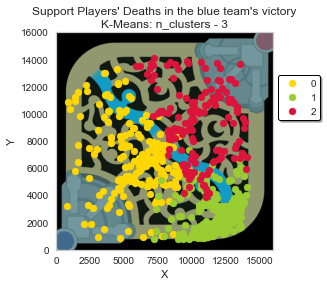

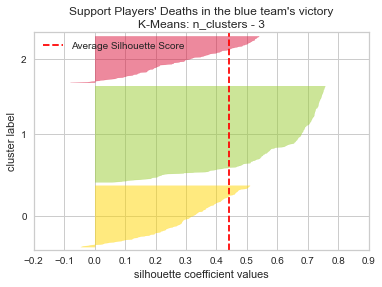

Silhouette score: 0.4421378263770376
1    302
0    193
2    146
Name: cluster, dtype: int64

Inertia: 602.094838350987

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   5830.062176   6707.445596   0.331606
1        1  11491.910596   2610.913907  -0.738411
2        2  10337.095890   9392.410959   0.712329

In [612]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [613]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1995.356022   2651.405962   0.551856
1        1   1346.033165   1432.275686   0.468669
2        2   1913.257981   2664.098852   0.452677

In [614]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            9457.0             816.0           13307.0   
1        1           14036.0            7218.0            7311.0   
2        2           14054.0            5858.0           14100.0   

   min coordinate_y  max timestamp  min timestamp  
0             855.0              1             -1  
1             799.0              1             -1  
2            3902.0              1              0

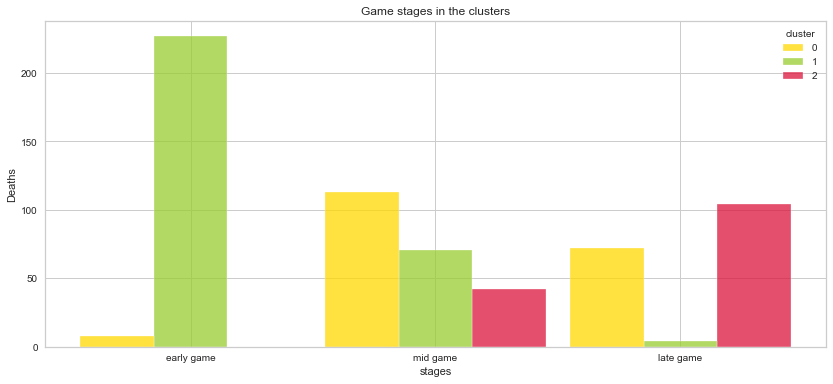

In [615]:
stagesPerClusterV2(blueSideVictory_df, colors)

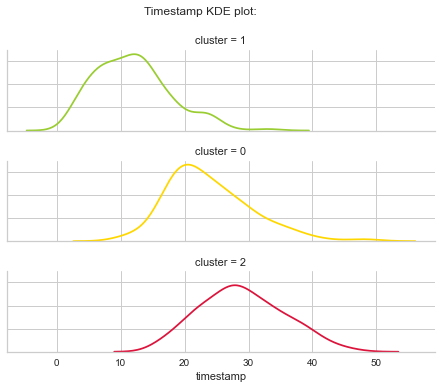

In [616]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [617]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Rakan              20
Blitzcrank         12
Sona               10
Xerath              7
Amumu               7
Morgana             6
Heimerdinger        6
Annie               6
Swain               4
Zoe                 4
Soraka              3
Teemo               3
Bard                2
Renata              2
Thresh              2
Rell                2
Yuumi               1
Vex                 1
Ornn                1
Nami                1
Lillia              1
Taric               1
Ashe                1
Veigar              1
Ziggs               1
Senna               1
Lux                 1
Braum               1
Nautilus            1
Brand               1
Maokai              1
Neeko               1

Deaths with each champion:

In [618]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Rakan           72
Heimerdinger    59
Annie           55
Amumu           48
Blitzcrank      45
Morgana         41
Swain           29
Zoe             29
Xerath          28
Teemo           27
Sona            27
Veigar          15
Vex             14
Soraka          13
Rell            12
Lillia          11
Brand           11
Nautilus        11
Bard            10
Renata          10
Taric           10
Neeko           10
Ornn             9
Ziggs            8
Ashe             7
Thresh           7
Nami             6
Braum            5
Senna            5
Maokai           3
Yuumi            2
Lux              2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [619]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 32 champions when they won on the red side

Cluster 0 - died with 29 champions:
 ['Amumu' 'Annie' 'Ashe' 'Bard' 'Blitzcrank' 'Brand' 'Braum' 'Heimerdinger'
 'Lillia' 'Morgana' 'Nami' 'Nautilus' 'Neeko' 'Ornn' 'Rakan' 'Rell'
 'Renata' 'Senna' 'Sona' 'Soraka' 'Swain' 'Taric' 'Teemo' 'Thresh'
 'Veigar' 'Vex' 'Xerath' 'Ziggs' 'Zoe']
Rakan           24
Heimerdinger    18
Morgana         17
Annie           15
Zoe             14
Swain           13
Blitzcrank      13
Vex             10
Sona             9
Amumu            9
Veigar           7
Ornn             6
Xerath           5
Taric            4
Soraka           4
Neeko            3
Ziggs            3
Renata           3
Teemo            3
Nautilus         2
Brand            2
Nami             2
Ashe             1
Senna            1
Lillia           1
Braum            1
Bard             1
Thresh           1
Rell             1
Name: champion, dtype: int64

Cluster 1 - died with 32 champions:
 ['Amumu' 'Annie' 'Ashe'

---
#### Clustering Blue Team Defeat

In [620]:
utility_deaths_df = df[(df["role"] == "UTILITY") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

blueSideDefeat_df = utility_deaths_df[(utility_deaths_df["team"] == "Blue") & (utility_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team      summoner region champion  timestamp  \
349723  EUW1_6284274590  Blue  anonymous 85   euw1    Amumu   3.048083   
349726  EUW1_6284274590  Blue  anonymous 85   euw1    Amumu   4.658883   
349735  EUW1_6284274590  Blue  anonymous 85   euw1    Amumu   9.500817   
349738  EUW1_6284274590  Blue  anonymous 85   euw1    Amumu  10.737417   
349743  EUW1_6284274590  Blue  anonymous 85   euw1    Amumu  13.696117   
...                 ...   ...           ...    ...      ...        ...   
634031  EUW1_6289269582  Blue  anonymous 92   euw1    Amumu   5.110917   
634036  EUW1_6289269582  Blue  anonymous 92   euw1    Amumu   7.873633   
634054  EUW1_6289269582  Blue  anonymous 92   euw1    Amumu  16.206967   
634065  EUW1_6289269582  Blue  anonymous 92   euw1    Amumu  21.635400   
634070  EUW1_6289269582  Blue  anonymous 92   euw1    Amumu  23.138567   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
349723       13617.0        3574.0    NaN            NaN  ...   
349726       10761.0        1994.0    NaN            NaN  ...   
349735       11204.0        1629.0    NaN            NaN  ...   
349738       12769.0        3218.0    NaN            NaN  ...   
349743       10655.0         891.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
634031       11998.0        2603.0    NaN            NaN  ...   
634036       10967.0        1383.0    NaN            NaN  ...   
634054        9418.0        1052.0    NaN            NaN  ...   
634065        9701.0        6320.0    NaN            NaN  ...   
634070        2516.0        2830.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
349723              NaN    False      Death        NaN           NaN   NaN   
349726              NaN    False      Death        NaN           NaN   NaN   
349735              NaN    False      Death        NaN           NaN   NaN   
349738              NaN    False      Death        NaN           NaN   NaN   
349743              NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
634031              NaN    False      Death        NaN           NaN   NaN   
634036              NaN    False      Death        NaN           NaN   NaN   
634054              NaN    False      Death        NaN           NaN   NaN   
634065              NaN    False      Death        NaN           NaN   NaN   
634070              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName     role    rank  
349723      NaN       NaN  UTILITY  Bronze  
349726      NaN       NaN  UTILITY  Bronze  
349735      NaN       NaN  UTILITY  Bronze  
349738      NaN       NaN  UTILITY  Bronze  
349743      NaN       NaN  UTILITY  Bronze  
...         ...       ...      ...     ...  
634031      NaN       NaN  UTILITY  Bronze  
634036      NaN       NaN  UTILITY  Bronze  
634054      NaN       NaN  UTILITY  Bronze  
634065      NaN       NaN  UTILITY  Bronze  
634070      NaN       NaN  UTILITY  Bronze  

[811 rows x 56 columns]

In [621]:
profiling_df = utility_deaths_df[(utility_deaths_df["team"] == "Blue") & (utility_deaths_df["victory"] == False)].copy()

In [622]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 108 lost 7 matches on the blue side
anonymous 108 has an average of 5.571428571428571 deaths per game when losing on the blue side

anonymous 109 lost 32 matches on the blue side
anonymous 109 has an average of 5.65625 deaths per game when losing on the blue side

anonymous 110 lost 12 matches on the blue side
anonymous 110 has an average of 4.916666666666667 deaths per game when losing on the blue side

anonymous 85 lost 17 matches on the blue side
anonymous 85 has an average of 12.529411764705882 deaths per game when losing on the blue side

anonymous 91 lost 16 matches on the blue side
anonymous 91 has an average of 8.0625 deaths per game when losing on the blue side

anonymous 92 lost 10 matches on the blue side
anonymous 92 has an average of 9.2 deaths per game when losing on the blue side

anonymous 99 lost 15 matches on the blue side
anonymous 99 has an average of 6.533333333333333 deaths per game when losing on the blue side



In [623]:
print("Defeat games on blue side contains {} matches in which the utility died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 109 matches in which the utility died at least once
7 players died a total of 811 times on the blue side
Defeat games on blue side contains an average of 7.440366972477064 deaths per game


In [624]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
349723       13617.0        3574.0   3.048083
349726       10761.0        1994.0   4.658883
349735       11204.0        1629.0   9.500817
349738       12769.0        3218.0  10.737417
349743       10655.0         891.0  13.696117
...              ...           ...        ...
634031       11998.0        2603.0   5.110917
634036       10967.0        1383.0   7.873633
634054        9418.0        1052.0  16.206967
634065        9701.0        6320.0  21.635400
634070        2516.0        2830.0  23.138567

[811 rows x 3 columns]

Time discretization

In [625]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [626]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [627]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [628]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [629]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
349723      1.510828     -0.257010         -1
349726      0.703253     -0.808283         -1
349735      0.828517     -0.935634         -1
349738      1.271044     -0.381221         -1
349743      0.673280     -1.193127         -1
...              ...           ...        ...
634031      1.053032     -0.595799         -1
634036      0.761502     -1.021465         -1
634054      0.323500     -1.136953          0
634065      0.403522      0.701087          0
634070     -1.628141     -0.516597          0

[811 rows x 3 columns]

In [630]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4292469823636895
Silhouette score for k=3: 0.4062064499972091
Silhouette score for k=4: 0.40873570523078157
Silhouette score for k=5: 0.3548976916470326
Silhouette score for k=6: 0.3845168430185756
Silhouette score for k=7: 0.38639864431050086
Silhouette score for k=8: 0.3859385368155663
Silhouette score for k=9: 0.3855298076031784
Silhouette score for k=10: 0.3524038544104993
Silhouette score for k=11: 0.3621621492413298
Silhouette score for k=12: 0.3721161454967516
Silhouette score for k=13: 0.37403107126439894
Silhouette score for k=14: 0.3710256117869245
Silhouette score for k=15: 0.38474889399825074
Silhouette score for k=16: 0.391059058690268
Silhouette score for k=17: 0.39523722953123036
Silhouette score for k=18: 0.4013745471477365
Silhouette score for k=19: 0.40511248459369714
Silhouette score for k=20: 0.41450134277822903
Silhouette score for k=25: 0.4043175077321479


K-Means with k = 3

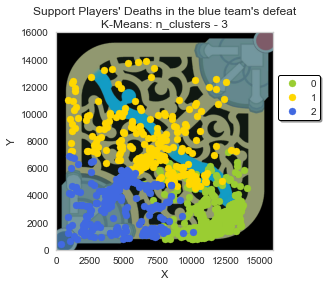

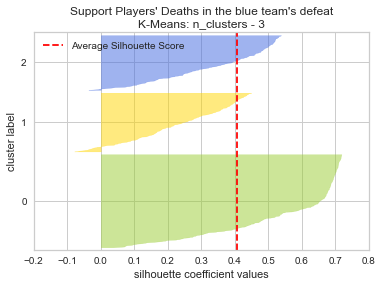

Silhouette score: 0.4062064499972091
0    365
1    231
2    215
Name: cluster, dtype: int64

Inertia: 801.5308224074304

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  11263.235616   2577.495890  -0.701370
1        1   6909.658009   7913.601732   0.515152
2        2   4664.897674   3381.776744   0.469767

In [631]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [632]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1476.488793   1429.748618   0.497802
1        1   2844.204736   2178.301550   0.541351
2        2   2142.326653   1583.604633   0.535066

In [633]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14070.0            6467.0            7174.0   
1        1           13244.0             888.0           13905.0   
2        2           10049.0             402.0            6903.0   

   min coordinate_y  max timestamp  min timestamp  
0             785.0              1             -1  
1            4566.0              1             -1  
2             442.0              1             -1

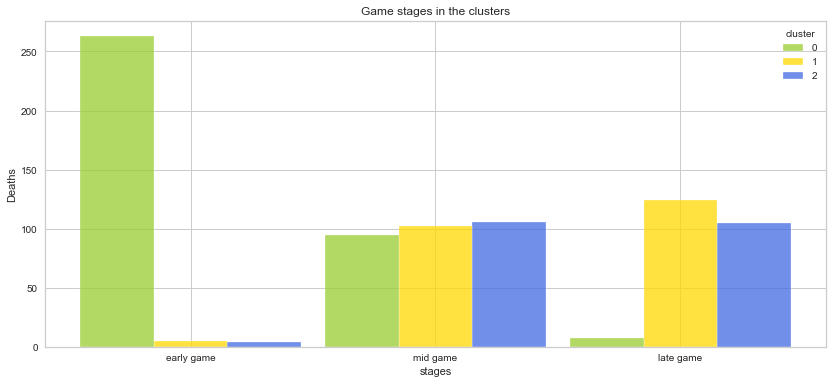

In [634]:
stagesPerClusterV2(blueSideDefeat_df, colors)

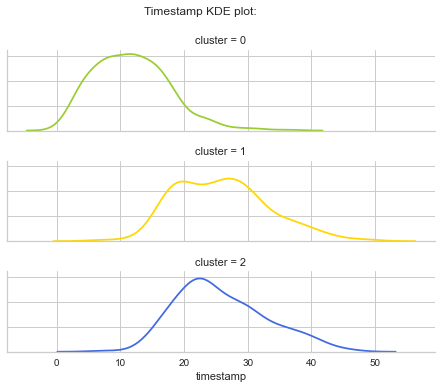

In [635]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [636]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Rakan              15
Xerath             12
Amumu              12
Blitzcrank         10
Yuumi               7
Sona                6
Heimerdinger        5
Rell                3
Lux                 3
Thresh              3
Ashe                3
Lillia              2
Malphite            2
Annie               2
Soraka              2
Teemo               2
Morgana             2
Kled                2
Zoe                 2
Brand               2
Chogath             1
Swain               1
Ornn                1
Karma               1
MissFortune         1
Nautilus            1
AurelionSol         1
Shaco               1
Alistar             1
Lulu                1
Seraphine           1
Nami                1

Deaths with each champion:

In [637]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Amumu           124
Rakan            69
Xerath           68
Heimerdinger     62
Blitzcrank       42
Yuumi            38
Sona             34
Lux              32
Thresh           30
Ashe             26
Rell             25
Malphite         24
Lillia           24
Teemo            21
Annie            21
Morgana          18
Brand            17
Seraphine        15
Zoe              14
Kled             14
Ornn             11
Swain            10
MissFortune       9
AurelionSol       9
Chogath           9
Soraka            9
Nautilus          7
Lulu              7
Nami              7
Shaco             6
Karma             5
Alistar           4
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [638]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 32 champions when they won on the red side

Cluster 0 - died with 32 champions:
 ['Alistar' 'Amumu' 'Annie' 'Ashe' 'AurelionSol' 'Blitzcrank' 'Brand'
 'Chogath' 'Heimerdinger' 'Karma' 'Kled' 'Lillia' 'Lulu' 'Lux' 'Malphite'
 'MissFortune' 'Morgana' 'Nami' 'Nautilus' 'Ornn' 'Rakan' 'Rell'
 'Seraphine' 'Shaco' 'Sona' 'Soraka' 'Swain' 'Teemo' 'Thresh' 'Xerath'
 'Yuumi' 'Zoe']
Amumu           54
Xerath          44
Rakan           27
Heimerdinger    22
Blitzcrank      21
Sona            17
Yuumi           15
Annie           13
Lux             13
Teemo           12
Rell            12
Ashe            12
Lillia          11
Malphite        11
Brand           11
Thresh          10
Seraphine        8
Swain            6
MissFortune      5
Morgana          5
AurelionSol      5
Zoe              4
Shaco            4
Chogath          4
Kled             4
Nautilus         3
Ornn             3
Lulu             2
Alistar          2
Karma            2
Nami             2
Soraka 

---
### Silver Players

#### Clustering Red Team Victory

In [639]:
utility_deaths_df = df[(df["role"] == "UTILITY") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

redSideVictory_df = utility_deaths_df[(utility_deaths_df["team"] == "Red") & (utility_deaths_df["victory"] == True)]
redSideVictory_df

gameId team       summoner region champion  timestamp  \
8554    EUW1_6275112717  Red  anonymous 137   euw1    Braum  25.564383   
8631    EUW1_6274997166  Red  anonymous 137   euw1    Taric   7.378617   
8649    EUW1_6274997166  Red  anonymous 137   euw1    Taric  14.398867   
8677    EUW1_6274997166  Red  anonymous 137   euw1    Taric  23.787967   
8715    EUW1_6274997166  Red  anonymous 137   euw1    Taric  32.311683   
...                 ...  ...            ...    ...      ...        ...   
642593  EUW1_6289658287  Red  anonymous 168   euw1  Morgana  39.141233   
642676  EUW1_6289523454  Red  anonymous 168   euw1    Swain   6.939200   
642684  EUW1_6289523454  Red  anonymous 168   euw1    Swain  10.780100   
642688  EUW1_6289523454  Red  anonymous 168   euw1    Swain  12.531033   
642700  EUW1_6289523454  Red  anonymous 168   euw1    Swain  18.134383   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
8554          1072.0         763.0    NaN            NaN  ...   
8631         13288.0        1426.0    NaN            NaN  ...   
8649         11332.0        1846.0    NaN            NaN  ...   
8677          6615.0        6301.0    NaN            NaN  ...   
8715          2669.0        1966.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
642593       10056.0        6250.0    NaN            NaN  ...   
642676       14059.0        4209.0    NaN            NaN  ...   
642684       13527.0        3069.0    NaN            NaN  ...   
642688       13873.0        3772.0    NaN            NaN  ...   
642700       12170.0        8997.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
8554                NaN     True      Death        NaN           NaN   NaN   
8631                NaN     True      Death        NaN           NaN   NaN   
8649                NaN     True      Death        NaN           NaN   NaN   
8677                NaN     True      Death        NaN           NaN   NaN   
8715                NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
642593              NaN     True      Death        NaN           NaN   NaN   
642676              NaN     True      Death        NaN           NaN   NaN   
642684              NaN     True      Death        NaN           NaN   NaN   
642688              NaN     True      Death        NaN           NaN   NaN   
642700              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName     role    rank  
8554        NaN       NaN  UTILITY  Silver  
8631        NaN       NaN  UTILITY  Silver  
8649        NaN       NaN  UTILITY  Silver  
8677        NaN       NaN  UTILITY  Silver  
8715        NaN       NaN  UTILITY  Silver  
...         ...       ...      ...     ...  
642593      NaN       NaN  UTILITY  Silver  
642676      NaN       NaN  UTILITY  Silver  
642684      NaN       NaN  UTILITY  Silver  
642688      NaN       NaN  UTILITY  Silver  
642700      NaN       NaN  UTILITY  Silver  

[537 rows x 56 columns]

In [640]:
profiling_df = utility_deaths_df[(utility_deaths_df["team"] == "Red") & (utility_deaths_df["victory"] == True)].copy()

In [641]:
redSideGames_df = utility_deaths_df[utility_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [642]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

106

In [643]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

53.0

In [644]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_utility_deaths_df.shape[0]) * 100
winRateRedSide

8.32945556072592

In [645]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 137 won 8 matches on the red side
anonymous 137 has an average of 5.0 deaths per game when winning on the red side

anonymous 139 won 7 matches on the red side
anonymous 139 has an average of 4.714285714285714 deaths per game when winning on the red side

anonymous 140 won 7 matches on the red side
anonymous 140 has an average of 5.285714285714286 deaths per game when winning on the red side

anonymous 145 won 10 matches on the red side
anonymous 145 has an average of 9.8 deaths per game when winning on the red side

anonymous 146 won 17 matches on the red side
anonymous 146 has an average of 3.7058823529411766 deaths per game when winning on the red side

anonymous 168 won 23 matches on the red side
anonymous 168 has an average of 4.043478260869565 deaths per game when winning on the red side

anonymous 67 won 11 matches on the red side
anonymous 67 has an average of 4.909090909090909 deaths per game when winning on the red side

anonymous 76 won 23 matches on the red side
a

In [646]:
print("Victory games on red side contains {} matches in which the utility died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 106 matches in which the utility died at least once
8 players died a total of 537 times on the red side
Victory games on red side contains an average of 5.066037735849057 deaths per game


In [647]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
8554          1072.0         763.0  25.564383
8631         13288.0        1426.0   7.378617
8649         11332.0        1846.0  14.398867
8677          6615.0        6301.0  23.787967
8715          2669.0        1966.0  32.311683
...              ...           ...        ...
642593       10056.0        6250.0  39.141233
642676       14059.0        4209.0   6.939200
642684       13527.0        3069.0  10.780100
642688       13873.0        3772.0  12.531033
642700       12170.0        8997.0  18.134383

[537 rows x 3 columns]

Time discretization

In [648]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [649]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [650]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [651]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [652]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
8554       -2.286130     -1.491306          1
8631        1.112009     -1.257901         -1
8649        0.567907     -1.110043         -1
8677       -0.744227      0.458309          0
8715       -1.841891     -1.067798          1
...              ...           ...        ...
642593      0.212960      0.440355          1
642676      1.326480     -0.278165         -1
642684      1.178492     -0.679494         -1
642688      1.274740     -0.432008         -1
642700      0.801014      1.407417          0

[537 rows x 3 columns]

In [653]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4492952908450394
Silhouette score for k=3: 0.4384594351974201
Silhouette score for k=4: 0.4128412108083169
Silhouette score for k=5: 0.4194499111657724
Silhouette score for k=6: 0.34013364467866575
Silhouette score for k=7: 0.3459056382308795
Silhouette score for k=8: 0.34586919320721315
Silhouette score for k=9: 0.3654522573395963
Silhouette score for k=10: 0.3740417710533865
Silhouette score for k=11: 0.38432617100377836
Silhouette score for k=12: 0.38239298646425673
Silhouette score for k=13: 0.39203145523342775
Silhouette score for k=14: 0.3921258574775608
Silhouette score for k=15: 0.40085876174431634
Silhouette score for k=16: 0.4069167999102698
Silhouette score for k=17: 0.4009167568007643
Silhouette score for k=18: 0.39913642872806016
Silhouette score for k=19: 0.4170876835040878
Silhouette score for k=20: 0.42204926487710087
Silhouette score for k=25: 0.3984615181150778


K-Means with k = 4

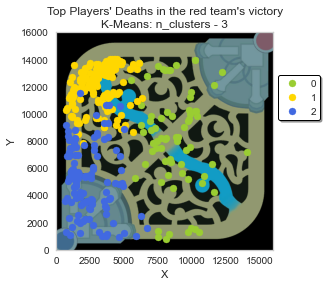

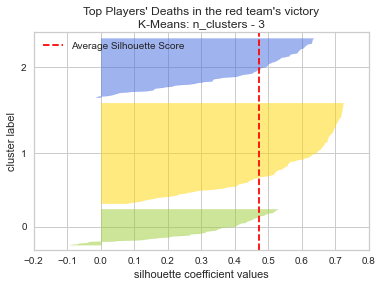

Silhouette score: 0.4720163027243763
1    195
2    115
0     70
Name: cluster, dtype: int64

Inertia: 352.87227458544737

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   8700.242857   8108.885714   0.214286
1        1   3179.984615  12241.374359  -0.656410
2        2   2458.304348   5193.086957   0.556522

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

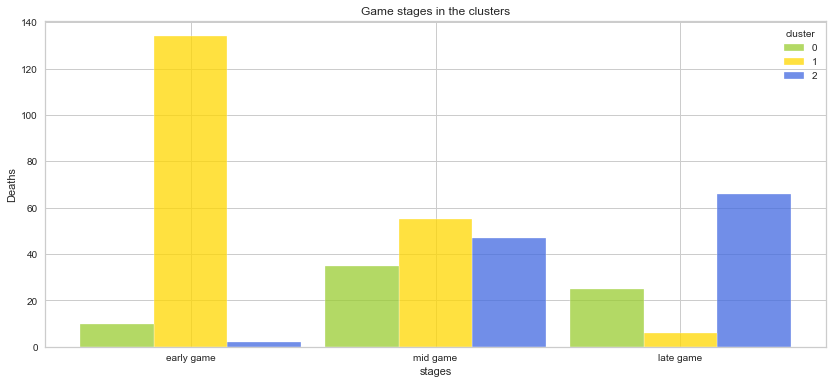

In [ ]:
stagesPerClusterV2(redSideVictory_df, colors)

K-Means with k = 3

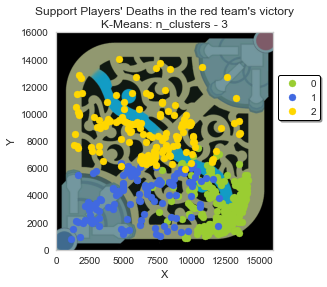

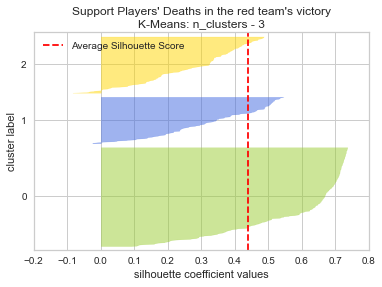

Silhouette score: 0.4384594351974201
0    263
2    150
1    124
Name: cluster, dtype: int64

Inertia: 517.1088389976408

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  12146.425856   3358.239544  -0.809886
1        1   6164.258065   3925.169355   0.693548
2        2   6867.213333   8764.020000   0.213333

In [654]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "royalblue", "gold"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [655]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1498.005955   1458.870533   0.401964
1        1   2720.617197   1570.261308   0.478192
2        2   2821.337731   1807.637027   0.679084

In [656]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14120.0            6596.0            7457.0   
1        1           11990.0            1072.0            6390.0   
2        2           13525.0            1297.0           14054.0   

   min coordinate_y  max timestamp  min timestamp  
0             834.0              1             -1  
1             763.0              1             -1  
2            5928.0              1             -1

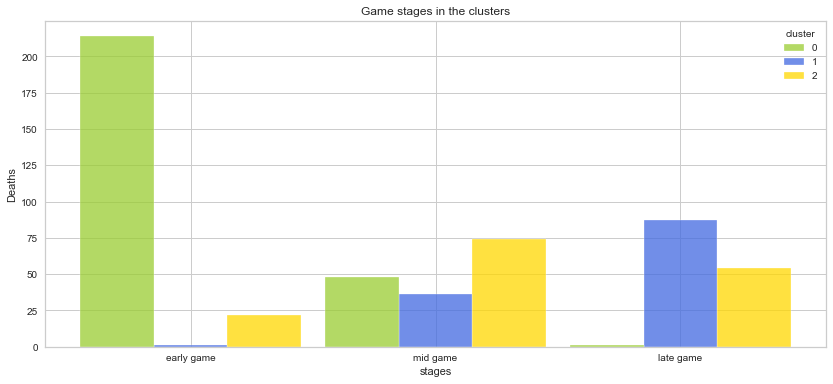

In [657]:
stagesPerClusterV2(redSideVictory_df, colors)

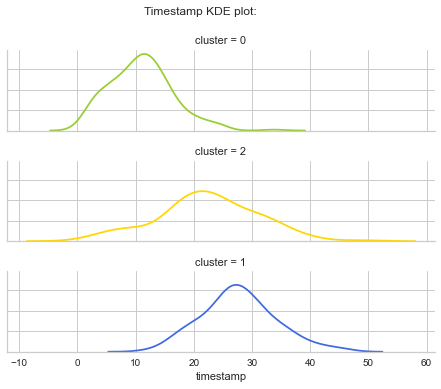

In [658]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [659]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Seraphine        11
Maokai            9
Twitch            9
Taric             8
Lux               7
Nautilus          5
Karma             4
Nami              4
Velkoz            4
Syndra            4
Swain             3
Sett              3
Rakan             3
Annie             3
Janna             3
Brand             2
Amumu             2
TahmKench         2
Soraka            2
Morgana           2
Nunu              2
Shaco             2
Leona             2
Caitlyn           1
Blitzcrank        1
Senna             1
Zac               1
Ashe              1
Braum             1
Pantheon          1
Bard              1
Xerath            1
Thresh            1

Deaths with each champion:

In [660]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Twitch        88
Seraphine     51
Taric         40
Lux           38
Maokai        32
Sett          26
Nautilus      24
Velkoz        23
Karma         20
Nami          16
Syndra        14
Janna         13
Nunu          13
Morgana       13
Shaco         12
Swain         10
Rakan          9
Bard           9
Caitlyn        9
Ashe           8
Annie          8
Zac            8
Leona          8
Soraka         7
Brand          7
Amumu          6
Senna          5
TahmKench      5
Pantheon       5
Thresh         4
Xerath         3
Blitzcrank     2
Braum          1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [661]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 33 champions when they won on the red side

Cluster 0 - died with 31 champions:
 ['Amumu' 'Annie' 'Ashe' 'Bard' 'Blitzcrank' 'Brand' 'Caitlyn' 'Janna'
 'Karma' 'Leona' 'Lux' 'Maokai' 'Morgana' 'Nami' 'Nautilus' 'Nunu'
 'Pantheon' 'Rakan' 'Senna' 'Seraphine' 'Sett' 'Shaco' 'Soraka' 'Swain'
 'Syndra' 'TahmKench' 'Taric' 'Thresh' 'Twitch' 'Velkoz' 'Zac']
Twitch        48
Seraphine     24
Taric         22
Lux           19
Maokai        16
Velkoz        14
Sett          11
Nami           9
Nautilus       8
Swain          8
Morgana        7
Syndra         7
Karma          6
Caitlyn        6
Janna          6
Brand          5
Nunu           5
Bard           5
Amumu          4
Ashe           4
Annie          4
Soraka         4
Pantheon       3
Senna          3
Rakan          3
TahmKench      2
Blitzcrank     2
Leona          2
Shaco          2
Zac            2
Thresh         2
Name: champion, dtype: int64

Cluster 1 - died with 30 champions:
 ['Amumu' 'Annie' 'Ashe' 

---
#### Clustering Red Team Defeat

In [662]:
utility_deaths_df = df[(df["role"] == "UTILITY") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

redSideDefeat_df = utility_deaths_df[(utility_deaths_df["team"] == "Red") & (utility_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team       summoner region   champion  timestamp  \
8433    EUW1_6275141233  Red  anonymous 137   euw1       Nami   7.188033   
8441    EUW1_6275141233  Red  anonymous 137   euw1       Nami  10.727683   
8444    EUW1_6275141233  Red  anonymous 137   euw1       Nami  12.012933   
8449    EUW1_6275141233  Red  anonymous 137   euw1       Nami  13.966550   
8470    EUW1_6275141233  Red  anonymous 137   euw1       Nami  23.841750   
...                 ...  ...            ...    ...        ...        ...   
639791  EUW1_6289374432  Red  anonymous 146   euw1  Seraphine  18.431250   
639806  EUW1_6289374432  Red  anonymous 146   euw1  Seraphine  26.419367   
639820  EUW1_6289374432  Red  anonymous 146   euw1  Seraphine  31.976767   
639823  EUW1_6289374432  Red  anonymous 146   euw1  Seraphine  33.299067   
639836  EUW1_6289374432  Red  anonymous 146   euw1  Seraphine  39.566400   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
8433         11932.0        2698.0    NaN            NaN  ...   
8441         13544.0        3916.0    NaN            NaN  ...   
8444         11579.0        3273.0    NaN            NaN  ...   
8449          7236.0        7257.0    NaN            NaN  ...   
8470          9437.0        9671.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
639791        7071.0        7006.0    NaN            NaN  ...   
639806       10116.0        7754.0    NaN            NaN  ...   
639820        8295.0        8516.0    NaN            NaN  ...   
639823       10966.0       11254.0    NaN            NaN  ...   
639836       12938.0       11970.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
8433                NaN    False      Death        NaN           NaN   NaN   
8441                NaN    False      Death        NaN           NaN   NaN   
8444                NaN    False      Death        NaN           NaN   NaN   
8449                NaN    False      Death        NaN           NaN   NaN   
8470                NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
639791              NaN    False      Death        NaN           NaN   NaN   
639806              NaN    False      Death        NaN           NaN   NaN   
639820              NaN    False      Death        NaN           NaN   NaN   
639823              NaN    False      Death        NaN           NaN   NaN   
639836              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName     role    rank  
8433        NaN       NaN  UTILITY  Silver  
8441        NaN       NaN  UTILITY  Silver  
8444        NaN       NaN  UTILITY  Silver  
8449        NaN       NaN  UTILITY  Silver  
8470        NaN       NaN  UTILITY  Silver  
...         ...       ...      ...     ...  
639791      NaN       NaN  UTILITY  Silver  
639806      NaN       NaN  UTILITY  Silver  
639820      NaN       NaN  UTILITY  Silver  
639823      NaN       NaN  UTILITY  Silver  
639836      NaN       NaN  UTILITY  Silver  

[608 rows x 56 columns]

In [663]:
profiling_df = utility_deaths_df[(utility_deaths_df["team"] == "Red") & (utility_deaths_df["victory"] == False)].copy()

In [664]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 137 lost 5 matches on the red side
anonymous 137 has an average of 7.2 deaths per game when losing on the red side

anonymous 139 lost 10 matches on the red side
anonymous 139 has an average of 7.4 deaths per game when losing on the red side

anonymous 140 lost 5 matches on the red side
anonymous 140 has an average of 5.4 deaths per game when losing on the red side

anonymous 145 lost 1 matches on the red side
anonymous 145 has an average of 11.0 deaths per game when losing on the red side

anonymous 146 lost 17 matches on the red side
anonymous 146 has an average of 5.647058823529412 deaths per game when losing on the red side

anonymous 168 lost 25 matches on the red side
anonymous 168 has an average of 7.36 deaths per game when losing on the red side

anonymous 67 lost 4 matches on the red side
anonymous 67 has an average of 6.75 deaths per game when losing on the red side

anonymous 76 lost 27 matches on the red side
anonymous 76 has an average of 5.666666666666667 deaths

In [665]:
print("Defeat games on red side contains {} matches in which the utility died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 94 matches in which the utility died at least once
8 players died a total of 608 times on the red side
Defeat games on red side contains an average of 6.468085106382978 deaths per game


In [666]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
8433         11932.0        2698.0   7.188033
8441         13544.0        3916.0  10.727683
8444         11579.0        3273.0  12.012933
8449          7236.0        7257.0  13.966550
8470          9437.0        9671.0  23.841750
...              ...           ...        ...
639791        7071.0        7006.0  18.431250
639806       10116.0        7754.0  26.419367
639820        8295.0        8516.0  31.976767
639823       10966.0       11254.0  33.299067
639836       12938.0       11970.0  39.566400

[608 rows x 3 columns]

Time discretization

In [667]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [668]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [669]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [670]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [671]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
8433        0.674574     -1.173296         -1
8441        1.165047     -0.824292         -1
8444        0.567169     -1.008536         -1
8449       -0.754249      0.133032         -1
8470       -0.084564      0.824736          0
...              ...           ...        ...
639791     -0.804452      0.061111          0
639806      0.122031      0.275442          1
639820     -0.432034      0.493784          1
639823      0.380655      1.278326          1
639836      0.980663      1.483487          1

[608 rows x 3 columns]

In [672]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4270247411532643
Silhouette score for k=3: 0.385343419778172
Silhouette score for k=4: 0.37463846657217637
Silhouette score for k=5: 0.3844980210217615
Silhouette score for k=6: 0.40098150210421984
Silhouette score for k=7: 0.39272019430211624
Silhouette score for k=8: 0.4031312989841509
Silhouette score for k=9: 0.3880909254880792
Silhouette score for k=10: 0.39280624863783753
Silhouette score for k=11: 0.4087571908235524
Silhouette score for k=12: 0.41736075700957054
Silhouette score for k=13: 0.3810210135535612
Silhouette score for k=14: 0.39210654480830676
Silhouette score for k=15: 0.3942357053736305
Silhouette score for k=16: 0.377035782718955
Silhouette score for k=17: 0.40082038647779533
Silhouette score for k=18: 0.3904840856808639
Silhouette score for k=19: 0.40557225506683164
Silhouette score for k=20: 0.3945950739691101
Silhouette score for k=25: 0.39109705845221887


K-Means with k = 3

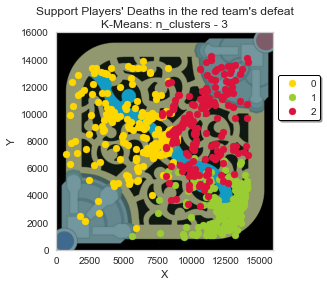

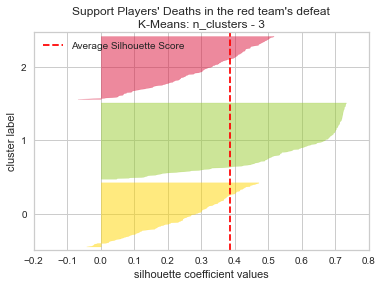

Silhouette score: 0.385343419778172
1    228
0    192
2    188
Name: cluster, dtype: int64

Inertia: 598.9435432153194

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   5670.270833   8753.812500   0.260417
1        1  12194.903509   3284.561404  -0.697368
2        2  10838.021277   9044.494681   0.632979

In [673]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [674]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2085.693742   2416.883306   0.695893
1        1   1431.338638   1411.510100   0.504882
2        2   1605.908571   2661.521556   0.481992

In [675]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            8930.0             766.0           13882.0   
1        1           14094.0            5570.0            8521.0   
2        2           14135.0            7790.0           14231.0   

   min coordinate_y  max timestamp  min timestamp  
0            1613.0              1             -1  
1             923.0              1             -1  
2            3215.0              1              0

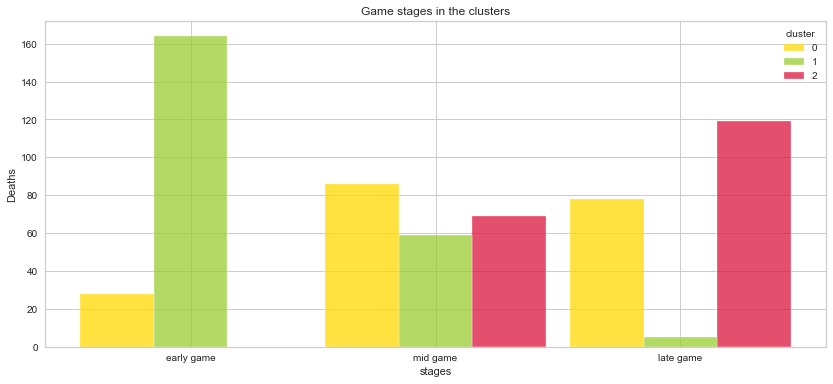

In [676]:
stagesPerClusterV2(redSideDefeat_df, colors)

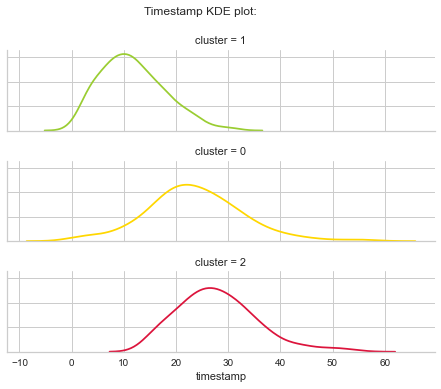

In [677]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [678]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Seraphine           9
Twitch              9
Lux                 7
Maokai              6
Sett                5
Swain               4
Ashe                4
Nunu                4
Rakan               4
Velkoz              3
Brand               3
Annie               2
Thresh              2
Karma               2
Nami                2
Nautilus            2
Morgana             2
Pantheon            2
Amumu               2
Zyra                2
Sion                1
FiddleSticks        1
Zac                 1
Braum               1
Senna               1
Leona               1
Heimerdinger        1
Galio               1
Yuumi               1
Lulu                1
Anivia              1
Ivern               1
Zilean              1
Rell                1
Karthus             1
Pyke                1
Taric               1
Alistar             1

Deaths with each champion:

In [679]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Twitch          71
Seraphine       51
Lux             40
Swain           32
Maokai          29
Sett            29
Ashe            26
Rakan           20
Brand           20
Amumu           20
Sion            19
Nunu            18
Pantheon        18
Velkoz          16
Galio           15
Thresh          14
Karthus         14
Morgana         13
Nami            13
Nautilus        12
Annie           12
Lulu            11
Anivia          11
Zyra            10
Karma           10
Zac              9
Senna            8
Braum            8
Heimerdinger     8
Alistar          7
FiddleSticks     6
Rell             5
Taric            4
Yuumi            3
Pyke             2
Ivern            2
Zilean           1
Leona            1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [680]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 38 champions when they won on the red side

Cluster 0 - died with 33 champions:
 ['Amumu' 'Anivia' 'Annie' 'Ashe' 'Brand' 'Braum' 'FiddleSticks' 'Galio'
 'Heimerdinger' 'Ivern' 'Karma' 'Karthus' 'Lulu' 'Lux' 'Maokai' 'Morgana'
 'Nami' 'Nautilus' 'Nunu' 'Pantheon' 'Rakan' 'Rell' 'Senna' 'Seraphine'
 'Sett' 'Sion' 'Swain' 'Taric' 'Thresh' 'Twitch' 'Velkoz' 'Zac' 'Zyra']
Twitch          25
Maokai          15
Sion            13
Pantheon        11
Nunu            10
Lux             10
Swain            7
Amumu            7
Brand            7
Anivia           7
Seraphine        7
Lulu             6
Ashe             6
Morgana          6
Karthus          6
Thresh           6
Velkoz           5
Sett             5
Annie            4
Rakan            4
Galio            3
Nami             3
Senna            3
Ivern            2
Zyra             2
Nautilus         2
Karma            2
Braum            2
Heimerdinger     2
FiddleSticks     1
Zac              1
Taric       

---
#### Clustering Blue Team Victory

In [681]:
utility_deaths_df = df[(df["role"] == "UTILITY") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

blueSideVictory_df = utility_deaths_df[(utility_deaths_df["team"] == "Blue") & (utility_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team       summoner region champion  timestamp  \
8731    EUW1_6273648035  Blue  anonymous 137   euw1    Ivern   5.587450   
8770    EUW1_6273648035  Blue  anonymous 137   euw1    Ivern  20.939417   
8778    EUW1_6273648035  Blue  anonymous 137   euw1    Ivern  23.485983   
8782    EUW1_6273648035  Blue  anonymous 137   euw1    Ivern  25.580683   
8805    EUW1_6273648035  Blue  anonymous 137   euw1    Ivern  32.937233   
...                 ...   ...            ...    ...      ...        ...   
639627  EUW1_6289676014  Blue  anonymous 146   euw1   Twitch   2.814683   
639652  EUW1_6289676014  Blue  anonymous 146   euw1   Twitch  16.963800   
639655  EUW1_6289676014  Blue  anonymous 146   euw1   Twitch  18.639817   
642777  EUW1_6289415945  Blue  anonymous 168   euw1    Swain  19.149783   
642780  EUW1_6289415945  Blue  anonymous 168   euw1    Swain  20.196250   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
8731         13527.0        2617.0    NaN            NaN  ...   
8770          9698.0        9745.0    NaN            NaN  ...   
8778          7907.0       12167.0    NaN            NaN  ...   
8782          7186.0       11236.0    NaN            NaN  ...   
8805          4679.0        9625.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
639627       10539.0        2563.0    NaN            NaN  ...   
639652       11596.0        8199.0    NaN            NaN  ...   
639655        9727.0        6982.0    NaN            NaN  ...   
642777       11323.0        6994.0    NaN            NaN  ...   
642780        6974.0        7097.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
8731                NaN     True      Death        NaN           NaN   NaN   
8770                NaN     True      Death        NaN           NaN   NaN   
8778                NaN     True      Death        NaN           NaN   NaN   
8782                NaN     True      Death        NaN           NaN   NaN   
8805                NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
639627              NaN     True      Death        NaN           NaN   NaN   
639652              NaN     True      Death        NaN           NaN   NaN   
639655              NaN     True      Death        NaN           NaN   NaN   
642777              NaN     True      Death        NaN           NaN   NaN   
642780              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName     role    rank  
8731        NaN       NaN  UTILITY  Silver  
8770        NaN       NaN  UTILITY  Silver  
8778        NaN       NaN  UTILITY  Silver  
8782        NaN       NaN  UTILITY  Silver  
8805        NaN       NaN  UTILITY  Silver  
...         ...       ...      ...     ...  
639627      NaN       NaN  UTILITY  Silver  
639652      NaN       NaN  UTILITY  Silver  
639655      NaN       NaN  UTILITY  Silver  
642777      NaN       NaN  UTILITY  Silver  
642780      NaN       NaN  UTILITY  Silver  

[469 rows x 56 columns]

In [682]:
profiling_df = utility_deaths_df[(utility_deaths_df["team"] == "Blue") & (utility_deaths_df["victory"] == True)].copy()

In [683]:
blueSideGames_df = utility_deaths_df[utility_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [684]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

102

In [685]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

51.515151515151516

In [686]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_utility_deaths_df.shape[0]) * 100
winRateBlueSide

7.795877659574469

In [687]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 137 won 6 matches on the blue side
anonymous 137 has an average of 5.833333333333333 deaths per game when winning on the blue side

anonymous 139 won 11 matches on the blue side
anonymous 139 has an average of 6.090909090909091 deaths per game when winning on the blue side

anonymous 140 won 5 matches on the blue side
anonymous 140 has an average of 2.6 deaths per game when winning on the blue side

anonymous 145 won 2 matches on the blue side
anonymous 145 has an average of 7.5 deaths per game when winning on the blue side

anonymous 146 won 21 matches on the blue side
anonymous 146 has an average of 4.380952380952381 deaths per game when winning on the blue side

anonymous 168 won 20 matches on the blue side
anonymous 168 has an average of 4.35 deaths per game when winning on the blue side

anonymous 67 won 14 matches on the blue side
anonymous 67 has an average of 4.928571428571429 deaths per game when winning on the blue side

anonymous 76 won 23 matches on the blue side


In [688]:
print("Victory games on blue side contains {} matches in which the utility died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 102 matches in which the utility died at least once
8 players died a total of 469 times on the blue side
Victory games on blue side contains an average of 4.598039215686274 deaths per game


In [689]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
8731         13527.0        2617.0   5.587450
8770          9698.0        9745.0  20.939417
8778          7907.0       12167.0  23.485983
8782          7186.0       11236.0  25.580683
8805          4679.0        9625.0  32.937233
...              ...           ...        ...
639627       10539.0        2563.0   2.814683
639652       11596.0        8199.0  16.963800
639655        9727.0        6982.0  18.639817
642777       11323.0        6994.0  19.149783
642780        6974.0        7097.0  20.196250

[469 rows x 3 columns]

Time discretization

In [690]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [691]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [692]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [693]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [694]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
8731        1.241297     -0.896744         -1
8770        0.042675      1.111600          0
8778       -0.517976      1.794009          0
8782       -0.743676      1.531696          1
8805       -1.528462      1.077790          1
...              ...           ...        ...
639627      0.305940     -0.911959         -1
639652      0.636821      0.676008          0
639655      0.051753      0.333113          0
642777      0.551362      0.336494          0
642780     -0.810040      0.365515          0

[469 rows x 3 columns]

In [695]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.460759837144627
Silhouette score for k=3: 0.4392038426242399
Silhouette score for k=4: 0.3835126439914168
Silhouette score for k=5: 0.35721877722102646
Silhouette score for k=6: 0.3729408478657392
Silhouette score for k=7: 0.378965555538467
Silhouette score for k=8: 0.3709357076776457
Silhouette score for k=9: 0.33263316280828614
Silhouette score for k=10: 0.3316165474503826
Silhouette score for k=11: 0.40664449655109647
Silhouette score for k=12: 0.36125782925600247
Silhouette score for k=13: 0.37144520379711815
Silhouette score for k=14: 0.37892291255028254
Silhouette score for k=15: 0.37944983977956276
Silhouette score for k=16: 0.38637727696641594
Silhouette score for k=17: 0.3778490927186745
Silhouette score for k=18: 0.39063807273269746
Silhouette score for k=19: 0.39443851516896283
Silhouette score for k=20: 0.39308215628309656
Silhouette score for k=25: 0.3977039979686501


K-Means with k = 3

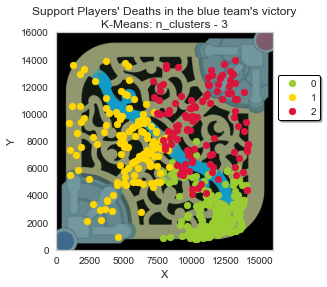

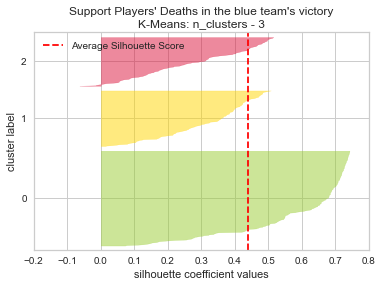

Silhouette score: 0.4392038426242399
0    223
1    131
2    115
Name: cluster, dtype: int64

Inertia: 416.3517194595653

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  11591.237668   2867.367713  -0.730942
1        1   5235.000000   7720.847328   0.274809
2        2  10554.730435   9297.504348   0.573913

In [696]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "crimson"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [697]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1379.724432   1456.328253   0.453469
1        1   1843.467571   2575.823928   0.605993
2        2   1938.319520   2567.009186   0.494507

In [698]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14044.0            7847.0            7970.0   
1        1            8328.0             943.0           13881.0   
2        2           14095.0            7105.0           13984.0   

   min coordinate_y  max timestamp  min timestamp  
0             810.0              1             -1  
1             969.0              1             -1  
2            4095.0              1              0

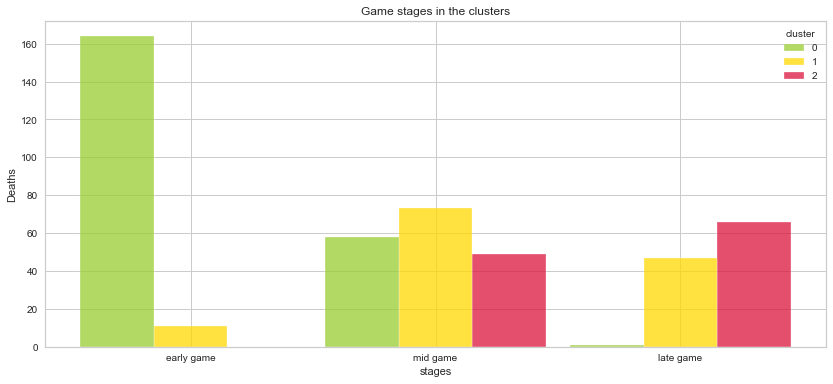

In [699]:
stagesPerClusterV2(blueSideVictory_df, colors)

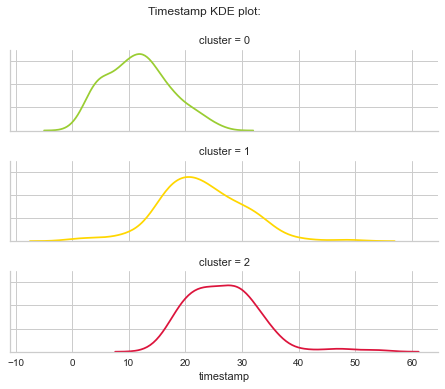

In [700]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [701]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Maokai             13
Seraphine          10
Swain               7
Annie               7
Velkoz              7
Sett                5
Lux                 5
Rakan               4
Twitch              4
Karma               3
Heimerdinger        3
Nautilus            3
Morgana             3
Thresh              2
Sona                2
Taric               2
Ivern               2
Nunu                2
Ashe                2
Blitzcrank          1
Zyra                1
Amumu               1
Shaco               1
Pyke                1
Bard                1
Syndra              1
Zilean              1
Nami                1
Yasuo               1
Alistar             1
Senna               1
Brand               1
Leona               1
TahmKench           1
Karthus             1

Deaths with each champion:

In [702]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Maokai          71
Seraphine       35
Annie           34
Velkoz          32
Twitch          26
Lux             24
Swain           23
Zyra            22
Morgana         16
Sett            15
Rakan           15
Nautilus        15
Karma           14
Ivern           13
Blitzcrank      13
Nunu            12
Taric           11
Heimerdinger     9
Thresh           9
Ashe             7
Zilean           6
Brand            6
Shaco            5
Syndra           5
Karthus          4
Pyke             4
Amumu            4
TahmKench        4
Bard             3
Yasuo            3
Sona             3
Leona            2
Senna            2
Alistar          1
Nami             1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [703]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 35 champions when they won on the red side

Cluster 0 - died with 31 champions:
 ['Amumu' 'Annie' 'Ashe' 'Blitzcrank' 'Brand' 'Heimerdinger' 'Ivern'
 'Karma' 'Karthus' 'Lux' 'Maokai' 'Morgana' 'Nami' 'Nautilus' 'Nunu'
 'Pyke' 'Rakan' 'Senna' 'Seraphine' 'Sett' 'Shaco' 'Sona' 'Swain' 'Syndra'
 'TahmKench' 'Taric' 'Thresh' 'Twitch' 'Velkoz' 'Zilean' 'Zyra']
Maokai          39
Velkoz          17
Twitch          16
Seraphine       13
Annie           13
Lux             12
Swain           11
Morgana          9
Rakan            9
Nautilus         7
Sett             6
Nunu             6
Thresh           6
Zyra             6
Taric            6
Blitzcrank       6
Karma            5
Heimerdinger     4
Ivern            4
Brand            4
Ashe             4
Zilean           4
Karthus          3
Syndra           2
TahmKench        2
Senna            2
Shaco            2
Amumu            2
Sona             1
Nami             1
Pyke             1
Name: champion, dtype: in

---
#### Clustering Blue Team Defeat

In [704]:
utility_deaths_df = df[(df["role"] == "UTILITY") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

blueSideDefeat_df = utility_deaths_df[(utility_deaths_df["team"] == "Blue") & (utility_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team       summoner region champion  timestamp  \
8354    EUW1_6275177790  Blue  anonymous 137   euw1    Taric   4.388133   
8374    EUW1_6275177790  Blue  anonymous 137   euw1    Taric  13.446700   
8378    EUW1_6275177790  Blue  anonymous 137   euw1    Taric  15.731717   
8382    EUW1_6275177790  Blue  anonymous 137   euw1    Taric  18.730383   
8386    EUW1_6275177790  Blue  anonymous 137   euw1    Taric  20.188783   
...                 ...   ...            ...    ...      ...        ...   
642636  EUW1_6289593927  Blue  anonymous 168   euw1     Nami  13.218083   
642638  EUW1_6289593927  Blue  anonymous 168   euw1     Nami  14.660700   
642649  EUW1_6289593927  Blue  anonymous 168   euw1     Nami  21.174450   
642659  EUW1_6289593927  Blue  anonymous 168   euw1     Nami  25.335867   
642661  EUW1_6289593927  Blue  anonymous 168   euw1     Nami  26.272883   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
8354         11782.0        2420.0    NaN            NaN  ...   
8374         13273.0        4495.0    NaN            NaN  ...   
8378         12089.0        1826.0    NaN            NaN  ...   
8382          8046.0        7441.0    NaN            NaN  ...   
8386          7468.0        7364.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
642636       11721.0        2941.0    NaN            NaN  ...   
642638        9773.0        1586.0    NaN            NaN  ...   
642649        5245.0        4886.0    NaN            NaN  ...   
642659        7790.0        5932.0    NaN            NaN  ...   
642661        1731.0        2762.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
8354                NaN    False      Death        NaN           NaN   NaN   
8374                NaN    False      Death        NaN           NaN   NaN   
8378                NaN    False      Death        NaN           NaN   NaN   
8382                NaN    False      Death        NaN           NaN   NaN   
8386                NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
642636              NaN    False      Death        NaN           NaN   NaN   
642638              NaN    False      Death        NaN           NaN   NaN   
642649              NaN    False      Death        NaN           NaN   NaN   
642659              NaN    False      Death        NaN           NaN   NaN   
642661              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName     role    rank  
8354        NaN       NaN  UTILITY  Silver  
8374        NaN       NaN  UTILITY  Silver  
8378        NaN       NaN  UTILITY  Silver  
8382        NaN       NaN  UTILITY  Silver  
8386        NaN       NaN  UTILITY  Silver  
...         ...       ...      ...     ...  
642636      NaN       NaN  UTILITY  Silver  
642638      NaN       NaN  UTILITY  Silver  
642649      NaN       NaN  UTILITY  Silver  
642659      NaN       NaN  UTILITY  Silver  
642661      NaN       NaN  UTILITY  Silver  

[646 rows x 56 columns]

In [705]:
profiling_df = utility_deaths_df[(utility_deaths_df["team"] == "Blue") & (utility_deaths_df["victory"] == False)].copy()

In [706]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 137 lost 3 matches on the blue side
anonymous 137 has an average of 8.0 deaths per game when losing on the blue side

anonymous 139 lost 17 matches on the blue side
anonymous 139 has an average of 7.117647058823529 deaths per game when losing on the blue side

anonymous 140 lost 1 matches on the blue side
anonymous 140 has an average of 7.0 deaths per game when losing on the blue side

anonymous 145 lost 7 matches on the blue side
anonymous 145 has an average of 12.0 deaths per game when losing on the blue side

anonymous 146 lost 16 matches on the blue side
anonymous 146 has an average of 5.5 deaths per game when losing on the blue side

anonymous 168 lost 23 matches on the blue side
anonymous 168 has an average of 6.565217391304348 deaths per game when losing on the blue side

anonymous 67 lost 9 matches on the blue side
anonymous 67 has an average of 6.777777777777778 deaths per game when losing on the blue side

anonymous 76 lost 20 matches on the blue side
anonymous 76 h

In [707]:
print("Defeat games on blue side contains {} matches in which the utility died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 96 matches in which the utility died at least once
8 players died a total of 646 times on the blue side
Defeat games on blue side contains an average of 6.729166666666667 deaths per game


In [708]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
8354         11782.0        2420.0   4.388133
8374         13273.0        4495.0  13.446700
8378         12089.0        1826.0  15.731717
8382          8046.0        7441.0  18.730383
8386          7468.0        7364.0  20.188783
...              ...           ...        ...
642636       11721.0        2941.0  13.218083
642638        9773.0        1586.0  14.660700
642649        5245.0        4886.0  21.174450
642659        7790.0        5932.0  25.335867
642661        1731.0        2762.0  26.272883

[646 rows x 3 columns]

Time discretization

In [709]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [710]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [711]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [712]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [713]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
8354        0.985854     -0.822459         -1
8374        1.407252     -0.102005         -1
8378        1.072620     -1.028700          0
8382       -0.070044      0.920867          0
8386       -0.233403      0.894132          0
...              ...           ...        ...
642636      0.968613     -0.641564         -1
642638      0.418054     -1.112029         -1
642649     -0.861685      0.033753          0
642659     -0.142397      0.396932          1
642661     -1.854839     -0.703714          1

[646 rows x 3 columns]

In [714]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4188472483346298
Silhouette score for k=3: 0.3999705142839599
Silhouette score for k=4: 0.38392185777247634
Silhouette score for k=5: 0.39676631761339004
Silhouette score for k=6: 0.3838667683661181
Silhouette score for k=7: 0.38125626455400363
Silhouette score for k=8: 0.38300610559673254
Silhouette score for k=9: 0.37464083941092113
Silhouette score for k=10: 0.36510188634796453
Silhouette score for k=11: 0.3650184432073857
Silhouette score for k=12: 0.37281260944768513
Silhouette score for k=13: 0.3735253848863657
Silhouette score for k=14: 0.37811040560783465
Silhouette score for k=15: 0.3795005875379451
Silhouette score for k=16: 0.3784959975801356
Silhouette score for k=17: 0.381912426215445
Silhouette score for k=18: 0.3686880351887807
Silhouette score for k=19: 0.391425318334924
Silhouette score for k=20: 0.3722462132914387
Silhouette score for k=25: 0.3735857832050984


K-Means with k = 3

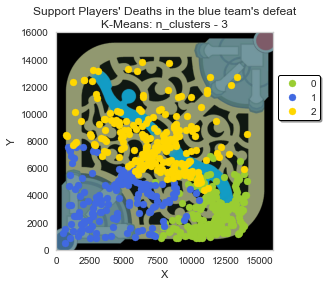

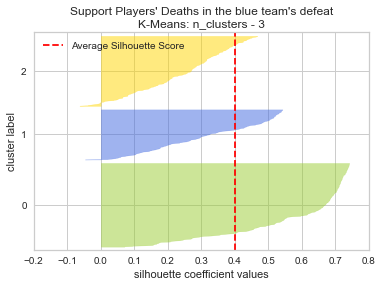

Silhouette score: 0.3999705142839599
0    265
2    222
1    159
Name: cluster, dtype: int64

Inertia: 662.4677876477132

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  11393.505660   2772.490566  -0.769811
1        1   4613.088050   3734.685535   0.591195
2        2   7229.977477   7950.590090   0.265766

In [715]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "royalblue", "gold"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [716]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1511.479538   1400.153693   0.447038
1        1   2456.212394   1689.908252   0.516566
2        2   2660.304950   2026.540584   0.634304

In [717]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14068.0            5992.0            6916.0   
1        1           10499.0             547.0            7569.0   
2        2           14093.0             770.0           13793.0   

   min coordinate_y  max timestamp  min timestamp  
0             852.0              1             -1  
1             492.0              1             -1  
2            4384.0              1             -1

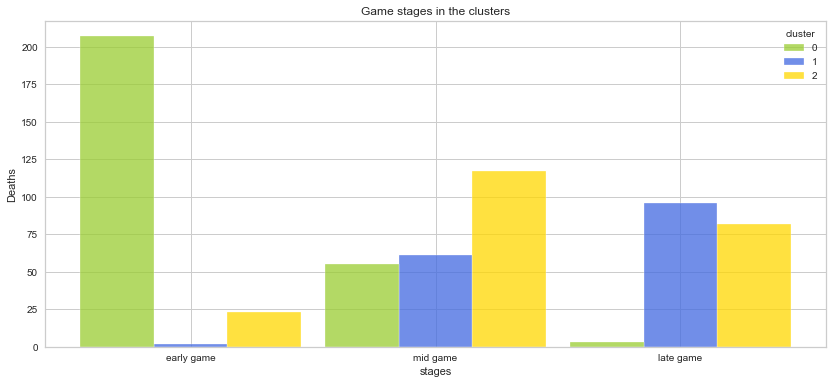

In [718]:
stagesPerClusterV2(blueSideDefeat_df, colors)

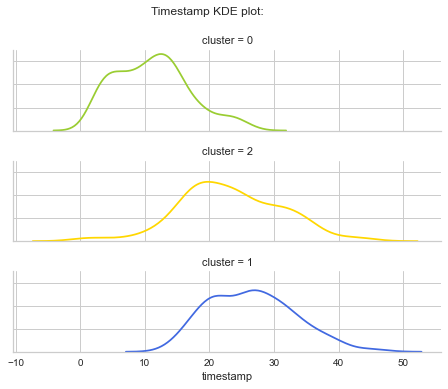

In [719]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [720]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Maokai             8
Seraphine          7
Taric              6
Nami               6
Twitch             5
Swain              5
Zilean             4
Ashe               4
Leona              4
Brand              3
Karma              3
Shaco              3
Sett               3
Nautilus           3
Lulu               2
Rakan              2
Karthus            2
Nunu               2
Velkoz             2
Amumu              2
Blitzcrank         2
Singed             1
Veigar             1
Renekton           1
Lux                1
Sona               1
LeeSin             1
Gragas             1
TahmKench          1
Gangplank          1
Soraka             1
Xerath             1
Annie              1
Senna              1
MissFortune        1
Galio              1
Neeko              1
Janna              1
Garen              1

Deaths with each champion:

In [721]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Maokai         61
Twitch         51
Seraphine      41
Nami           32
Taric          31
Swain          28
Zilean         27
Karthus        27
Shaco          25
Ashe           24
Karma          22
Sett           21
Nautilus       21
Leona          21
Brand          19
Amumu          15
Annie          15
LeeSin         14
Renekton       13
Blitzcrank     11
Galio          11
Lulu           11
Velkoz         11
Singed         10
Nunu           10
Rakan          10
Gragas          9
Xerath          7
Garen           6
MissFortune     6
Lux             5
Senna           5
Veigar          5
Gangplank       5
Neeko           5
Soraka          4
Janna           3
Sona            2
TahmKench       2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [722]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 39 champions when they won on the red side

Cluster 0 - died with 38 champions:
 ['Amumu' 'Annie' 'Ashe' 'Blitzcrank' 'Brand' 'Galio' 'Gangplank' 'Garen'
 'Gragas' 'Janna' 'Karma' 'Karthus' 'LeeSin' 'Leona' 'Lulu' 'Lux' 'Maokai'
 'MissFortune' 'Nami' 'Nautilus' 'Neeko' 'Nunu' 'Rakan' 'Renekton' 'Senna'
 'Seraphine' 'Sett' 'Shaco' 'Singed' 'Sona' 'Soraka' 'Swain' 'Taric'
 'Twitch' 'Veigar' 'Velkoz' 'Xerath' 'Zilean']
Maokai         27
Twitch         21
Seraphine      16
Nami           14
Leona          11
Nautilus       11
Brand          11
Karthus        11
Ashe           11
Taric          10
Karma          10
Shaco           9
Swain           9
Zilean          8
Sett            8
Galio           6
MissFortune     6
Velkoz          6
Renekton        5
LeeSin          5
Nunu            5
Annie           5
Blitzcrank      4
Lulu            4
Amumu           4
Senna           3
Soraka          3
Singed          3
Garen           3
Xerath          3
Gragas      

---
### Gold Players

#### Clustering Red Team Victory

In [723]:
utility_deaths_df = df[(df["role"] == "UTILITY") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

redSideVictory_df = utility_deaths_df[(utility_deaths_df["team"] == "Red") & (utility_deaths_df["victory"] == True)]
redSideVictory_df

gameId team      summoner region champion  timestamp  \
232778  EUW1_6282337181  Red  anonymous 49   euw1   Soraka   6.991600   
232783  EUW1_6282337181  Red  anonymous 49   euw1   Soraka   8.725117   
232796  EUW1_6282337181  Red  anonymous 49   euw1   Soraka  16.758983   
232808  EUW1_6282337181  Red  anonymous 49   euw1   Soraka  21.202750   
232819  EUW1_6282337181  Red  anonymous 49   euw1   Soraka  27.033200   
...                 ...  ...           ...    ...      ...        ...   
628529  EUW1_6289477797  Red  anonymous 59   euw1  Karthus  26.617167   
628549  EUW1_6289401702  Red  anonymous 59   euw1     Ashe   8.335367   
628577  EUW1_6289401702  Red  anonymous 59   euw1     Ashe  22.085283   
628583  EUW1_6289401702  Red  anonymous 59   euw1     Ashe  23.979017   
628588  EUW1_6289401702  Red  anonymous 59   euw1     Ashe  25.508500   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
232778       11544.0        3898.0    NaN            NaN  ...   
232783       13615.0        1695.0    NaN            NaN  ...   
232796       13794.0        7770.0    NaN            NaN  ...   
232808        9716.0       10303.0    NaN            NaN  ...   
232819       11121.0       11062.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
628529        5294.0        2495.0    NaN            NaN  ...   
628549       13120.0        1124.0    NaN            NaN  ...   
628577        5036.0        9547.0    NaN            NaN  ...   
628583        5404.0        5923.0    NaN            NaN  ...   
628588        4895.0        3725.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
232778              NaN     True      Death        NaN           NaN   NaN   
232783              NaN     True      Death        NaN           NaN   NaN   
232796              NaN     True      Death        NaN           NaN   NaN   
232808              NaN     True      Death        NaN           NaN   NaN   
232819              NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
628529              NaN     True      Death        NaN           NaN   NaN   
628549              NaN     True      Death        NaN           NaN   NaN   
628577              NaN     True      Death        NaN           NaN   NaN   
628583              NaN     True      Death        NaN           NaN   NaN   
628588              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName     role  rank  
232778      NaN       NaN  UTILITY  Gold  
232783      NaN       NaN  UTILITY  Gold  
232796      NaN       NaN  UTILITY  Gold  
232808      NaN       NaN  UTILITY  Gold  
232819      NaN       NaN  UTILITY  Gold  
...         ...       ...      ...   ...  
628529      NaN       NaN  UTILITY  Gold  
628549      NaN       NaN  UTILITY  Gold  
628577      NaN       NaN  UTILITY  Gold  
628583      NaN       NaN  UTILITY  Gold  
628588      NaN       NaN  UTILITY  Gold  

[661 rows x 56 columns]

In [724]:
profiling_df = utility_deaths_df[(utility_deaths_df["team"] == "Red") & (utility_deaths_df["victory"] == True)].copy()

In [725]:
redSideGames_df = utility_deaths_df[utility_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [726]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

114

In [727]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

49.56521739130435

In [728]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_utility_deaths_df.shape[0]) * 100
winRateRedSide

10.252830774003414

In [729]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 49 won 8 matches on the red side
anonymous 49 has an average of 3.75 deaths per game when winning on the red side

anonymous 50 won 21 matches on the red side
anonymous 50 has an average of 4.714285714285714 deaths per game when winning on the red side

anonymous 51 won 30 matches on the red side
anonymous 51 has an average of 7.133333333333334 deaths per game when winning on the red side

anonymous 53 won 28 matches on the red side
anonymous 53 has an average of 4.964285714285714 deaths per game when winning on the red side

anonymous 56 won 9 matches on the red side
anonymous 56 has an average of 5.777777777777778 deaths per game when winning on the red side

anonymous 59 won 18 matches on the red side
anonymous 59 has an average of 7.055555555555555 deaths per game when winning on the red side



In [730]:
print("Victory games on red side contains {} matches in which the utility died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 114 matches in which the utility died at least once
6 players died a total of 661 times on the red side
Victory games on red side contains an average of 5.798245614035087 deaths per game


In [731]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
232778       11544.0        3898.0   6.991600
232783       13615.0        1695.0   8.725117
232796       13794.0        7770.0  16.758983
232808        9716.0       10303.0  21.202750
232819       11121.0       11062.0  27.033200
...              ...           ...        ...
628529        5294.0        2495.0  26.617167
628549       13120.0        1124.0   8.335367
628577        5036.0        9547.0  22.085283
628583        5404.0        5923.0  23.979017
628588        4895.0        3725.0  25.508500

[661 rows x 3 columns]

Time discretization

In [732]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [733]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [734]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [735]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [736]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
232778      0.654794     -0.499342         -1
232783      1.248846     -1.241576         -1
232796      1.300190      0.805211          0
232808      0.130445      1.658629          0
232819      0.533459      1.914351          1
...              ...           ...        ...
628529     -1.137974     -0.972040          1
628549      1.106858     -1.433957         -1
628577     -1.211980      1.403917          0
628583     -1.106422      0.182920          0
628588     -1.252425     -0.557629          1

[661 rows x 3 columns]

In [737]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4361958323014451
Silhouette score for k=3: 0.4085411885184885
Silhouette score for k=4: 0.3692684637181008
Silhouette score for k=5: 0.36291111107607193
Silhouette score for k=6: 0.36608568792040874
Silhouette score for k=7: 0.3663555146002388
Silhouette score for k=8: 0.37150566374624017
Silhouette score for k=9: 0.3406367722455945
Silhouette score for k=10: 0.3345877940592832
Silhouette score for k=11: 0.3417051981443521
Silhouette score for k=12: 0.3562507109148476
Silhouette score for k=13: 0.36000607666731665
Silhouette score for k=14: 0.3621207957275866
Silhouette score for k=15: 0.37333493935711654
Silhouette score for k=16: 0.37149988026965247
Silhouette score for k=17: 0.37735762280905444
Silhouette score for k=18: 0.37819654994884294
Silhouette score for k=19: 0.3704030094626409
Silhouette score for k=20: 0.37038842484253703
Silhouette score for k=25: 0.4043608510702296


K-Means with k = 4

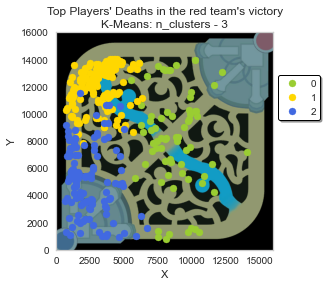

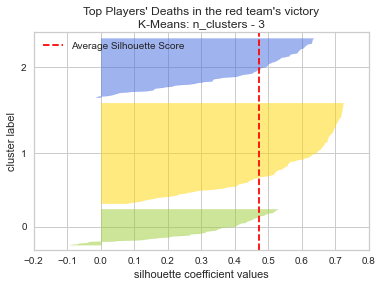

Silhouette score: 0.4720163027243763
1    195
2    115
0     70
Name: cluster, dtype: int64

Inertia: 352.87227458544737

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   8700.242857   8108.885714   0.214286
1        1   3179.984615  12241.374359  -0.656410
2        2   2458.304348   5193.086957   0.556522

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

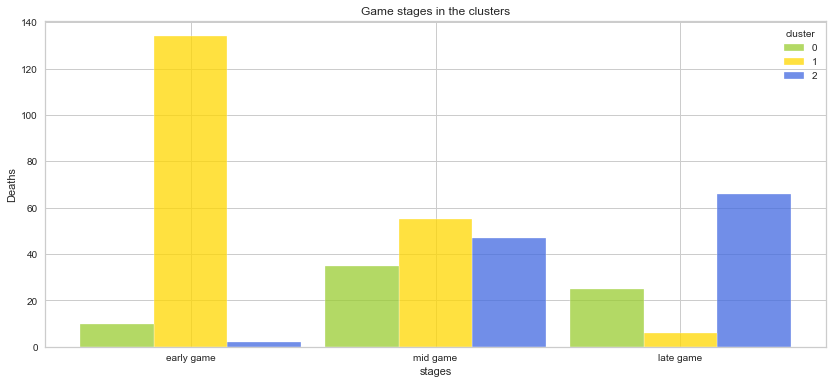

In [ ]:
stagesPerClusterV2(redSideVictory_df, colors)

K-Means with k = 3

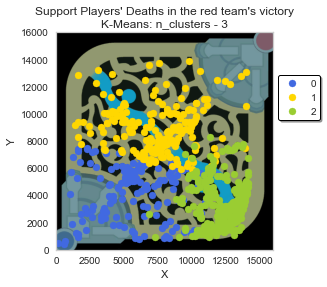

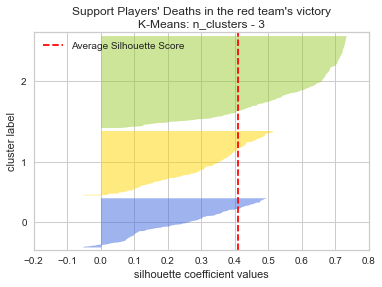

Silhouette score: 0.4085411885184885
2    296
1    207
0    158
Name: cluster, dtype: int64

Inertia: 656.5203163225132

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   5986.500000   4304.234177   0.620253
1        1   7520.280193   8924.676329   0.265700
2        2  12226.736486   3475.527027  -0.746622

In [738]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "gold", "yellowgreen"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [739]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2778.901756   1870.334991   0.534951
1        1   2556.100298   1746.737554   0.599462
2        2   1345.924563   1624.760439   0.442645

In [740]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           11756.0             138.0            7503.0   
1        1           13995.0            1413.0           13884.0   
2        2           14140.0            6867.0            8293.0   

   min coordinate_y  max timestamp  min timestamp  
0             396.0              1             -1  
1            5944.0              1             -1  
2             913.0              1             -1

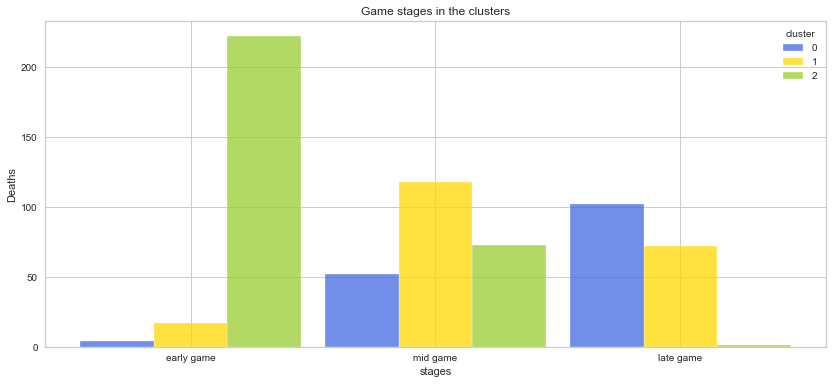

In [741]:
stagesPerClusterV2(redSideVictory_df, colors)

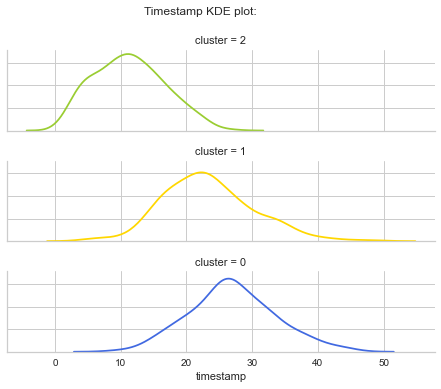

In [742]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [743]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Morgana           23
Rakan             16
Lux               16
Ashe               8
Nami               7
Karthus            6
Leona              6
Lulu               6
Nautilus           5
Velkoz             4
Soraka             4
Alistar            3
Pantheon           3
Renata             1
Karma              1
Swain              1
Zac                1
Janna              1
MissFortune        1
Gragas             1

Deaths with each champion:

In [744]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Morgana        164
Lux             88
Rakan           58
Karthus         57
Leona           45
Ashe            44
Lulu            34
Pantheon        31
Nami            27
Soraka          25
Nautilus        24
Velkoz          21
Alistar         10
Gragas          10
Swain            9
MissFortune      4
Karma            3
Renata           3
Janna            2
Zac              2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [745]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 20 champions when they won on the red side

Cluster 0 - died with 16 champions:
 ['Alistar' 'Ashe' 'Gragas' 'Karma' 'Karthus' 'Leona' 'Lulu' 'Lux'
 'MissFortune' 'Morgana' 'Nami' 'Nautilus' 'Pantheon' 'Rakan' 'Soraka'
 'Velkoz']
Morgana        52
Lux            16
Rakan          14
Karthus        14
Pantheon       13
Leona           8
Soraka          7
Ashe            7
Alistar         7
Velkoz          6
Nautilus        5
Lulu            4
Nami            2
Karma           1
Gragas          1
MissFortune     1
Name: champion, dtype: int64

Cluster 1 - died with 19 champions:
 ['Alistar' 'Ashe' 'Gragas' 'Janna' 'Karma' 'Karthus' 'Leona' 'Lulu' 'Lux'
 'MissFortune' 'Morgana' 'Nami' 'Nautilus' 'Pantheon' 'Rakan' 'Renata'
 'Soraka' 'Swain' 'Velkoz']
Morgana        41
Lux            25
Karthus        17
Rakan          17
Leona          17
Ashe           15
Lulu           13
Soraka         12
Pantheon       10
Nami           10
Nautilus        8
Velkoz          6

---
#### Clustering Red Team Defeat

In [746]:
utility_deaths_df = df[(df["role"] == "UTILITY") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

redSideDefeat_df = utility_deaths_df[(utility_deaths_df["team"] == "Red") & (utility_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team      summoner region champion  timestamp  \
232892  EUW1_6282068292  Red  anonymous 49   euw1   Soraka  12.814733   
232896  EUW1_6282068292  Red  anonymous 49   euw1   Soraka  15.139883   
232898  EUW1_6282068292  Red  anonymous 49   euw1   Soraka  16.892100   
232913  EUW1_6282068292  Red  anonymous 49   euw1   Soraka  21.542300   
232916  EUW1_6282068292  Red  anonymous 49   euw1   Soraka  22.615767   
...                 ...  ...           ...    ...      ...        ...   
627145  EUW1_6289798808  Red  anonymous 53   euw1      Lux   2.664333   
627152  EUW1_6289798808  Red  anonymous 53   euw1      Lux   6.056067   
627159  EUW1_6289798808  Red  anonymous 53   euw1      Lux   8.661783   
627162  EUW1_6289798808  Red  anonymous 53   euw1      Lux  10.574650   
627174  EUW1_6289798808  Red  anonymous 53   euw1      Lux  17.848550   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
232892       11575.0        6875.0    NaN            NaN  ...   
232896       13817.0        4059.0    NaN            NaN  ...   
232898        4309.0       13233.0    NaN            NaN  ...   
232913        9647.0        9807.0    NaN            NaN  ...   
232916        9328.0       11443.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
627145       13428.0        3890.0    NaN            NaN  ...   
627152       14101.0        4685.0    NaN            NaN  ...   
627159       10191.0        8271.0    NaN            NaN  ...   
627162       12992.0        3008.0    NaN            NaN  ...   
627174       12131.0        7306.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
232892              NaN    False      Death        NaN           NaN   NaN   
232896              NaN    False      Death        NaN           NaN   NaN   
232898              NaN    False      Death        NaN           NaN   NaN   
232913              NaN    False      Death        NaN           NaN   NaN   
232916              NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
627145              NaN    False      Death        NaN           NaN   NaN   
627152              NaN    False      Death        NaN           NaN   NaN   
627159              NaN    False      Death        NaN           NaN   NaN   
627162              NaN    False      Death        NaN           NaN   NaN   
627174              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName     role  rank  
232892      NaN       NaN  UTILITY  Gold  
232896      NaN       NaN  UTILITY  Gold  
232898      NaN       NaN  UTILITY  Gold  
232913      NaN       NaN  UTILITY  Gold  
232916      NaN       NaN  UTILITY  Gold  
...         ...       ...      ...   ...  
627145      NaN       NaN  UTILITY  Gold  
627152      NaN       NaN  UTILITY  Gold  
627159      NaN       NaN  UTILITY  Gold  
627162      NaN       NaN  UTILITY  Gold  
627174      NaN       NaN  UTILITY  Gold  

[912 rows x 56 columns]

In [747]:
profiling_df = utility_deaths_df[(utility_deaths_df["team"] == "Red") & (utility_deaths_df["victory"] == False)].copy()

In [748]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 49 lost 9 matches on the red side
anonymous 49 has an average of 5.555555555555555 deaths per game when losing on the red side

anonymous 50 lost 26 matches on the red side
anonymous 50 has an average of 6.576923076923077 deaths per game when losing on the red side

anonymous 51 lost 30 matches on the red side
anonymous 51 has an average of 9.133333333333333 deaths per game when losing on the red side

anonymous 53 lost 26 matches on the red side
anonymous 53 has an average of 7.615384615384615 deaths per game when losing on the red side

anonymous 56 lost 10 matches on the red side
anonymous 56 has an average of 7.9 deaths per game when losing on the red side

anonymous 59 lost 15 matches on the red side
anonymous 59 has an average of 9.333333333333334 deaths per game when losing on the red side



In [749]:
print("Defeat games on red side contains {} matches in which the utility died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 116 matches in which the utility died at least once
6 players died a total of 912 times on the red side
Defeat games on red side contains an average of 7.862068965517241 deaths per game


In [750]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
232892       11575.0        6875.0  12.814733
232896       13817.0        4059.0  15.139883
232898        4309.0       13233.0  16.892100
232913        9647.0        9807.0  21.542300
232916        9328.0       11443.0  22.615767
...              ...           ...        ...
627145       13428.0        3890.0   2.664333
627152       14101.0        4685.0   6.056067
627159       10191.0        8271.0   8.661783
627162       12992.0        3008.0  10.574650
627174       12131.0        7306.0  17.848550

[912 rows x 3 columns]

Time discretization

In [751]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [752]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [753]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [754]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [755]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
232892      0.438174     -0.006558         -1
232896      1.214234     -0.832878          0
232898     -2.076925      1.859116          0
232913     -0.229196      0.853800          0
232916     -0.339617      1.333863          0
...              ...           ...        ...
627145      1.079583     -0.882469         -1
627152      1.312540     -0.649186         -1
627159     -0.040892      0.403080         -1
627162      0.928663     -1.141280         -1
627174      0.630631      0.119913          0

[912 rows x 3 columns]

In [756]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.43161263858979315
Silhouette score for k=3: 0.41699600387609603
Silhouette score for k=4: 0.3800786318594956
Silhouette score for k=5: 0.36929723795604685
Silhouette score for k=6: 0.34610320124768645
Silhouette score for k=7: 0.3570280775828114
Silhouette score for k=8: 0.31744701876061515
Silhouette score for k=9: 0.3315278181469718
Silhouette score for k=10: 0.3273929893214893
Silhouette score for k=11: 0.36304659135452294
Silhouette score for k=12: 0.3625573511613861
Silhouette score for k=13: 0.38132235144479926
Silhouette score for k=14: 0.38435315069554865
Silhouette score for k=15: 0.37959268012809066
Silhouette score for k=16: 0.3930804656537039
Silhouette score for k=17: 0.38547296904525125
Silhouette score for k=18: 0.3960653506982176
Silhouette score for k=19: 0.38717379324086787
Silhouette score for k=20: 0.38733070574723033
Silhouette score for k=25: 0.41181051638622546


K-Means with k = 3

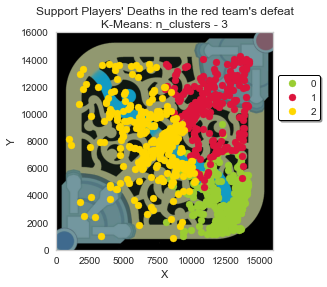

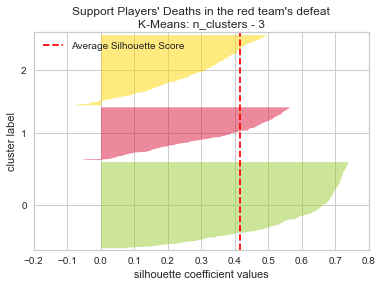

Silhouette score: 0.41699600387609603
0    376
2    306
1    230
Name: cluster, dtype: int64

Inertia: 872.1496371004504

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  12313.821809   3846.542553  -0.773936
1        1  11469.447826  10339.426087   0.591304
2        2   6973.732026   8058.872549   0.300654

In [757]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "crimson", "gold"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [758]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1311.276345   1578.104798   0.436940
1        1   1585.259585   2242.506990   0.500359
2        2   1948.808916   2466.236927   0.616600

In [759]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14115.0            8083.0            9243.0   
1        1           14218.0            8004.0           14245.0   
2        2           10243.0             994.0           13683.0   

   min coordinate_y  max timestamp  min timestamp  
0            1018.0              1             -1  
1            4590.0              1             -1  
2             870.0              1             -1

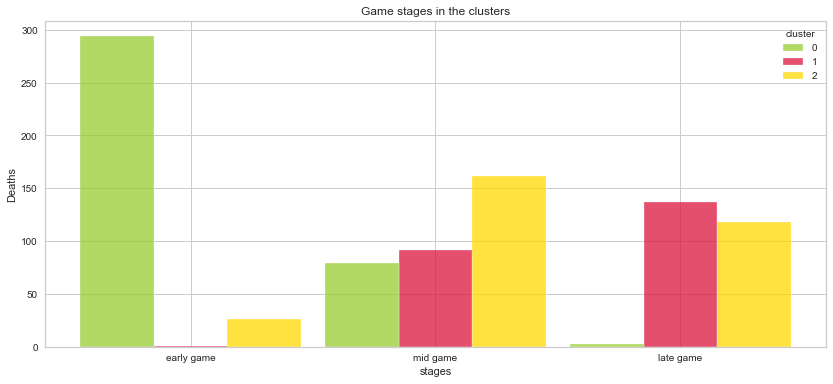

In [760]:
stagesPerClusterV2(redSideDefeat_df, colors)

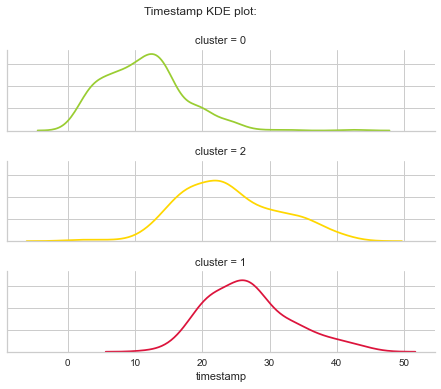

In [761]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [762]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Morgana           29
Rakan             19
Lux               15
Leona              8
Lulu               5
Soraka             5
Ashe               5
Nautilus           5
Nami               5
MissFortune        4
Karthus            4
Karma              2
Alistar            2
Senna              1
Thresh             1
Seraphine          1
Janna              1
Zac                1
Velkoz             1
Renata             1
Gragas             1

Deaths with each champion:

In [763]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Morgana        257
Lux            121
Rakan          113
Leona           64
Karthus         59
Ashe            47
Lulu            37
Nami            34
MissFortune     30
Soraka          30
Nautilus        29
Velkoz          13
Zac             11
Alistar         11
Thresh          10
Seraphine       10
Karma            8
Gragas           8
Renata           8
Senna            7
Janna            5
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [764]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 21 champions when they won on the red side

Cluster 0 - died with 21 champions:
 ['Alistar' 'Ashe' 'Gragas' 'Janna' 'Karma' 'Karthus' 'Leona' 'Lulu' 'Lux'
 'MissFortune' 'Morgana' 'Nami' 'Nautilus' 'Rakan' 'Renata' 'Senna'
 'Seraphine' 'Soraka' 'Thresh' 'Velkoz' 'Zac']
Morgana        106
Lux             57
Rakan           43
Karthus         27
Leona           24
Nami            16
Ashe            16
Soraka          14
Nautilus        13
Lulu            12
MissFortune     10
Alistar          8
Velkoz           7
Thresh           5
Karma            4
Senna            4
Seraphine        4
Zac              2
Janna            2
Gragas           1
Renata           1
Name: champion, dtype: int64

Cluster 1 - died with 20 champions:
 ['Ashe' 'Gragas' 'Janna' 'Karma' 'Karthus' 'Leona' 'Lulu' 'Lux'
 'MissFortune' 'Morgana' 'Nami' 'Nautilus' 'Rakan' 'Renata' 'Senna'
 'Seraphine' 'Soraka' 'Thresh' 'Velkoz' 'Zac']
Morgana        62
Lux            30
Rakan          28
Leo

---
#### Clustering Blue Team Victory

In [765]:
utility_deaths_df = df[(df["role"] == "UTILITY") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

blueSideVictory_df = utility_deaths_df[(utility_deaths_df["team"] == "Blue") & (utility_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team      summoner region champion  timestamp  \
232950  EUW1_6281988484  Blue  anonymous 49   euw1     Nami   2.930500   
232956  EUW1_6281988484  Blue  anonymous 49   euw1     Nami   5.313217   
232959  EUW1_6281988484  Blue  anonymous 49   euw1     Nami   6.875467   
232971  EUW1_6281988484  Blue  anonymous 49   euw1     Nami  12.407700   
232978  EUW1_6281988484  Blue  anonymous 49   euw1     Nami  16.810467   
...                 ...   ...           ...    ...      ...        ...   
585751  EUW1_6287703662  Blue  anonymous 59   euw1  Karthus  33.356767   
626921  EUW1_6289901453  Blue  anonymous 53   euw1   Soraka   3.208633   
626925  EUW1_6289901453  Blue  anonymous 53   euw1   Soraka   5.683117   
626957  EUW1_6289901453  Blue  anonymous 53   euw1   Soraka  16.255017   
627353  EUW1_6289267915  Blue  anonymous 53   euw1      Lux   4.097283   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
232950       11455.0        1767.0    NaN            NaN  ...   
232956       12193.0        1624.0    NaN            NaN  ...   
232959       11644.0        1074.0    NaN            NaN  ...   
232971       10493.0        2541.0    NaN            NaN  ...   
232978        5244.0        5618.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
585751        8173.0       13780.0    NaN            NaN  ...   
626921       11189.0        1522.0    NaN            NaN  ...   
626925       11522.0        1589.0    NaN            NaN  ...   
626957       10476.0        9732.0    NaN            NaN  ...   
627353       13201.0        3206.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
232950              NaN     True      Death        NaN           NaN   NaN   
232956              NaN     True      Death        NaN           NaN   NaN   
232959              NaN     True      Death        NaN           NaN   NaN   
232971              NaN     True      Death        NaN           NaN   NaN   
232978              NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
585751              NaN     True      Death        NaN           NaN   NaN   
626921              NaN     True      Death        NaN           NaN   NaN   
626925              NaN     True      Death        NaN           NaN   NaN   
626957              NaN     True      Death        NaN           NaN   NaN   
627353              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName     role  rank  
232950      NaN       NaN  UTILITY  Gold  
232956      NaN       NaN  UTILITY  Gold  
232959      NaN       NaN  UTILITY  Gold  
232971      NaN       NaN  UTILITY  Gold  
232978      NaN       NaN  UTILITY  Gold  
...         ...       ...      ...   ...  
585751      NaN       NaN  UTILITY  Gold  
626921      NaN       NaN  UTILITY  Gold  
626925      NaN       NaN  UTILITY  Gold  
626957      NaN       NaN  UTILITY  Gold  
627353      NaN       NaN  UTILITY  Gold  

[578 rows x 56 columns]

In [766]:
profiling_df = utility_deaths_df[(utility_deaths_df["team"] == "Blue") & (utility_deaths_df["victory"] == True)].copy()

In [767]:
blueSideGames_df = utility_deaths_df[utility_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [768]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

98

In [769]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

51.041666666666664

In [770]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_utility_deaths_df.shape[0]) * 100
winRateBlueSide

9.607712765957446

In [771]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 49 won 5 matches on the blue side
anonymous 49 has an average of 4.4 deaths per game when winning on the blue side

anonymous 50 won 17 matches on the blue side
anonymous 50 has an average of 5.176470588235294 deaths per game when winning on the blue side

anonymous 51 won 32 matches on the blue side
anonymous 51 has an average of 6.59375 deaths per game when winning on the blue side

anonymous 53 won 20 matches on the blue side
anonymous 53 has an average of 4.8 deaths per game when winning on the blue side

anonymous 56 won 6 matches on the blue side
anonymous 56 has an average of 5.166666666666667 deaths per game when winning on the blue side

anonymous 59 won 18 matches on the blue side
anonymous 59 has an average of 7.222222222222222 deaths per game when winning on the blue side



In [772]:
print("Victory games on blue side contains {} matches in which the utility died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 98 matches in which the utility died at least once
6 players died a total of 578 times on the blue side
Victory games on blue side contains an average of 5.8979591836734695 deaths per game


In [773]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
232950       11455.0        1767.0   2.930500
232956       12193.0        1624.0   5.313217
232959       11644.0        1074.0   6.875467
232971       10493.0        2541.0  12.407700
232978        5244.0        5618.0  16.810467
...              ...           ...        ...
585751        8173.0       13780.0  33.356767
626921       11189.0        1522.0   3.208633
626925       11522.0        1589.0   5.683117
626957       10476.0        9732.0  16.255017
627353       13201.0        3206.0   4.097283

[578 rows x 3 columns]

Time discretization

In [774]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [775]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [776]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [777]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [778]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
232950      0.531409     -1.169394         -1
232956      0.798652     -1.209204         -1
232959      0.599849     -1.362320         -1
232971      0.183050     -0.953917         -1
232978     -1.717713     -0.097300          0
...              ...           ...        ...
585751     -0.657066      2.174950          1
626921      0.435085     -1.237600         -1
626925      0.555670     -1.218948         -1
626957      0.176894      1.048012          0
627353      1.163668     -0.768785         -1

[578 rows x 3 columns]

In [779]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.44810576355996606
Silhouette score for k=3: 0.4217460771542214
Silhouette score for k=4: 0.37492198106741226
Silhouette score for k=5: 0.3674409130852871
Silhouette score for k=6: 0.3633864440939276
Silhouette score for k=7: 0.3077104317281693
Silhouette score for k=8: 0.320203472174642
Silhouette score for k=9: 0.32441388119901843
Silhouette score for k=10: 0.3277187404572359
Silhouette score for k=11: 0.339330313732088
Silhouette score for k=12: 0.3761684985796422
Silhouette score for k=13: 0.3829620335103499
Silhouette score for k=14: 0.3942937022406082
Silhouette score for k=15: 0.3951511242145062
Silhouette score for k=16: 0.40319147819750556
Silhouette score for k=17: 0.3994141980274967
Silhouette score for k=18: 0.3989660291294571
Silhouette score for k=19: 0.39723302570940505
Silhouette score for k=20: 0.39733229399603215
Silhouette score for k=25: 0.40958839184361834


K-Means with k = 3

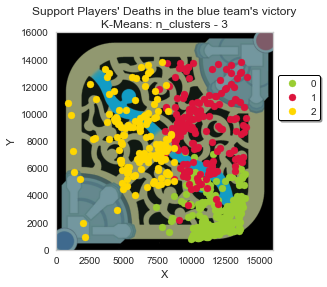

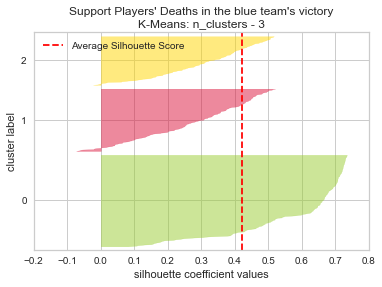

Silhouette score: 0.4217460771542214
0    261
1    178
2    139
Name: cluster, dtype: int64

Inertia: 526.5834098252185

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  11645.275862   2798.168582  -0.808429
1        1  10653.196629   8938.286517   0.528090
2        2   6022.237410   8114.244604   0.107914

In [780]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "crimson", "gold"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [781]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1373.271676   1475.459856   0.393537
1        1   1669.955840   2575.615666   0.499210
2        2   1774.142389   2509.798054   0.607988

In [782]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           13945.0            7366.0            7181.0   
1        1           14091.0            7619.0           13820.0   
2        2            8717.0             899.0           13811.0   

   min coordinate_y  max timestamp  min timestamp  
0             804.0              0             -1  
1            2220.0              1              0  
2             975.0              1             -1

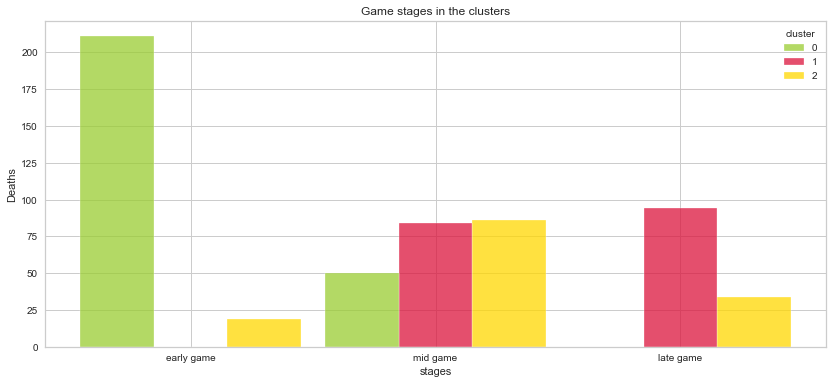

In [783]:
stagesPerClusterV2(blueSideVictory_df, colors)

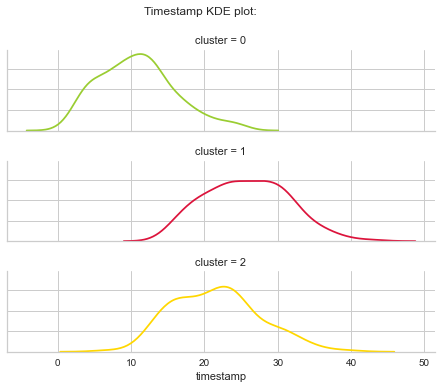

In [784]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [785]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Morgana           27
Lux               12
Karthus            9
Rakan              9
Leona              7
Lulu               4
Ashe               4
Nami               4
Soraka             3
Velkoz             3
MissFortune        2
Swain              1
Senna              1
Seraphine          1
Maokai             1
Nautilus           1
Pantheon           1
Thresh             1
Zac                1
Alistar            1
Sona               1
Renata             1
Gragas             1
Xerath             1
Amumu              1

Deaths with each champion:

In [786]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Morgana        182
Karthus         84
Lux             65
Rakan           41
Leona           36
Lulu            21
Nami            19
Ashe            17
Velkoz          13
Soraka          12
Thresh          11
Pantheon        10
Amumu            9
MissFortune      9
Alistar          8
Swain            7
Renata           6
Nautilus         5
Zac              5
Maokai           4
Gragas           3
Sona             3
Senna            3
Xerath           3
Seraphine        2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [787]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 25 champions when they won on the red side

Cluster 0 - died with 25 champions:
 ['Alistar' 'Amumu' 'Ashe' 'Gragas' 'Karthus' 'Leona' 'Lulu' 'Lux' 'Maokai'
 'MissFortune' 'Morgana' 'Nami' 'Nautilus' 'Pantheon' 'Rakan' 'Renata'
 'Senna' 'Seraphine' 'Sona' 'Soraka' 'Swain' 'Thresh' 'Velkoz' 'Xerath'
 'Zac']
Morgana        71
Karthus        42
Lux            32
Rakan          15
Lulu           14
Ashe           11
Leona          11
Nami           10
Velkoz          9
Pantheon        6
Amumu           5
Soraka          5
Zac             4
MissFortune     4
Maokai          3
Sona            3
Swain           3
Thresh          3
Gragas          2
Nautilus        2
Xerath          2
Renata          1
Seraphine       1
Senna           1
Alistar         1
Name: champion, dtype: int64

Cluster 1 - died with 23 champions:
 ['Alistar' 'Amumu' 'Ashe' 'Gragas' 'Karthus' 'Leona' 'Lulu' 'Lux'
 'MissFortune' 'Morgana' 'Nami' 'Nautilus' 'Pantheon' 'Rakan' 'Renata'
 'Senna' 'S

---
#### Clustering Blue Team Defeat

In [788]:
utility_deaths_df = df[(df["role"] == "UTILITY") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

blueSideDefeat_df = utility_deaths_df[(utility_deaths_df["team"] == "Blue") & (utility_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team      summoner region      champion  timestamp  \
233087  EUW1_6280523128  Blue  anonymous 49   euw1  Heimerdinger   7.907733   
233093  EUW1_6280523128  Blue  anonymous 49   euw1  Heimerdinger  10.387783   
233106  EUW1_6280523128  Blue  anonymous 49   euw1  Heimerdinger  18.263217   
233120  EUW1_6280523128  Blue  anonymous 49   euw1  Heimerdinger  24.080767   
233129  EUW1_6280523128  Blue  anonymous 49   euw1  Heimerdinger  29.879317   
...                 ...   ...           ...    ...           ...        ...   
627225  EUW1_6289390166  Blue  anonymous 53   euw1          Sona  19.248817   
627228  EUW1_6289390166  Blue  anonymous 53   euw1          Sona  20.755283   
627235  EUW1_6289390166  Blue  anonymous 53   euw1          Sona  24.498317   
627264  EUW1_6289390166  Blue  anonymous 53   euw1          Sona  34.176917   
627267  EUW1_6289390166  Blue  anonymous 53   euw1          Sona  36.204783   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
233087       11050.0        1215.0    NaN            NaN  ...   
233093        9982.0        1106.0    NaN            NaN  ...   
233106        5535.0        5779.0    NaN            NaN  ...   
233120        8040.0        7462.0    NaN            NaN  ...   
233129        5582.0        8615.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
627225        3487.0        9134.0    NaN            NaN  ...   
627228        8237.0        5398.0    NaN            NaN  ...   
627235        2712.0        5761.0    NaN            NaN  ...   
627264        9914.0        5382.0    NaN            NaN  ...   
627267        6002.0        5930.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
233087              NaN    False      Death        NaN           NaN   NaN   
233093              NaN    False      Death        NaN           NaN   NaN   
233106              NaN    False      Death        NaN           NaN   NaN   
233120              NaN    False      Death        NaN           NaN   NaN   
233129              NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
627225              NaN    False      Death        NaN           NaN   NaN   
627228              NaN    False      Death        NaN           NaN   NaN   
627235              NaN    False      Death        NaN           NaN   NaN   
627264              NaN    False      Death        NaN           NaN   NaN   
627267              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName     role  rank  
233087      NaN       NaN  UTILITY  Gold  
233093      NaN       NaN  UTILITY  Gold  
233106      NaN       NaN  UTILITY  Gold  
233120      NaN       NaN  UTILITY  Gold  
233129      NaN       NaN  UTILITY  Gold  
...         ...       ...      ...   ...  
627225      NaN       NaN  UTILITY  Gold  
627228      NaN       NaN  UTILITY  Gold  
627235      NaN       NaN  UTILITY  Gold  
627264      NaN       NaN  UTILITY  Gold  
627267      NaN       NaN  UTILITY  Gold  

[740 rows x 56 columns]

In [789]:
profiling_df = utility_deaths_df[(utility_deaths_df["team"] == "Blue") & (utility_deaths_df["victory"] == False)].copy()

In [790]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 49 lost 6 matches on the blue side
anonymous 49 has an average of 5.0 deaths per game when losing on the blue side

anonymous 50 lost 16 matches on the blue side
anonymous 50 has an average of 4.9375 deaths per game when losing on the blue side

anonymous 51 lost 24 matches on the blue side
anonymous 51 has an average of 9.875 deaths per game when losing on the blue side

anonymous 53 lost 21 matches on the blue side
anonymous 53 has an average of 8.142857142857142 deaths per game when losing on the blue side

anonymous 56 lost 12 matches on the blue side
anonymous 56 has an average of 6.583333333333333 deaths per game when losing on the blue side

anonymous 59 lost 15 matches on the blue side
anonymous 59 has an average of 9.6 deaths per game when losing on the blue side



In [791]:
print("Defeat games on blue side contains {} matches in which the utility died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 94 matches in which the utility died at least once
6 players died a total of 740 times on the blue side
Defeat games on blue side contains an average of 7.872340425531915 deaths per game


In [792]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
233087       11050.0        1215.0   7.907733
233093        9982.0        1106.0  10.387783
233106        5535.0        5779.0  18.263217
233120        8040.0        7462.0  24.080767
233129        5582.0        8615.0  29.879317
...              ...           ...        ...
627225        3487.0        9134.0  19.248817
627228        8237.0        5398.0  20.755283
627235        2712.0        5761.0  24.498317
627264        9914.0        5382.0  34.176917
627267        6002.0        5930.0  36.204783

[740 rows x 3 columns]

Time discretization

In [793]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [794]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [795]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [796]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [797]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
233087      0.790132     -1.179735         -1
233093      0.493520     -1.219132         -1
233106     -0.741529      0.469912          0
233120     -0.045824      1.078228          0
233129     -0.728476      1.494977          1
...              ...           ...        ...
627225     -1.310313      1.682569          0
627228      0.008888      0.332201          0
627235     -1.525551      0.463406          0
627264      0.474635      0.326417          1
627267     -0.611831      0.524491          1

[740 rows x 3 columns]

In [798]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.452577895134873
Silhouette score for k=3: 0.43639116440550657
Silhouette score for k=4: 0.4012233236466608
Silhouette score for k=5: 0.3800500650529973
Silhouette score for k=6: 0.37680397183804853
Silhouette score for k=7: 0.38516264492202695
Silhouette score for k=8: 0.38577119688893335
Silhouette score for k=9: 0.3506305020377976
Silhouette score for k=10: 0.35767587067375334
Silhouette score for k=11: 0.36430767235215716
Silhouette score for k=12: 0.3758495374246757
Silhouette score for k=13: 0.40112304631277057
Silhouette score for k=14: 0.39816955866780834
Silhouette score for k=15: 0.40023230221250755
Silhouette score for k=16: 0.406392957314236
Silhouette score for k=17: 0.4139905280807144
Silhouette score for k=18: 0.40865568238690547
Silhouette score for k=19: 0.40469072459775307
Silhouette score for k=20: 0.4247506673410029
Silhouette score for k=25: 0.3905646090022944


K-Means with k = 3

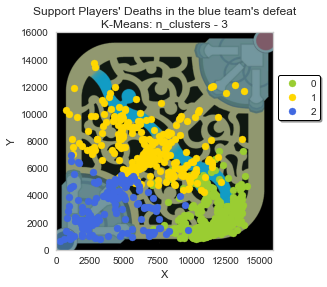

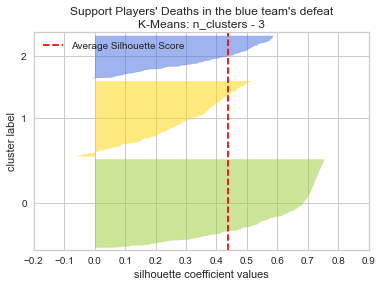

Silhouette score: 0.43639116440550657
0    317
1    271
2    152
Name: cluster, dtype: int64

Inertia: 671.2935334590392

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  11448.776025   2579.580442  -0.763407
1        1   6780.394834   7439.719557   0.295203
2        2   3979.934211   3161.230263   0.585526

In [799]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [800]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1387.669382   1362.831478   0.460611
1        1   2506.165421   1853.289608   0.577511
2        2   2119.046771   1542.163627   0.492631

In [801]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14069.0            7057.0            7277.0   
1        1           13832.0             774.0           13722.0   
2        2            9726.0             305.0            6977.0   

   min coordinate_y  max timestamp  min timestamp  
0             808.0              1             -1  
1            4241.0              1             -1  
2             612.0              1              0

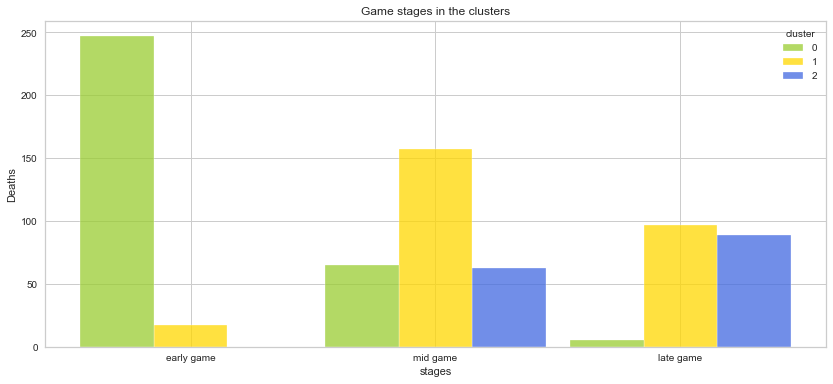

In [802]:
stagesPerClusterV2(blueSideDefeat_df, colors)

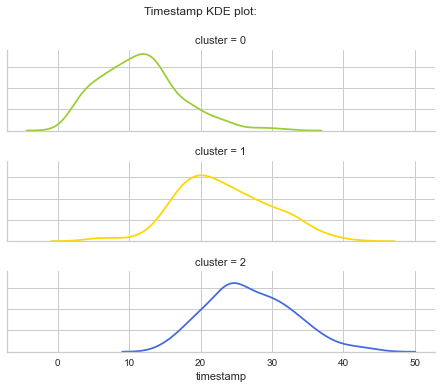

In [803]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [804]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Morgana            16
Rakan              13
Lux                 8
Karthus             7
Nautilus            5
Nami                5
Ashe                4
Lulu                4
Renata              3
Soraka              3
Velkoz              3
MissFortune         3
Leona               3
Pantheon            2
Annie               2
Swain               2
Gragas              1
Heimerdinger        1
Zac                 1
Amumu               1
Janna               1
Maokai              1
Alistar             1
Yuumi               1
Zyra                1
Brand               1
Sona                1

Deaths with each champion:

In [805]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Morgana         147
Karthus          85
Rakan            65
Lux              64
Nautilus         36
Lulu             34
Velkoz           34
Nami             32
Swain            25
Soraka           24
Ashe             23
MissFortune      21
Renata           19
Annie            17
Pantheon         16
Leona            14
Zyra             10
Brand            10
Alistar           9
Zac               9
Sona              9
Yuumi             9
Amumu             9
Gragas            7
Heimerdinger      6
Maokai            4
Janna             2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [806]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 27 champions when they won on the red side

Cluster 0 - died with 27 champions:
 ['Alistar' 'Amumu' 'Annie' 'Ashe' 'Brand' 'Gragas' 'Heimerdinger' 'Janna'
 'Karthus' 'Leona' 'Lulu' 'Lux' 'Maokai' 'MissFortune' 'Morgana' 'Nami'
 'Nautilus' 'Pantheon' 'Rakan' 'Renata' 'Sona' 'Soraka' 'Swain' 'Velkoz'
 'Yuumi' 'Zac' 'Zyra']
Morgana         63
Karthus         39
Rakan           27
Lux             26
Nami            17
Nautilus        17
Swain           15
Soraka          14
Lulu            12
Velkoz          11
Annie           10
Renata           9
Ashe             9
MissFortune      8
Leona            7
Yuumi            6
Zyra             5
Brand            4
Pantheon         4
Zac              3
Sona             3
Maokai           2
Heimerdinger     2
Gragas           1
Amumu            1
Alistar          1
Janna            1
Name: champion, dtype: int64

Cluster 1 - died with 26 champions:
 ['Alistar' 'Amumu' 'Annie' 'Ashe' 'Brand' 'Gragas' 'Heimerdinger'
 'K

---
### Platinum Players

#### Clustering Red Team Victory

In [807]:
utility_deaths_df = df[(df["role"] == "UTILITY") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

redSideVictory_df = utility_deaths_df[(utility_deaths_df["team"] == "Red") & (utility_deaths_df["victory"] == True)]
redSideVictory_df

gameId team       summoner region   champion  timestamp  \
177     EUW1_6274101916  Red  anonymous 125   euw1      Senna   8.010450   
181     EUW1_6274101916  Red  anonymous 125   euw1      Senna  10.873950   
187     EUW1_6274101916  Red  anonymous 125   euw1      Senna  13.954383   
215     EUW1_6274101916  Red  anonymous 125   euw1      Senna  26.208250   
225     EUW1_6274101916  Red  anonymous 125   euw1      Senna  29.780600   
...                 ...  ...            ...    ...        ...        ...   
624848  EUW1_6289992620  Red   anonymous 45   euw1  Seraphine  25.023317   
624906  EUW1_6289973345  Red   anonymous 45   euw1       Sona  21.646367   
624912  EUW1_6289973345  Red   anonymous 45   euw1       Sona  23.129483   
624965  EUW1_6289967081  Red   anonymous 45   euw1     Soraka  14.635633   
624977  EUW1_6289967081  Red   anonymous 45   euw1     Soraka  18.697533   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
177          11679.0        6669.0    NaN            NaN  ...   
181          13229.0        4605.0    NaN            NaN  ...   
187          13639.0        2654.0    NaN            NaN  ...   
215           8949.0       13614.0    NaN            NaN  ...   
225           5400.0        9111.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
624848        7300.0       10923.0    NaN            NaN  ...   
624906        8856.0        8872.0    NaN            NaN  ...   
624912        9405.0        5533.0    NaN            NaN  ...   
624965       11781.0        2662.0    NaN            NaN  ...   
624977        5045.0        9566.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
177                 NaN     True      Death        NaN           NaN   NaN   
181                 NaN     True      Death        NaN           NaN   NaN   
187                 NaN     True      Death        NaN           NaN   NaN   
215                 NaN     True      Death        NaN           NaN   NaN   
225                 NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
624848              NaN     True      Death        NaN           NaN   NaN   
624906              NaN     True      Death        NaN           NaN   NaN   
624912              NaN     True      Death        NaN           NaN   NaN   
624965              NaN     True      Death        NaN           NaN   NaN   
624977              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName     role      rank  
177         NaN       NaN  UTILITY  Platinum  
181         NaN       NaN  UTILITY  Platinum  
187         NaN       NaN  UTILITY  Platinum  
215         NaN       NaN  UTILITY  Platinum  
225         NaN       NaN  UTILITY  Platinum  
...         ...       ...      ...       ...  
624848      NaN       NaN  UTILITY  Platinum  
624906      NaN       NaN  UTILITY  Platinum  
624912      NaN       NaN  UTILITY  Platinum  
624965      NaN       NaN  UTILITY  Platinum  
624977      NaN       NaN  UTILITY  Platinum  

[530 rows x 56 columns]

In [808]:
profiling_df = utility_deaths_df[(utility_deaths_df["team"] == "Red") & (utility_deaths_df["victory"] == True)].copy()

In [809]:
redSideGames_df = utility_deaths_df[utility_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [810]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

122

In [811]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

46.74329501915709

In [812]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_utility_deaths_df.shape[0]) * 100
winRateRedSide

8.22087792771832

In [813]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 125 won 26 matches on the red side
anonymous 125 has an average of 4.923076923076923 deaths per game when winning on the red side

anonymous 158 won 10 matches on the red side
anonymous 158 has an average of 4.8 deaths per game when winning on the red side

anonymous 30 won 19 matches on the red side
anonymous 30 has an average of 5.052631578947368 deaths per game when winning on the red side

anonymous 35 won 19 matches on the red side
anonymous 35 has an average of 2.8421052631578947 deaths per game when winning on the red side

anonymous 40 won 6 matches on the red side
anonymous 40 has an average of 4.166666666666667 deaths per game when winning on the red side

anonymous 43 won 12 matches on the red side
anonymous 43 has an average of 4.416666666666667 deaths per game when winning on the red side

anonymous 45 won 30 matches on the red side
anonymous 45 has an average of 4.2 deaths per game when winning on the red side



In [814]:
print("Victory games on red side contains {} matches in which the utility died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 122 matches in which the utility died at least once
7 players died a total of 530 times on the red side
Victory games on red side contains an average of 4.344262295081967 deaths per game


In [815]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
177          11679.0        6669.0   8.010450
181          13229.0        4605.0  10.873950
187          13639.0        2654.0  13.954383
215           8949.0       13614.0  26.208250
225           5400.0        9111.0  29.780600
...              ...           ...        ...
624848        7300.0       10923.0  25.023317
624906        8856.0        8872.0  21.646367
624912        9405.0        5533.0  23.129483
624965       11781.0        2662.0  14.635633
624977        5045.0        9566.0  18.697533

[530 rows x 3 columns]

Time discretization

In [816]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [817]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [818]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [819]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [820]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
177         0.738850      0.364801         -1
181         1.165132     -0.321484         -1
187         1.277890     -0.970196         -1
215        -0.011957      2.674029          1
225        -0.988005      1.176771          1
...              ...           ...        ...
624848     -0.465466      1.779265          1
624906     -0.037534      1.097303          0
624912      0.113453     -0.012922          0
624965      0.766902     -0.967536         -1
624977     -1.085637      1.328060          0

[530 rows x 3 columns]

In [821]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.42045504126255123
Silhouette score for k=3: 0.40701143367272924
Silhouette score for k=4: 0.37899594431766
Silhouette score for k=5: 0.3663062659087896
Silhouette score for k=6: 0.3766673507955693
Silhouette score for k=7: 0.37082581266231085
Silhouette score for k=8: 0.3389829413081229
Silhouette score for k=9: 0.3408854247297417
Silhouette score for k=10: 0.33341886327595976
Silhouette score for k=11: 0.3697394167592675
Silhouette score for k=12: 0.37207144189489466
Silhouette score for k=13: 0.3643974176504772
Silhouette score for k=14: 0.3664829748023117
Silhouette score for k=15: 0.3775165841119011
Silhouette score for k=16: 0.3728937606229257
Silhouette score for k=17: 0.38164967429058694
Silhouette score for k=18: 0.38858688620874365
Silhouette score for k=19: 0.3922226953013815
Silhouette score for k=20: 0.3711536950485014
Silhouette score for k=25: 0.39740953835719206


K-Means with k = 4

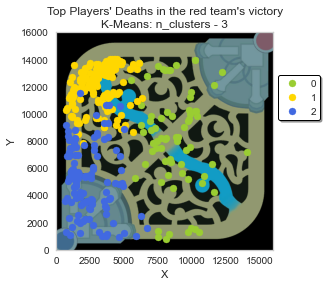

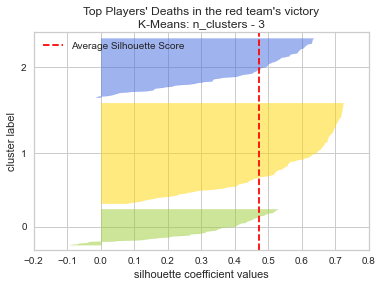

Silhouette score: 0.4720163027243763
1    195
2    115
0     70
Name: cluster, dtype: int64

Inertia: 352.87227458544737

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   8700.242857   8108.885714   0.214286
1        1   3179.984615  12241.374359  -0.656410
2        2   2458.304348   5193.086957   0.556522

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

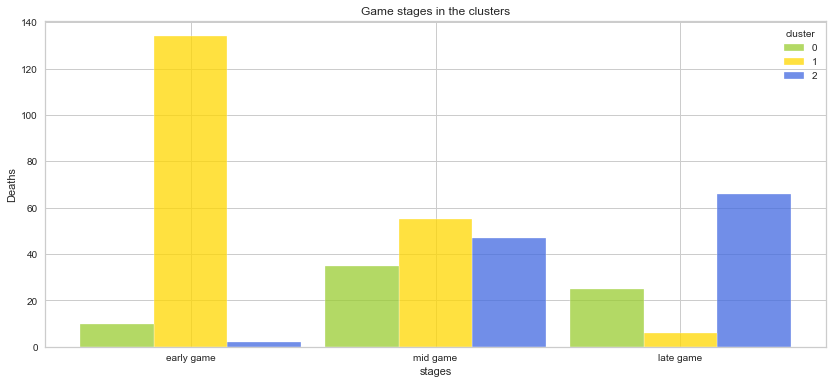

In [ ]:
stagesPerClusterV2(redSideVictory_df, colors)

K-Means with k = 3

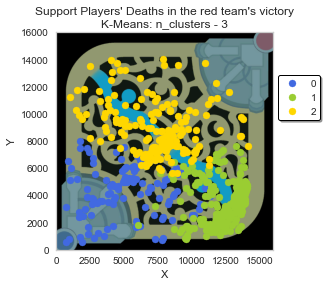

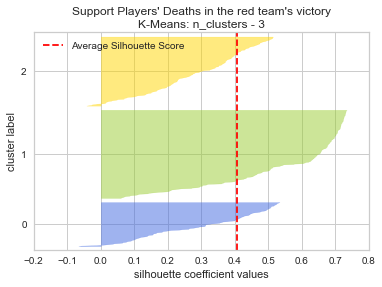

Silhouette score: 0.40701143367272924
1    232
2    182
0    116
Name: cluster, dtype: int64

Inertia: 525.4093767833782

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   5326.387931   4246.646552   0.646552
1        1  12152.551724   3603.711207  -0.762931
2        2   7300.873626   8925.357143   0.043956

In [822]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "yellowgreen", "gold"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [823]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2765.576191   1821.646911   0.478040
1        1   1522.104670   1604.381817   0.454675
2        2   2552.599229   1908.059214   0.627433

In [824]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           11474.0             741.0            7973.0   
1        1           14077.0            6019.0            7624.0   
2        2           14115.0            1020.0           14030.0   

   min coordinate_y  max timestamp  min timestamp  
0             592.0              1              0  
1             821.0              1             -1  
2            5637.0              1             -1

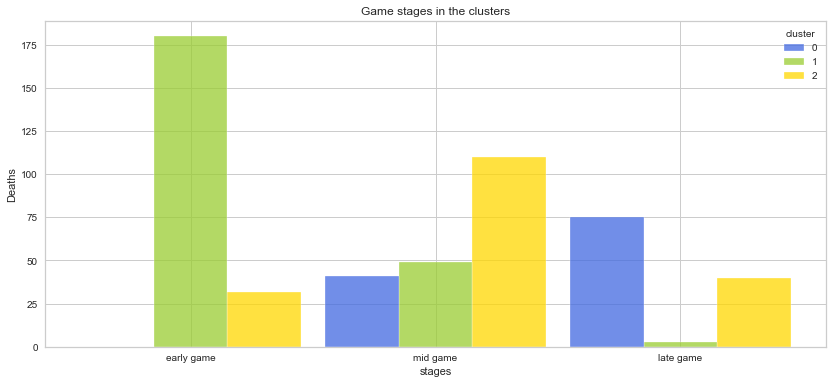

In [825]:
stagesPerClusterV2(redSideVictory_df, colors)

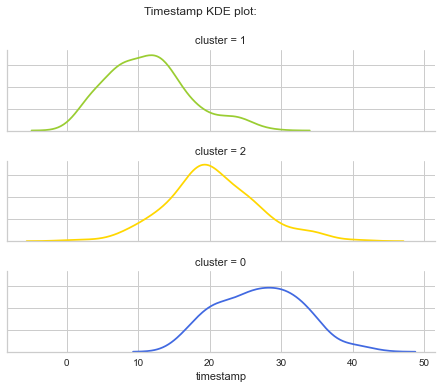

In [826]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [827]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Soraka             15
Nami               14
Janna              12
Pyke               11
Senna              11
Thresh              9
Karma               6
Lux                 5
Lulu                5
Nautilus            4
Seraphine           3
Sona                3
Yuumi               3
Swain               2
Rakan               2
Morgana             2
Braum               2
Amumu               1
Heimerdinger        1
Blitzcrank          1
Rell                1
Ashe                1
Zyra                1
Shen                1
Galio               1
TahmKench           1
Alistar             1
Brand               1
Bard                1
Twitch              1

Deaths with each champion:

In [828]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Nami            65
Soraka          59
Senna           55
Pyke            50
Thresh          48
Janna           26
Lux             23
Seraphine       19
Lulu            18
Karma           18
Nautilus        17
Rakan           12
Sona            11
Swain           10
Morgana         10
Yuumi            9
Rell             8
Heimerdinger     8
Shen             8
Braum            7
Twitch           7
Galio            6
Amumu            6
Blitzcrank       6
Brand            5
Alistar          5
TahmKench        5
Zyra             4
Ashe             3
Bard             2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [829]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 30 champions when they won on the red side

Cluster 0 - died with 25 champions:
 ['Alistar' 'Brand' 'Braum' 'Galio' 'Heimerdinger' 'Janna' 'Karma' 'Lulu'
 'Lux' 'Morgana' 'Nami' 'Nautilus' 'Pyke' 'Rakan' 'Rell' 'Senna'
 'Seraphine' 'Shen' 'Sona' 'Soraka' 'Swain' 'Thresh' 'Twitch' 'Yuumi'
 'Zyra']
Nami            15
Pyke            15
Soraka          12
Thresh          12
Lulu             8
Senna            7
Janna            6
Lux              5
Seraphine        5
Swain            4
Nautilus         4
Morgana          3
Heimerdinger     3
Brand            2
Sona             2
Alistar          2
Karma            2
Rell             2
Yuumi            1
Galio            1
Shen             1
Zyra             1
Braum            1
Rakan            1
Twitch           1
Name: champion, dtype: int64

Cluster 1 - died with 29 champions:
 ['Alistar' 'Amumu' 'Ashe' 'Blitzcrank' 'Brand' 'Braum' 'Galio'
 'Heimerdinger' 'Janna' 'Karma' 'Lulu' 'Lux' 'Morgana' 'Nami' 'Nautil

---
#### Clustering Red Team Defeat

In [830]:
utility_deaths_df = df[(df["role"] == "UTILITY") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

redSideDefeat_df = utility_deaths_df[(utility_deaths_df["team"] == "Red") & (utility_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team       summoner region  champion  timestamp  \
611     EUW1_6273872012  Red  anonymous 125   euw1  Nautilus   7.579000   
626     EUW1_6273872012  Red  anonymous 125   euw1  Nautilus  15.263883   
630     EUW1_6273872012  Red  anonymous 125   euw1  Nautilus  16.788300   
638     EUW1_6273872012  Red  anonymous 125   euw1  Nautilus  20.233217   
649     EUW1_6273872012  Red  anonymous 125   euw1  Nautilus  25.048183   
...                 ...  ...            ...    ...       ...        ...   
625498  EUW1_6289666046  Red   anonymous 45   euw1      Sona  25.443550   
625500  EUW1_6289666046  Red   anonymous 45   euw1      Sona  26.477583   
625502  EUW1_6289666046  Red   anonymous 45   euw1      Sona  27.515883   
625506  EUW1_6289666046  Red   anonymous 45   euw1      Sona  28.919000   
625516  EUW1_6289666046  Red   anonymous 45   euw1      Sona  31.614050   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
611          12504.0        1835.0    NaN            NaN  ...   
626           8162.0        7866.0    NaN            NaN  ...   
630          10430.0        2843.0    NaN            NaN  ...   
638           7689.0       11678.0    NaN            NaN  ...   
649          12627.0       11284.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
625498        7326.0        6668.0    NaN            NaN  ...   
625500        9578.0        9663.0    NaN            NaN  ...   
625502       13395.0        7769.0    NaN            NaN  ...   
625506        6305.0        8663.0    NaN            NaN  ...   
625516       10987.0        9780.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
611                 NaN    False      Death        NaN           NaN   NaN   
626                 NaN    False      Death        NaN           NaN   NaN   
630                 NaN    False      Death        NaN           NaN   NaN   
638                 NaN    False      Death        NaN           NaN   NaN   
649                 NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
625498              NaN    False      Death        NaN           NaN   NaN   
625500              NaN    False      Death        NaN           NaN   NaN   
625502              NaN    False      Death        NaN           NaN   NaN   
625506              NaN    False      Death        NaN           NaN   NaN   
625516              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName     role      rank  
611         NaN       NaN  UTILITY  Platinum  
626         NaN       NaN  UTILITY  Platinum  
630         NaN       NaN  UTILITY  Platinum  
638         NaN       NaN  UTILITY  Platinum  
649         NaN       NaN  UTILITY  Platinum  
...         ...       ...      ...       ...  
625498      NaN       NaN  UTILITY  Platinum  
625500      NaN       NaN  UTILITY  Platinum  
625502      NaN       NaN  UTILITY  Platinum  
625506      NaN       NaN  UTILITY  Platinum  
625516      NaN       NaN  UTILITY  Platinum  

[872 rows x 56 columns]

In [831]:
profiling_df = utility_deaths_df[(utility_deaths_df["team"] == "Red") & (utility_deaths_df["victory"] == False)].copy()

In [832]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 125 lost 22 matches on the red side
anonymous 125 has an average of 8.272727272727273 deaths per game when losing on the red side

anonymous 158 lost 10 matches on the red side
anonymous 158 has an average of 9.2 deaths per game when losing on the red side

anonymous 30 lost 24 matches on the red side
anonymous 30 has an average of 6.5 deaths per game when losing on the red side

anonymous 35 lost 25 matches on the red side
anonymous 35 has an average of 3.24 deaths per game when losing on the red side

anonymous 40 lost 11 matches on the red side
anonymous 40 has an average of 7.0 deaths per game when losing on the red side

anonymous 43 lost 12 matches on the red side
anonymous 43 has an average of 5.416666666666667 deaths per game when losing on the red side

anonymous 45 lost 35 matches on the red side
anonymous 45 has an average of 6.257142857142857 deaths per game when losing on the red side



In [833]:
print("Defeat games on red side contains {} matches in which the utility died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 139 matches in which the utility died at least once
7 players died a total of 872 times on the red side
Defeat games on red side contains an average of 6.273381294964029 deaths per game


In [834]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
611          12504.0        1835.0   7.579000
626           8162.0        7866.0  15.263883
630          10430.0        2843.0  16.788300
638           7689.0       11678.0  20.233217
649          12627.0       11284.0  25.048183
...              ...           ...        ...
625498        7326.0        6668.0  25.443550
625500        9578.0        9663.0  26.477583
625502       13395.0        7769.0  27.515883
625506        6305.0        8663.0  28.919000
625516       10987.0        9780.0  31.614050

[872 rows x 3 columns]

Time discretization

In [835]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [836]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [837]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [838]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [839]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
611         0.716612     -1.515565         -1
626        -0.754262      0.237234          0
630         0.014034     -1.222609          0
638        -0.914493      1.345122          0
649         0.758279      1.230613          1
...              ...           ...        ...
625498     -1.037461     -0.110943          1
625500     -0.274585      0.759499          1
625502      1.018443      0.209043          1
625506     -1.383330      0.468867          1
625516      0.202721      0.793503          1

[872 rows x 3 columns]

In [840]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4358088714614423
Silhouette score for k=3: 0.4171648453136005
Silhouette score for k=4: 0.40111423883660813
Silhouette score for k=5: 0.40793292618632937
Silhouette score for k=6: 0.39707931387781054
Silhouette score for k=7: 0.38795187213151905
Silhouette score for k=8: 0.337126069706496
Silhouette score for k=9: 0.3366402549365636
Silhouette score for k=10: 0.3521328695958981
Silhouette score for k=11: 0.3586580111105124
Silhouette score for k=12: 0.3672587437907641
Silhouette score for k=13: 0.3729323695636159
Silhouette score for k=14: 0.3717671128683571
Silhouette score for k=15: 0.3732488891854297
Silhouette score for k=16: 0.3793099650831141
Silhouette score for k=17: 0.37917298676087524
Silhouette score for k=18: 0.39194617141109245
Silhouette score for k=19: 0.3975548931028141
Silhouette score for k=20: 0.4001904419593128
Silhouette score for k=25: 0.40467803272015784


K-Means with k = 3

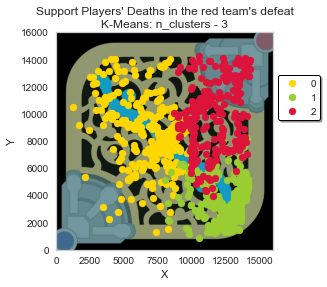

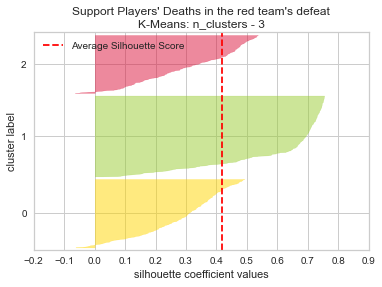

Silhouette score: 0.4171648453136005
1    340
0    288
2    244
Name: cluster, dtype: int64

Inertia: 816.713022978362

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   6865.788194   8575.562500   0.187500
1        1  12509.094118   3752.252941  -0.835294
2        2  11591.782787   9843.590164   0.565574

In [841]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [842]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1848.976064   2485.793176   0.623261
1        1   1343.957476   1486.837827   0.393986
2        2   1493.054172   2496.164086   0.511951

In [843]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            9988.0            1236.0           14056.0   
1        1           14122.0            8061.0            8240.0   
2        2           14296.0            8665.0           14265.0   

   min coordinate_y  max timestamp  min timestamp  
0            1342.0              1             -1  
1             863.0              1             -1  
2            3946.0              1             -1

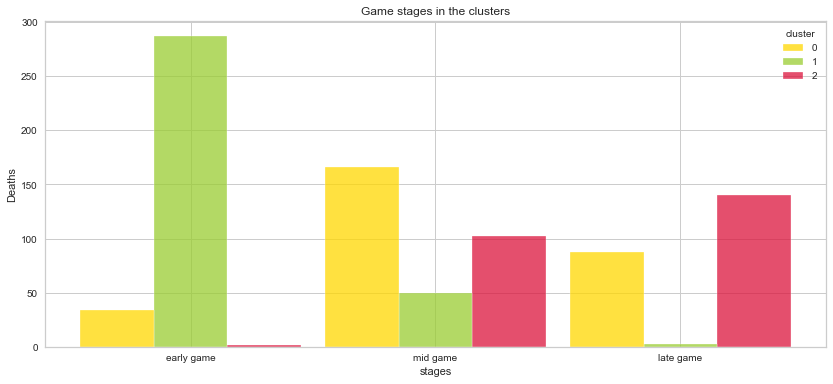

In [844]:
stagesPerClusterV2(redSideDefeat_df, colors)

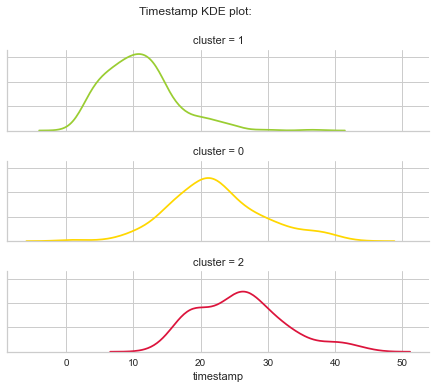

In [845]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [846]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Janna            17
Senna            15
Soraka           15
Nami             15
Pyke             11
Lulu              8
Sona              5
Lux               5
Thresh            5
Ashe              4
Seraphine         4
Nautilus          4
Morgana           3
Swain             3
Alistar           3
Yuumi             3
Bard              3
Brand             2
Karma             2
Vex               2
Ahri              1
Taliyah           1
Rell              1
Taric             1
Blitzcrank        1
Zilean            1
Braum             1
Jhin              1
Amumu             1
Leona             1

Deaths with each champion:

In [847]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Senna         105
Nami           94
Soraka         79
Pyke           61
Janna          50
Lulu           48
Thresh         44
Lux            44
Nautilus       36
Sona           33
Alistar        27
Swain          25
Ashe           24
Morgana        22
Seraphine      21
Yuumi          18
Karma          16
Bard           15
Vex            14
Brand          14
Blitzcrank     12
Rell           11
Taric          10
Braum           9
Jhin            9
Taliyah         8
Leona           7
Amumu           6
Ahri            6
Zilean          4
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [848]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 30 champions when they won on the red side

Cluster 0 - died with 30 champions:
 ['Ahri' 'Alistar' 'Amumu' 'Ashe' 'Bard' 'Blitzcrank' 'Brand' 'Braum'
 'Janna' 'Jhin' 'Karma' 'Leona' 'Lulu' 'Lux' 'Morgana' 'Nami' 'Nautilus'
 'Pyke' 'Rell' 'Senna' 'Seraphine' 'Sona' 'Soraka' 'Swain' 'Taliyah'
 'Taric' 'Thresh' 'Vex' 'Yuumi' 'Zilean']
Senna         41
Nami          33
Pyke          24
Soraka        19
Thresh        18
Nautilus      14
Lux           14
Janna         14
Sona          11
Lulu          10
Karma          9
Alistar        7
Rell           7
Swain          7
Morgana        6
Ashe           6
Taliyah        6
Brand          5
Yuumi          5
Braum          5
Vex            4
Seraphine      4
Amumu          3
Blitzcrank     3
Bard           3
Leona          3
Zilean         2
Jhin           2
Taric          2
Ahri           1
Name: champion, dtype: int64

Cluster 1 - died with 28 champions:
 ['Ahri' 'Alistar' 'Amumu' 'Ashe' 'Bard' 'Blitzcrank' 'Brand' 

---
#### Clustering Blue Team Victory

In [849]:
utility_deaths_df = df[(df["role"] == "UTILITY") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

blueSideVictory_df = utility_deaths_df[(utility_deaths_df["team"] == "Blue") & (utility_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team       summoner region champion  timestamp  \
268     EUW1_6274059942  Blue  anonymous 125   euw1    Senna   4.213583   
275     EUW1_6274059942  Blue  anonymous 125   euw1    Senna   7.219817   
282     EUW1_6274059942  Blue  anonymous 125   euw1    Senna  10.894933   
284     EUW1_6274059942  Blue  anonymous 125   euw1    Senna  11.838017   
323     EUW1_6274059942  Blue  anonymous 125   euw1    Senna  22.318100   
...                 ...   ...            ...    ...      ...        ...   
640704  EUW1_6289878644  Blue  anonymous 158   euw1     Ashe  22.233300   
640708  EUW1_6289878644  Blue  anonymous 158   euw1     Ashe  24.155550   
640713  EUW1_6289878644  Blue  anonymous 158   euw1     Ashe  26.384100   
640716  EUW1_6289878644  Blue  anonymous 158   euw1     Ashe  28.384383   
640766  EUW1_6289581022  Blue  anonymous 158   euw1  Morgana  13.739400   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
268          10252.0        1529.0    NaN            NaN  ...   
275          10674.0         928.0    NaN            NaN  ...   
282          10653.0        3138.0    NaN            NaN  ...   
284          10579.0        1379.0    NaN            NaN  ...   
323          13349.0        8848.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
640704        6221.0        9013.0    NaN            NaN  ...   
640708        7322.0        6729.0    NaN            NaN  ...   
640713        4414.0        3046.0    NaN            NaN  ...   
640716        6108.0        8860.0    NaN            NaN  ...   
640766        8215.0        6490.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
268                 NaN     True      Death        NaN           NaN   NaN   
275                 NaN     True      Death        NaN           NaN   NaN   
282                 NaN     True      Death        NaN           NaN   NaN   
284                 NaN     True      Death        NaN           NaN   NaN   
323                 NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
640704              NaN     True      Death        NaN           NaN   NaN   
640708              NaN     True      Death        NaN           NaN   NaN   
640713              NaN     True      Death        NaN           NaN   NaN   
640716              NaN     True      Death        NaN           NaN   NaN   
640766              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName     role      rank  
268         NaN       NaN  UTILITY  Platinum  
275         NaN       NaN  UTILITY  Platinum  
282         NaN       NaN  UTILITY  Platinum  
284         NaN       NaN  UTILITY  Platinum  
323         NaN       NaN  UTILITY  Platinum  
...         ...       ...      ...       ...  
640704      NaN       NaN  UTILITY  Platinum  
640708      NaN       NaN  UTILITY  Platinum  
640713      NaN       NaN  UTILITY  Platinum  
640716      NaN       NaN  UTILITY  Platinum  
640766      NaN       NaN  UTILITY  Platinum  

[619 rows x 56 columns]

In [850]:
profiling_df = utility_deaths_df[(utility_deaths_df["team"] == "Blue") & (utility_deaths_df["victory"] == True)].copy()

In [851]:
blueSideGames_df = utility_deaths_df[utility_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [852]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

131

In [853]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

54.58333333333333

In [854]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_utility_deaths_df.shape[0]) * 100
winRateBlueSide

10.289228723404255

In [855]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 125 won 20 matches on the blue side
anonymous 125 has an average of 5.35 deaths per game when winning on the blue side

anonymous 158 won 18 matches on the blue side
anonymous 158 has an average of 4.777777777777778 deaths per game when winning on the blue side

anonymous 30 won 20 matches on the blue side
anonymous 30 has an average of 6.75 deaths per game when winning on the blue side

anonymous 35 won 27 matches on the blue side
anonymous 35 has an average of 4.037037037037037 deaths per game when winning on the blue side

anonymous 40 won 5 matches on the blue side
anonymous 40 has an average of 3.8 deaths per game when winning on the blue side

anonymous 43 won 12 matches on the blue side
anonymous 43 has an average of 2.9166666666666665 deaths per game when winning on the blue side

anonymous 45 won 29 matches on the blue side
anonymous 45 has an average of 4.413793103448276 deaths per game when winning on the blue side



In [856]:
print("Victory games on blue side contains {} matches in which the utility died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 131 matches in which the utility died at least once
7 players died a total of 619 times on the blue side
Victory games on blue side contains an average of 4.7251908396946565 deaths per game


In [857]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
268          10252.0        1529.0   4.213583
275          10674.0         928.0   7.219817
282          10653.0        3138.0  10.894933
284          10579.0        1379.0  11.838017
323          13349.0        8848.0  22.318100
...              ...           ...        ...
640704        6221.0        9013.0  22.233300
640708        7322.0        6729.0  24.155550
640713        4414.0        3046.0  26.384100
640716        6108.0        8860.0  28.384383
640766        8215.0        6490.0  13.739400

[619 rows x 3 columns]

Time discretization

In [858]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [859]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [860]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [861]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [862]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
268         0.275550     -1.206540         -1
275         0.411911     -1.384536         -1
282         0.405125     -0.730007         -1
284         0.381214     -1.250965         -1
323         1.276285      0.961106          0
...              ...           ...        ...
640704     -1.026988      1.009974          0
640708     -0.671221      0.333528          0
640713     -1.610884     -0.757254          1
640716     -1.063502      0.964660          1
640766     -0.382666      0.262745         -1

[619 rows x 3 columns]

In [863]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.44925057547914443
Silhouette score for k=3: 0.4388627799483015
Silhouette score for k=4: 0.3804094297750542
Silhouette score for k=5: 0.3961518060088019
Silhouette score for k=6: 0.37595210912321164
Silhouette score for k=7: 0.37539057426741235
Silhouette score for k=8: 0.38395794281731144
Silhouette score for k=9: 0.3915924465594924
Silhouette score for k=10: 0.3510415358686676
Silhouette score for k=11: 0.35390416546706416
Silhouette score for k=12: 0.3655649900976721
Silhouette score for k=13: 0.3695201856020062
Silhouette score for k=14: 0.38149510914297047
Silhouette score for k=15: 0.3865480480604631
Silhouette score for k=16: 0.39231797077313424
Silhouette score for k=17: 0.39815275266614336
Silhouette score for k=18: 0.39272492600863007
Silhouette score for k=19: 0.39355371604646766
Silhouette score for k=20: 0.40482150081862184
Silhouette score for k=25: 0.4029706503259854


K-Means with k = 3

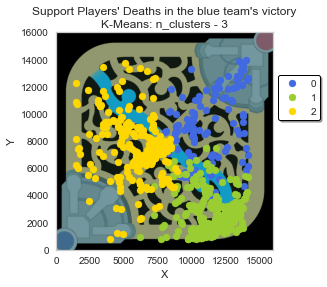

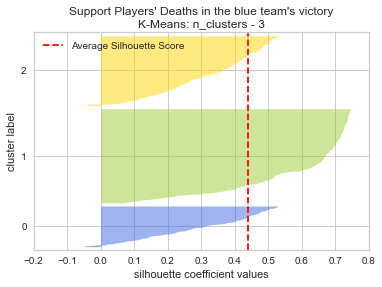

Silhouette score: 0.4388627799483015
1    285
2    211
0    123
Name: cluster, dtype: int64

Inertia: 574.8331106136089

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  11041.349593   8854.983740   0.617886
1        1  11382.442105   2744.136842  -0.807018
2        2   5763.279621   7568.350711   0.203791

In [864]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "yellowgreen", "gold"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [865]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1808.887989   2573.054883   0.518289
1        1   1486.051205   1507.595527   0.412038
2        2   1761.164668   2334.315072   0.646672

In [866]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14138.0            8020.0           13951.0   
1        1           14107.0            6178.0            7512.0   
2        2            8907.0            1446.0           13735.0   

   min coordinate_y  max timestamp  min timestamp  
0            3988.0              1             -1  
1             787.0              1             -1  
2             808.0              1             -1

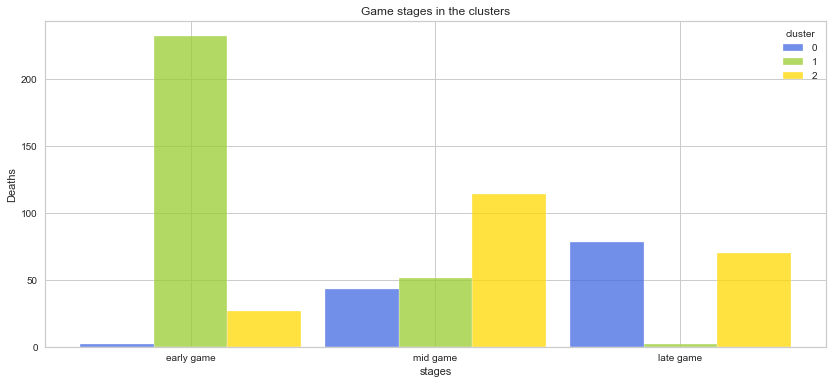

In [867]:
stagesPerClusterV2(blueSideVictory_df, colors)

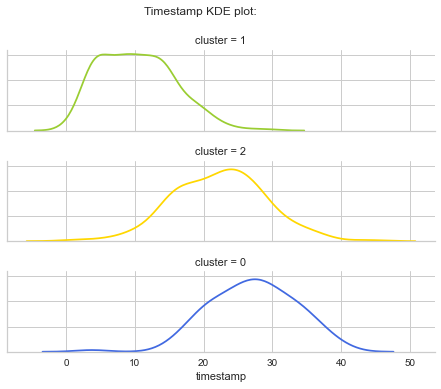

In [868]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [869]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Janna              18
Nami               17
Senna              13
Soraka             13
Pyke               10
Sona                7
Thresh              5
Lulu                4
Ashe                4
Morgana             4
Swain               3
Annie               3
Brand               3
Braum               3
Renata              2
Rakan               2
Alistar             2
Blitzcrank          2
Karma               2
Lux                 2
Bard                2
Amumu               1
TahmKench           1
Yuumi               1
Rell                1
Xerath              1
Seraphine           1
Nautilus            1
Galio               1
Heimerdinger        1
Ahri                1

Deaths with each champion:

In [870]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Janna           78
Senna           66
Nami            62
Soraka          61
Swain           36
Pyke            30
Thresh          28
Ashe            23
Brand           23
Sona            23
Annie           18
Alistar         17
Morgana         17
Braum           14
TahmKench       11
Seraphine       11
Nautilus        11
Rakan           10
Lulu            10
Rell            10
Bard            10
Lux              9
Renata           8
Karma            8
Xerath           7
Blitzcrank       7
Galio            4
Amumu            4
Heimerdinger     1
Yuumi            1
Ahri             1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [871]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 31 champions when they won on the red side

Cluster 0 - died with 27 champions:
 ['Alistar' 'Amumu' 'Annie' 'Ashe' 'Blitzcrank' 'Brand' 'Braum' 'Galio'
 'Janna' 'Karma' 'Lulu' 'Lux' 'Morgana' 'Nami' 'Nautilus' 'Pyke' 'Rakan'
 'Rell' 'Renata' 'Senna' 'Seraphine' 'Sona' 'Soraka' 'Swain' 'TahmKench'
 'Thresh' 'Xerath']
Janna         17
Soraka        13
Nami          12
Pyke           9
Senna          9
Thresh         7
Morgana        6
Sona           4
Annie          4
Brand          4
TahmKench      4
Rakan          4
Ashe           4
Braum          3
Seraphine      3
Alistar        3
Lux            3
Swain          3
Nautilus       2
Blitzcrank     2
Rell           1
Karma          1
Renata         1
Galio          1
Xerath         1
Amumu          1
Lulu           1
Name: champion, dtype: int64

Cluster 1 - died with 31 champions:
 ['Ahri' 'Alistar' 'Amumu' 'Annie' 'Ashe' 'Bard' 'Blitzcrank' 'Brand'
 'Braum' 'Galio' 'Heimerdinger' 'Janna' 'Karma' 'Lulu' 'Lux

---
#### Clustering Blue Team Defeat

In [872]:
utility_deaths_df = df[(df["role"] == "UTILITY") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

blueSideDefeat_df = utility_deaths_df[(utility_deaths_df["team"] == "Blue") & (utility_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team       summoner region champion  timestamp  \
19      EUW1_6274275803  Blue  anonymous 125   euw1   Twitch  10.351600   
32      EUW1_6274275803  Blue  anonymous 125   euw1   Twitch  17.466683   
45      EUW1_6274275803  Blue  anonymous 125   euw1   Twitch  21.543583   
47      EUW1_6274275803  Blue  anonymous 125   euw1   Twitch  22.763767   
52      EUW1_6274275803  Blue  anonymous 125   euw1   Twitch  25.819967   
...                 ...   ...            ...    ...      ...        ...   
625621  EUW1_6289531742  Blue   anonymous 45   euw1   Soraka  10.059500   
625626  EUW1_6289531742  Blue   anonymous 45   euw1   Soraka  12.596917   
625640  EUW1_6289531742  Blue   anonymous 45   euw1   Soraka  19.208017   
625651  EUW1_6289531742  Blue   anonymous 45   euw1   Soraka  25.753717   
625661  EUW1_6289531742  Blue   anonymous 45   euw1   Soraka  30.249900   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
19            3416.0       13918.0    NaN            NaN  ...   
32            6367.0        9103.0    NaN            NaN  ...   
45           11875.0        6906.0    NaN            NaN  ...   
47           10284.0        6681.0    NaN            NaN  ...   
52            2729.0        4686.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
625621       10102.0        1502.0    NaN            NaN  ...   
625626        8789.0        1083.0    NaN            NaN  ...   
625640        8954.0        5715.0    NaN            NaN  ...   
625651        6775.0         942.0    NaN            NaN  ...   
625661        7911.0        4932.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
19                  NaN    False      Death        NaN           NaN   NaN   
32                  NaN    False      Death        NaN           NaN   NaN   
45                  NaN    False      Death        NaN           NaN   NaN   
47                  NaN    False      Death        NaN           NaN   NaN   
52                  NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
625621              NaN    False      Death        NaN           NaN   NaN   
625626              NaN    False      Death        NaN           NaN   NaN   
625640              NaN    False      Death        NaN           NaN   NaN   
625651              NaN    False      Death        NaN           NaN   NaN   
625661              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName     role      rank  
19          NaN       NaN  UTILITY  Platinum  
32          NaN       NaN  UTILITY  Platinum  
45          NaN       NaN  UTILITY  Platinum  
47          NaN       NaN  UTILITY  Platinum  
52          NaN       NaN  UTILITY  Platinum  
...         ...       ...      ...       ...  
625621      NaN       NaN  UTILITY  Platinum  
625626      NaN       NaN  UTILITY  Platinum  
625640      NaN       NaN  UTILITY  Platinum  
625651      NaN       NaN  UTILITY  Platinum  
625661      NaN       NaN  UTILITY  Platinum  

[694 rows x 56 columns]

In [873]:
profiling_df = utility_deaths_df[(utility_deaths_df["team"] == "Blue") & (utility_deaths_df["victory"] == False)].copy()

In [874]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 125 lost 16 matches on the blue side
anonymous 125 has an average of 7.3125 deaths per game when losing on the blue side

anonymous 158 lost 7 matches on the blue side
anonymous 158 has an average of 7.571428571428571 deaths per game when losing on the blue side

anonymous 30 lost 13 matches on the blue side
anonymous 30 has an average of 7.461538461538462 deaths per game when losing on the blue side

anonymous 35 lost 23 matches on the blue side
anonymous 35 has an average of 4.3478260869565215 deaths per game when losing on the blue side

anonymous 40 lost 7 matches on the blue side
anonymous 40 has an average of 8.142857142857142 deaths per game when losing on the blue side

anonymous 43 lost 9 matches on the blue side
anonymous 43 has an average of 6.666666666666667 deaths per game when losing on the blue side

anonymous 45 lost 34 matches on the blue side
anonymous 45 has an average of 6.176470588235294 deaths per game when losing on the blue side



In [875]:
print("Defeat games on blue side contains {} matches in which the utility died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 109 matches in which the utility died at least once
7 players died a total of 694 times on the blue side
Defeat games on blue side contains an average of 6.36697247706422 deaths per game


In [876]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
19            3416.0       13918.0  10.351600
32            6367.0        9103.0  17.466683
45           11875.0        6906.0  21.543583
47           10284.0        6681.0  22.763767
52            2729.0        4686.0  25.819967
...              ...           ...        ...
625621       10102.0        1502.0  10.059500
625626        8789.0        1083.0  12.596917
625640        8954.0        5715.0  19.208017
625651        6775.0         942.0  25.753717
625661        7911.0        4932.0  30.249900

[694 rows x 3 columns]

Time discretization

In [877]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [878]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [879]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [880]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [881]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
19         -1.196280      3.236525         -1
32         -0.383440      1.581555          0
45          1.133716      0.826422          0
47          0.695481      0.749087          0
52         -1.385511      0.063383          1
...              ...           ...        ...
625621      0.645350     -1.030993         -1
625626      0.283690     -1.175008         -1
625640      0.329139      0.417062          0
625651     -0.271058     -1.223472          1
625661      0.041849      0.147936          1

[694 rows x 3 columns]

In [882]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4506199927049375
Silhouette score for k=3: 0.4297682077790307
Silhouette score for k=4: 0.41536989586678547
Silhouette score for k=5: 0.42298111322553034
Silhouette score for k=6: 0.3952072837638421
Silhouette score for k=7: 0.379345628437797
Silhouette score for k=8: 0.38419656584088735
Silhouette score for k=9: 0.38537577669640893
Silhouette score for k=10: 0.3428982648934693
Silhouette score for k=11: 0.3577059252233039
Silhouette score for k=12: 0.36586308589492733
Silhouette score for k=13: 0.370733638938218
Silhouette score for k=14: 0.39396864921738417
Silhouette score for k=15: 0.3992605785162834
Silhouette score for k=16: 0.41025372187636344
Silhouette score for k=17: 0.3956248111566104
Silhouette score for k=18: 0.38498662099363207
Silhouette score for k=19: 0.4086410377922251
Silhouette score for k=20: 0.4072958100505824
Silhouette score for k=25: 0.3775343827507539


K-Means with k = 3

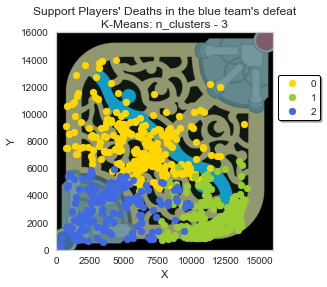

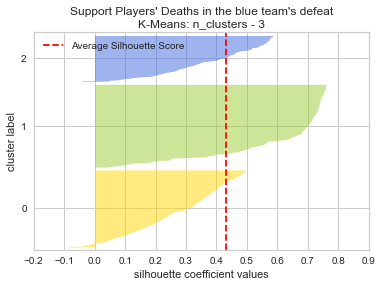

Silhouette score: 0.4297682077790307
1    279
0    260
2    155
Name: cluster, dtype: int64

Inertia: 644.7242048019775

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   6189.273077   7620.996154   0.253846
1        1  11217.014337   2364.412186  -0.752688
2        2   4167.974194   3115.967742   0.716129

In [883]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "royalblue"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [884]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2528.249094   1934.563021   0.617832
1        1   1526.295457   1282.369513   0.478706
2        2   2354.964017   1482.668355   0.450875

In [885]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           13868.0             724.0           13984.0   
1        1           14027.0            6113.0            6548.0   
2        2            9893.0             324.0            5963.0   

   min coordinate_y  max timestamp  min timestamp  
0            4567.0              1             -1  
1             749.0              1             -1  
2             309.0              1              0

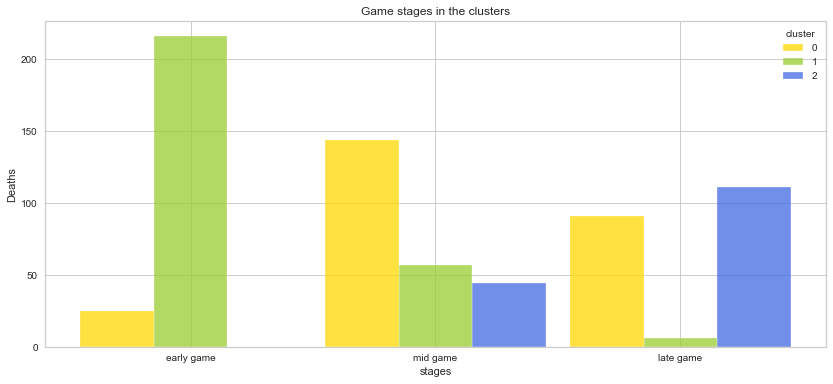

In [886]:
stagesPerClusterV2(blueSideDefeat_df, colors)

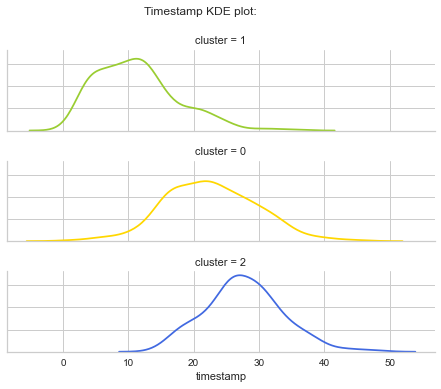

In [887]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [888]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Soraka             20
Janna              16
Nami               13
Senna              10
Pyke                7
Karma               6
Nautilus            5
Lux                 5
Sona                3
Lulu                3
Thresh              2
Renata              2
Swain               2
Heimerdinger        2
Amumu               2
Brand               2
Seraphine           1
Jhin                1
Zoe                 1
Alistar             1
Zilean              1
Bard                1
Yuumi               1
Twitch              1
Ahri                1

Deaths with each champion:

In [889]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Soraka          112
Janna            81
Nami             80
Senna            70
Pyke             44
Nautilus         44
Lux              40
Swain            24
Thresh           19
Renata           18
Lulu             17
Karma            17
Brand            16
Amumu            15
Sona             13
Heimerdinger     13
Bard             11
Seraphine        10
Zoe               9
Jhin              8
Twitch            8
Yuumi             7
Alistar           7
Ahri              6
Zilean            5
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [890]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 25 champions when they won on the red side

Cluster 0 - died with 24 champions:
 ['Ahri' 'Alistar' 'Amumu' 'Bard' 'Brand' 'Heimerdinger' 'Janna' 'Jhin'
 'Karma' 'Lulu' 'Lux' 'Nami' 'Nautilus' 'Pyke' 'Renata' 'Senna'
 'Seraphine' 'Sona' 'Soraka' 'Swain' 'Thresh' 'Twitch' 'Yuumi' 'Zoe']
Janna           37
Soraka          32
Nami            27
Nautilus        25
Pyke            23
Senna           20
Lux             14
Swain           10
Lulu             9
Renata           8
Brand            6
Heimerdinger     6
Twitch           5
Seraphine        5
Amumu            5
Zoe              4
Sona             4
Karma            4
Bard             4
Yuumi            3
Ahri             3
Jhin             2
Alistar          2
Thresh           2
Name: champion, dtype: int64

Cluster 1 - died with 24 champions:
 ['Ahri' 'Alistar' 'Amumu' 'Bard' 'Brand' 'Heimerdinger' 'Janna' 'Jhin'
 'Karma' 'Lulu' 'Lux' 'Nami' 'Nautilus' 'Pyke' 'Renata' 'Senna'
 'Seraphine' 'Sona' 'Soraka'

---

### Blue Win Rate vs Red Win Rate

In [9]:
utility_deaths_df = df[(df["role"] == "UTILITY") & (df["eventType"] == "Death")]

wins_df = utility_deaths_df[utility_deaths_df["victory"] == True]
wins_df

gameId  team       summoner region champion  timestamp  \
177     EUW1_6274101916   Red  anonymous 125   euw1    Senna   8.010450   
181     EUW1_6274101916   Red  anonymous 125   euw1    Senna  10.873950   
187     EUW1_6274101916   Red  anonymous 125   euw1    Senna  13.954383   
215     EUW1_6274101916   Red  anonymous 125   euw1    Senna  26.208250   
225     EUW1_6274101916   Red  anonymous 125   euw1    Senna  29.780600   
...                 ...   ...            ...    ...      ...        ...   
642684  EUW1_6289523454   Red  anonymous 168   euw1    Swain  10.780100   
642688  EUW1_6289523454   Red  anonymous 168   euw1    Swain  12.531033   
642700  EUW1_6289523454   Red  anonymous 168   euw1    Swain  18.134383   
642777  EUW1_6289415945  Blue  anonymous 168   euw1    Swain  19.149783   
642780  EUW1_6289415945  Blue  anonymous 168   euw1    Swain  20.196250   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
177          11679.0        6669.0    NaN            NaN  ...   
181          13229.0        4605.0    NaN            NaN  ...   
187          13639.0        2654.0    NaN            NaN  ...   
215           8949.0       13614.0    NaN            NaN  ...   
225           5400.0        9111.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
642684       13527.0        3069.0    NaN            NaN  ...   
642688       13873.0        3772.0    NaN            NaN  ...   
642700       12170.0        8997.0    NaN            NaN  ...   
642777       11323.0        6994.0    NaN            NaN  ...   
642780        6974.0        7097.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
177                 NaN     True      Death        NaN           NaN   NaN   
181                 NaN     True      Death        NaN           NaN   NaN   
187                 NaN     True      Death        NaN           NaN   NaN   
215                 NaN     True      Death        NaN           NaN   NaN   
225                 NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
642684              NaN     True      Death        NaN           NaN   NaN   
642688              NaN     True      Death        NaN           NaN   NaN   
642700              NaN     True      Death        NaN           NaN   NaN   
642777              NaN     True      Death        NaN           NaN   NaN   
642780              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName     role      rank  
177         NaN       NaN  UTILITY  Platinum  
181         NaN       NaN  UTILITY  Platinum  
187         NaN       NaN  UTILITY  Platinum  
215         NaN       NaN  UTILITY  Platinum  
225         NaN       NaN  UTILITY  Platinum  
...         ...       ...      ...       ...  
642684      NaN       NaN  UTILITY    Silver  
642688      NaN       NaN  UTILITY    Silver  
642700      NaN       NaN  UTILITY    Silver  
642777      NaN       NaN  UTILITY    Silver  
642780      NaN       NaN  UTILITY    Silver  

[5356 rows x 56 columns]

In [10]:
wins = len(np.unique(wins_df["gameId"]))
wins

1005

In [11]:
b = (winsBlueSide/ wins) * 100
r = (winsRedSide/ wins) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 49.850746268656714 vs Blue: 50.14925373134328


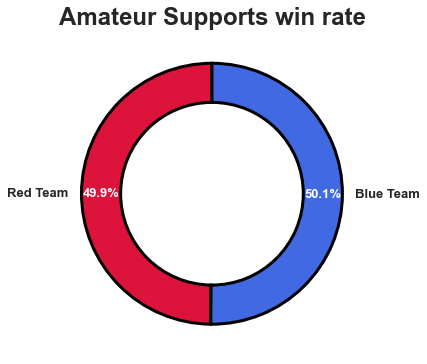

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
 
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':3}

_, texts, autotexts = ax.pie([r,b], 
       wedgeprops= wedgeprops, 
       startangle=90,
       labels=["Red Team", "Blue Team"],
       autopct='%1.1f%%',
       pctdistance=0.85,
       colors=['crimson', 'royalblue'])

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight("bold")
    autotext.set_fontsize(13)

texts[0].set_fontsize(13)
texts[1].set_fontsize(13)
texts[0].set_fontweight("bold")
texts[1].set_fontweight("bold")

plt.title('Amateur Supports win rate', fontsize=24, loc='center', fontweight="bold")

plt.show()